## Steps of "SPAM" Classification Project in NLP

    1. Import the Libraries
        1.1 Numpy
        1.2 Pandas
        1.3 Matplotlib
        1.4 Seaborn
    
    2. Load the DataFrame
    
    3. EDA
        3.1  View First five rows of dataframe
        3.2  View last five rows of dataframe
        3.3  View randomly any number of rows of dataframe
        3.4  shape of the dataframe
        
    4. Data Cleaning
        4.1 Check the NULL Values
        4.2 Reomve the DUPLICATE Values if any
        4.3 Remove the "Stopwords"
        4.4 Reomve the "HTML Tags"
        4.5 Reomve the "punctuations"
        4.6 Apply the "Lemmatization" on 'Noun(n)' & 'Verb(V)'
        4.7 Apply the "Join"
        4.8 Remove the "Numarical" Characters
        4.9 Mapping the Target variable (Label) values
        
    5. Feature Engineering
        5.1 Create a separate column "word_count"
        5.2 Create a separate column "Character_count" with SPACE
        5.3 Create a separate column "Character_count" without SPACE
        5.4 Create "Noun" count and "Verb" count
        5.5 TF-IDF(Convert Text data into Numarical data)
        5.6 Combine(Concate) the two dataframes df & df_tfidf
        5.7 Drop the text feature from df_final
        5.8 Check the NULL Values again and drop the NULL values(SPACES)
        5.9 Convert the label data type from 'float'  to  'int'
        
    6. Create Independent(X) & Dependent(y) Variables
    
    7. Create TRAIN & TEST datasets
    
    8. Apply the Classification Algorithms
        8.1 RandomForestClassifier
        8.2 GradientBoostingClassifier
        8.3 LogisticRegression
        8.4 DecisionTreeClassifier
        8.5 KNeighborsClassifier
        8.6 SVC
        8.7 Naive Bayes
            8.7.1 MultinomialNB 
            8.7.2 GaussianNB
            8.7.3 BernoulliNB
            
    
    9. Pipeline
        Apply the Standard Scaler in Pipline
    
    10. Apply the Hyperparameters
        10.1 Apply the Logistic Regression hyperparameters with L1 & L2 Penalityes
        10.2 Random Forest hyperparameters
        10.3 Boosted Tree hyperparameters like gradientboostingclassifier
        10.4 Support Vector Classifier hyperparameters
        10.5 Decision Tree Classifier hyperparameters
        10.6 K Nearest Neighbors hyperparameters
        10.7 Multinomial Naive Bayes Hyperparameters
        10.8 Gaussian Naive Bayes Hyperparameters
        10.9 Bernoulli Naive Bayes Hyperparameters
    
    11. CROSS VALIDATION
    
    12. Evaluate The MODELS
        12.1 Accuracy Score
        12.2 Confusion Matrix
        12.3 Classification Report
        12.4 Area Under ROC Curve
        12.5 Plot the ROC Curve
        12.6 Calculate AUROC
        
    13. PROJECT DELIVERY
        13.1 Save the MODEL
        13.2 Open the Saved MODEL.
        
    **************END*******************    
     
        
        
        

### 1. Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load the DataFrame

In [2]:
df = pd.read_csv('spam_data.csv')

### 3. EDA

#### 3.1 View First five rows of dataframe

In [3]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Here, "Text" is independent variable and "label" is target variable

In Text, data is in "sentence" format.

#### 3.2 View last five rows of dataframe

In [4]:
df.tail()

,label,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


#### 3.3  View randomly any number of rows of dataframe

In [5]:
df.sample(10)

,label,text
3402,ham,Good night my dear.. Sleepwell&amp;Take care
2962,ham,You dont know you jabo me abi.
2911,ham,You didn't have to tell me that...now i'm thin...
2622,ham,Ok lor...
1471,ham,Oh. U must have taken your REAL Valentine out ...
4156,ham,This single single answers are we fighting? Pl...
3334,ham,"Sorry, got a late start, we're on the way"
2624,ham,S da..al r above &lt;#&gt;
4137,ham,"Good! No, don‰Û÷t need any receipts‰ÛÓwell don..."
4471,spam,3. You have received your mobile content. Enjoy


#### 3.4 shape of the dataframe

In [6]:
df.shape

(5572, 2)

Given dataset contain 5572 no.of rows and 2 columns

### 4. Data Cleaning

#### 4.1 Check the NULL values

In [7]:
df.isnull().sum()

label    0
text     0
dtype: int64

NO NULL values in the given dataset

#### 4.2  Check the DUPLICATE Values

In [8]:
# Before we drop the duplicates, check the shape of the dataframe
df.shape

(5572, 2)

In [9]:
# Drop the Duplicates
df = df.drop_duplicates()

In [10]:
# After we drop the duplicates, check the shape of the dataframe Again
df.shape

(5169, 2)

5572-5169= 403 Duplicates are exist and which are removed from dataframe

#### 4.3 Remove the "Stopwords"

In [11]:
from nltk.corpus import stopwords

In [12]:
stop_words = stopwords.words('english')

In [13]:
df['text'] = df['text'].apply(lambda x:[word for word in x.split() if word not in stop_words])

convert the "sentence" of text data into list of "strings" of text data by sing split()-method.

In [14]:
df['text']

0       [Go, jurong, point,, crazy.., Available, bugis...
1                    [Ok, lar..., Joking, wif, u, oni...]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3       [U, dun, say, early, hor..., U, c, already, sa...
4       [Nah, I, think, goes, usf,, lives, around, tho...
                              ...                        
5567    [This, 2nd, time, tried, 2, contact, u., U, å£...
5568           [Will, Ì_, b, going, esplanade, fr, home?]
5569      [Pity,, *, mood, that., So...any, suggestions?]
5570    [The, guy, bitching, I, acted, like, i'd, inte...
5571                             [Rofl., Its, true, name]
Name: text, Length: 5169, dtype: object

the above data is in list of strings format.

In [15]:
df.head()

,label,text
0,ham,"[Go, jurong, point,, crazy.., Available, bugis..."
1,ham,"[Ok, lar..., Joking, wif, u, oni...]"
2,spam,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,"[U, dun, say, early, hor..., U, c, already, sa..."
4,ham,"[Nah, I, think, goes, usf,, lives, around, tho..."


#### 4.4 Reomve the "HTML Tags"

In [16]:
tags=["a","abbr","acronym","address","area","b","base","bdo","big","blockquote","body","br","button","caption","cite","code","col","colgroup","dd","del","dfn","div","dl","DOCTYPE","dt","em","fieldset","form","h1","h2","h3","h4","h5","h6","head","html","hr","i","img","input","ins","kbd","label","legend","li","link","map","meta","noscript","object","ol","optgroup","option","p","param","pre","q","samp","script","select","small","span","strong","style","sub","sup","table","tbody","td","textarea","tfoot","th","thead","title","tr","tt","ul","var"]

In [17]:
df['text'] = df['text'].apply(lambda x:[word for word in x if word not in tags])

In [18]:
df.head()

,label,text
0,ham,"[Go, jurong, point,, crazy.., Available, bugis..."
1,ham,"[Ok, lar..., Joking, wif, u, oni...]"
2,spam,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,"[U, dun, say, early, hor..., U, c, already, sa..."
4,ham,"[Nah, I, think, goes, usf,, lives, around, tho..."


the above data is free from HTML Tags.

#### 4.5 Reomve the "punctuations"

In [19]:
from string import punctuation

In [20]:
df['text'] = df['text'].apply(lambda x:[word for word in x if word not in list(punctuation)])

In [21]:
df.head()

,label,text
0,ham,"[Go, jurong, point,, crazy.., Available, bugis..."
1,ham,"[Ok, lar..., Joking, wif, u, oni...]"
2,spam,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,"[U, dun, say, early, hor..., U, c, already, sa..."
4,ham,"[Nah, I, think, goes, usf,, lives, around, tho..."


the above data is free from punctuations.

#### 4.6 Apply the "Lemmatization" on 'Noun(n)' & 'Verb(V)'

In [22]:
from nltk.stem import WordNetLemmatizer

In [23]:
lemma = WordNetLemmatizer()

In [24]:
df['text'] = df['text'].apply(lambda x:[lemma.lemmatize(word, 'n') for word in x])

In [25]:
df['text'] = df['text'].apply(lambda x:[lemma.lemmatize(word, 'v') for word in x])

In [26]:
df.head()

,label,text
0,ham,"[Go, jurong, point,, crazy.., Available, bugis..."
1,ham,"[Ok, lar..., Joking, wif, u, oni...]"
2,spam,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,"[U, dun, say, early, hor..., U, c, already, sa..."
4,ham,"[Nah, I, think, go, usf,, life, around, though]"


#### 4.7 Apply the "Join"

In [27]:
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x]))

In [28]:
df.head()

,label,text
0,ham,"Go jurong point, crazy.. Available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor... U c already say...
4,ham,"Nah I think go usf, life around though"


Each word in the sentence are separted by space and apply the join() function

#### 4.8 Remove the "Numarical" Characters

In [29]:
df['text'] = df['text'].str.lower().str.replace('[^a-z ]', '')

In [30]:
df.head()

,label,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st...
3,ham,u dun say early hor u c already say
4,ham,nah i think go usf life around though


#### 4.9 Mapping the Target variable (Label) values

In [31]:
df['label'] = df['label'].map({'ham':1, 'spam':0})

In [32]:
df.head()

,label,text
0,1,go jurong point crazy available bugis n great ...
1,1,ok lar joking wif u oni
2,0,free entry wkly comp win fa cup final tkts st...
3,1,u dun say early hor u c already say
4,1,nah i think go usf life around though


### 5. Feature Engineering

#### 5.1 Create a separate column "word_count"

In [33]:
df['word_count'] = df['text'].apply(lambda x: len([word for word in x.split()]))

In [34]:
df['word_count']

0       16
1        6
2       20
3        9
4        8
        ..
5567    18
5568     5
5569     5
5570    16
5571     4
Name: word_count, Length: 5169, dtype: int64

In [35]:
df.head()

,label,text,word_count
0,1,go jurong point crazy available bugis n great ...,16
1,1,ok lar joking wif u oni,6
2,0,free entry wkly comp win fa cup final tkts st...,20
3,1,u dun say early hor u c already say,9
4,1,nah i think go usf life around though,8


#### 5.2 Create a separate column "Character_count" with SPACE

In [36]:
df['char_count'] = df['text'].apply(lambda x: len([char for char in x]))

In [37]:
df['char_count']

0        82
1        23
2       110
3        35
4        37
       ... 
5567     97
5568     26
5569     32
5570     77
5571     18
Name: char_count, Length: 5169, dtype: int64

In [38]:
df.head()

,label,text,word_count,char_count
0,1,go jurong point crazy available bugis n great ...,16,82
1,1,ok lar joking wif u oni,6,23
2,0,free entry wkly comp win fa cup final tkts st...,20,110
3,1,u dun say early hor u c already say,9,35
4,1,nah i think go usf life around though,8,37


#### 5.3 Create a separate column "Character_count" without SPACE

In [39]:
df['char_count_without_space'] = df['text'].apply(lambda x: len([char for char in x if char != ' ']))

In [40]:
df.head()

,label,text,word_count,char_count,char_count_without_space
0,1,go jurong point crazy available bugis n great ...,16,82,67
1,1,ok lar joking wif u oni,6,23,18
2,0,free entry wkly comp win fa cup final tkts st...,20,110,88
3,1,u dun say early hor u c already say,9,35,27
4,1,nah i think go usf life around though,8,37,30


#### 5.4 Create "Noun" count and "Verb" count

In [41]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

In [42]:
pos_dic = {'noun':['NNP','NN', 'NNS', 'NNPS'], 'verb':['VBZ', 'VB','VBD','VBG','VBN']}

In [43]:
# Display the data in row by row
for row in df['text']:
    print(row)

go jurong point crazy available bugis n great world la e buffet cine get amore wat
ok lar joking wif u oni
free entry  wkly comp win fa cup final tkts st may  text fa  receive entry questionstd txt ratetcs apply overs
u dun say early hor u c already say
nah i think go usf life around though
freemsg hey darling  weeks word back id like fun still tb ok xxx std chgs send  rcv
even brother like speak me they treat like aid patent
as per request melle melle oru minnaminunginte nurungu vettam set callertune callers press  copy friend callertune
winner as value network customer select receivea  prize reward to claim call  claim kl valid  hour only
had mobile  month more u r entitle update latest colour mobile camera free call the mobile update co free 
im gonna home soon want talk stuff anymore tonight k ive cry enough today
six chance win cash from   pound txt csh send  cost pday days  tsandcs apply reply hl  info
urgent you  week free membership  prize jackpot txt word claim no  tc wwwdbukn

thx all well month
can i please come up now imin towndontmatter if urgoin outlr
i wont so wats wit guy
yavnt try yet never play original either
hiya good day have speak since weekend
see i think
get ready moan scream 
oh k why get job whats up
i dont think so you need go late school night especially one class one miss last wednesday probably fail test friday
and pop ltgt ibuprofen help
babe how go day what where i sip cappuccino think you love  i send kiss across sea
ok
ps u ur grow right
chinatown get porridge claypot rice yam cake fishhead beehoon either eat cheap den go cafe n tok go nydc somethin
i know people i hit fuck yes
purity friendship two smile read forward messageits smile see name gud evng
so anything specific i regard jaklin idk fuck
oh god im gonna google nearby cliff now
free camera phone linerental month  cross ntwk mins  price txt bundle deal also avble call  calloptoutj mf
yup shd haf ard  page add figures  get many pages
ooh got im gonna start belly dance moseley w

once fishrman wake early mrng it dark he wait amp find sack ful stones he strtd throwin thm in sea  pas time atlast jus stone sun rise amp find tht r nt stones diamonds moraldont wake early mrng good night
claim  shop spree call  now have won mobstorequizppm
then ur physic get a
dear friends sorry late information today birthday love arpraveesh detail log face book see its number ltgt dont miss delicious treat
how r  go send me
can online transaction
dear get train seat mine lower seat
let know need anything else salad desert something how many beer shall get
whore you are unbelievable
want funk ur fone weekly new tone reply tonesu  text wwwringtonescouk original n best tones gbp network operator rate apply
are sure mean get
i love  you know can feel it does make belly warm i wish does love  i shall meet dreams ahmad  adoring kiss
twinks bears scallies skin jock call now dont miss weekends fun call  pmin  stop text call nat rate
love it i want flood pretty pussy cum
hey angry me reply 

In [44]:
for row in df['text']:
    print(pos_tag(word_tokenize(row)))

[('go', 'VB'), ('jurong', 'JJ'), ('point', 'NN'), ('crazy', 'NN'), ('available', 'JJ'), ('bugis', 'NN'), ('n', 'RB'), ('great', 'JJ'), ('world', 'NN'), ('la', 'NN'), ('e', 'VBP'), ('buffet', 'NN'), ('cine', 'NN'), ('get', 'NN'), ('amore', 'IN'), ('wat', 'NN')]
[('ok', 'JJ'), ('lar', 'JJ'), ('joking', 'NN'), ('wif', 'NN'), ('u', 'JJ'), ('oni', 'NN')]
[('free', 'JJ'), ('entry', 'NN'), ('wkly', 'VBD'), ('comp', 'NN'), ('win', 'NN'), ('fa', 'JJ'), ('cup', 'VBZ'), ('final', 'JJ'), ('tkts', 'NN'), ('st', 'NN'), ('may', 'MD'), ('text', 'VB'), ('fa', 'JJ'), ('receive', 'JJ'), ('entry', 'NN'), ('questionstd', 'NN'), ('txt', 'NN'), ('ratetcs', 'NN'), ('apply', 'NN'), ('overs', 'NNS')]
[('u', 'JJ'), ('dun', 'NNS'), ('say', 'VBP'), ('early', 'JJ'), ('hor', 'NN'), ('u', 'JJ'), ('c', 'NN'), ('already', 'RB'), ('say', 'VB')]
[('nah', 'NN'), ('i', 'NN'), ('think', 'VBP'), ('go', 'VB'), ('usf', 'JJ'), ('life', 'NN'), ('around', 'IN'), ('though', 'IN')]
[('freemsg', 'NN'), ('hey', 'NN'), ('darling', 'VB

[('urgent', 'JJ'), ('ur', 'JJ'), ('award', 'NN'), ('complimentary', 'JJ'), ('trip', 'NN'), ('eurodisinc', 'NN'), ('trav', 'JJ'), ('acoentry', 'NN'), ('or', 'CC'), ('to', 'TO'), ('claim', 'VB'), ('txt', 'JJ'), ('dis', 'NN'), ('morefrmmob', 'NN'), ('shracomorsglsuplt', 'NN'), ('ls', 'NN'), ('aj', 'NN')]
[('did', 'VBD'), ('hear', 'VB'), ('new', 'JJ'), ('divorce', 'NN'), ('barbie', 'NN'), ('it', 'PRP'), ('come', 'VBD'), ('kens', 'NNS'), ('stuff', 'NN')]
[('i', 'JJ'), ('plane', 'NN'), ('give', 'VBP'), ('month', 'NN'), ('end', 'NN')]
[('wah', 'NN'), ('lucky', 'JJ'), ('man', 'NN'), ('then', 'RB'), ('save', 'VB'), ('money', 'NN'), ('hee', 'NN')]
[('finished', 'VBN'), ('class', 'NN'), ('you', 'PRP')]
[('hi', 'NN'), ('babe', 'NN'), ('im', 'NN'), ('at', 'IN'), ('home', 'NN'), ('now', 'RB'), ('wan', 'VBZ'), ('na', 'NNS'), ('do', 'VBP'), ('something', 'NN'), ('xx', 'VB')]
[('kkwhere', 'VB'), ('youhow', 'NN'), ('performed', 'VBD')]
[('u', 'JJ'), ('call', 'NN'), ('now', 'RB')]
[('i', 'JJ'), ('wait', 

[('a', 'DT'), ('swt', 'NN'), ('thought', 'VBN'), ('nver', 'RB'), ('get', 'VB'), ('tire', 'JJ'), ('little', 'JJ'), ('thing', 'NN'), ('lovable', 'JJ'), ('persons', 'NNS'), ('cozsomtimes', 'VBZ'), ('little', 'JJ'), ('thing', 'NN'), ('occupy', 'NN'), ('biggest', 'JJS'), ('part', 'NN'), ('hearts', 'NNS'), ('gud', 'VBP'), ('ni', 'NN')]
[('i', 'NN'), ('know', 'VBP'), ('are', 'VBP'), ('can', 'MD'), ('pls', 'VB'), ('open', 'JJ'), ('back', 'RB')]
[('yes', 'NNS'), ('see', 'VBP'), ('ya', 'JJ'), ('dot', 'NN')]
[('whats', 'NNS'), ('staff', 'NN'), ('name', 'NN'), ('take', 'VB'), ('class', 'NN'), ('us', 'PRP')]
[('freemsg', 'NN'), ('why', 'WRB'), ('reply', 'NN'), ('text', 'NN'), ('im', 'NN'), ('randy', 'NN'), ('sexy', 'JJ'), ('female', 'JJ'), ('live', 'JJ'), ('local', 'JJ'), ('luv', 'NN'), ('hear', 'VBP'), ('u', 'JJ'), ('netcollex', 'JJ'), ('ltd', 'NN'), ('p', 'NN'), ('per', 'IN'), ('msg', 'NN'), ('reply', 'NN'), ('stop', 'JJ'), ('end', 'NN')]
[('ummmawill', 'JJ'), ('call', 'VB'), ('check', 'VB'), ('i

[('tired', 'VBN'), ('i', 'JJ'), ('sleep', 'VBP'), ('well', 'RB'), ('past', 'JJ'), ('nights', 'NNS')]
[('easy', 'JJ'), ('ahsen', 'JJ'), ('get', 'NN'), ('select', 'JJ'), ('mean', 'NN'), ('good', 'NN')]
[('i', 'NNS'), ('take', 'VBP'), ('exam', 'JJ'), ('march', 'NN')]
[('yeah', 'NN'), ('should', 'MD'), ('i', 'VB'), ('think', 'VBP'), ('use', 'IN'), ('gt', 'NNS'), ('atm', 'VBP'), ('register', 'NN'), ('not', 'RB'), ('sure', 'JJ'), ('theres', 'VBZ'), ('anyway', 'RB'), ('help', 'JJ'), ('let', 'VB'), ('know', 'VB'), ('but', 'CC'), ('sure', 'JJ'), ('ready', 'JJ')]
[('ok', 'JJ'), ('prob', 'NNS'), ('take', 'VB'), ('ur', 'JJ'), ('time', 'NN')]
[('there', 'RB'), ('o', 'VBZ'), ('call', 'NN'), ('ubandu', 'JJ'), ('run', 'NN'), ('without', 'IN'), ('instal', 'JJ'), ('hard', 'JJ'), ('diskyou', 'NN'), ('use', 'NN'), ('o', 'JJ'), ('copy', 'NN'), ('important', 'JJ'), ('file', 'NN'), ('system', 'NN'), ('give', 'VBP'), ('repair', 'NN'), ('shop', 'NN')]
[('u', 'NNS'), ('say', 'VBP'), ('leh', 'NN'), ('of', 'IN'),

[('k', 'NN'), ('i', 'NN'), ('might', 'MD'), ('come', 'VB'), ('tonight', 'JJ'), ('class', 'NN'), ('let', 'VBD'), ('early', 'JJ')]
[('ok', 'NN')]
[('hi', 'NN'), ('baby', 'NN'), ('im', 'NN'), ('cruisin', 'NN'), ('girl', 'NN'), ('friend', 'NN'), ('r', 'NN'), ('u', 'JJ'), ('give', 'VBP'), ('call', 'VB'), ('hour', 'NN'), ('home', 'NN'), ('thats', 'NNS'), ('alright', 'VBD'), ('fone', 'RB'), ('fone', 'JJ'), ('love', 'NN'), ('jenny', 'NN'), ('xxx', 'NN')]
[('my', 'PRP$'), ('life', 'NN'), ('means', 'VBZ'), ('lot', 'NN'), ('me', 'PRP'), ('not', 'RB'), ('i', 'VB'), ('love', 'VBP'), ('life', 'NN'), ('but', 'CC'), ('i', 'JJ'), ('love', 'VBP'), ('people', 'NNS'), ('life', 'NN'), ('the', 'DT'), ('world', 'NN'), ('call', 'NN'), ('friends', 'VBZ'), ('i', 'JJ'), ('call', 'NN'), ('world', 'NN'), ('ge', 'NN')]
[('dearshall', 'JJ'), ('mail', 'NN'), ('tonitebusy', 'NN'), ('streetshall', 'NN'), ('update', 'JJ'), ('tonitethings', 'NNS'), ('look', 'VBP'), ('okvarunnathu', 'JJ'), ('edukkukayee', 'NN'), ('raksha'

[('im', 'NN'), ('actor', 'NN'), ('when', 'WRB'), ('work', 'NN'), ('work', 'NN'), ('even', 'RB'), ('sleep', 'VB'), ('late', 'RB'), ('since', 'IN'), ('im', 'NN'), ('unemployed', 'JJ'), ('moment', 'NN'), ('always', 'RB'), ('sleep', 'VBP'), ('late', 'JJ'), ('when', 'WRB'), ('unemployed', 'JJ'), ('every', 'DT'), ('day', 'NN'), ('saturday', 'NN')]
[('hello', 'NN'), ('just', 'RB'), ('get', 'VB'), ('here', 'RB'), ('st', 'JJ'), ('andrewsboy', 'NNS'), ('long', 'JJ'), ('way', 'NN'), ('its', 'PRP$'), ('cold', 'NN'), ('i', 'NN'), ('keep', 'VBP'), ('post', 'NN')]
[('ha', 'NN'), ('ha', 'NN'), ('cool', 'JJ'), ('cool', 'JJ'), ('chikku', 'NN'), ('chikkudb', 'NN')]
[('oh', 'UH'), ('ok', 'JJ'), ('prob', 'NN')]
[('check', 'VB'), ('audreys', 'NNS'), ('status', 'NN'), ('right', 'NN')]
[('busy', 'JJ'), ('here', 'RB'), ('trying', 'VBG'), ('finish', 'JJ'), ('new', 'JJ'), ('year', 'NN'), ('i', 'NN'), ('look', 'VBP'), ('forward', 'RB'), ('finally', 'RB'), ('meet', 'VB'), ('you', 'PRP')]
[('good', 'JJ'), ('afterno

[('does', 'VBZ'), ('usually', 'RB'), ('take', 'VB'), ('fifteen', 'JJ'), ('fuck', 'VBN'), ('minute', 'JJ'), ('respond', 'NN'), ('yes', 'NNS'), ('question', 'NN')]
[('congrats', 'NNS'), ('nokia', 'VBP'), ('video', 'NN'), ('camera', 'NN'), ('phone', 'NN'), ('call', 'NN'), ('calls', 'VBZ'), ('cost', 'NN'), ('ppm', 'NNS'), ('ave', 'VBP'), ('call', 'NN'), ('mins', 'NNS'), ('vary', 'VBP'), ('mobile', 'JJ'), ('close', 'RB'), ('post', 'NN'), ('bcm', 'NN'), ('ldn', 'NN'), ('wcnxx', 'NN')]
[('booked', 'VBN'), ('ticket', 'NN'), ('pongal', 'NN')]
[('you', 'PRP'), ('available', 'JJ'), ('now', 'RB'), ('im', 'VBP'), ('like', 'IN'), ('right', 'NN'), ('around', 'IN'), ('hillsborough', 'JJ'), ('amp', 'NN'), ('ltgt', 'NN')]
[('the', 'DT'), ('message', 'NN'), ('send', 'VB'), ('askin', 'JJ'), ('ltgt', 'NN'), ('dollars', 'NNS'), ('shoul', 'JJ'), ('pay', 'NN'), ('ltgt', 'NN'), ('ltgt', 'NN')]
[('ask', 'NN'), ('g', 'NN'), ('iouri', 'JJ'), ('ive', 'JJ'), ('tell', 'NN'), ('story', 'NN'), ('like', 'IN'), ('ten', 

[('sorry', 'JJ'), ('man', 'NN'), ('accounts', 'VBZ'), ('dry', 'JJ'), ('i', 'NN'), ('would', 'MD'), ('want', 'VB'), ('could', 'MD'), ('trade', 'VB'), ('back', 'RB'), ('half', 'NN'), ('i', 'NN'), ('could', 'MD'), ('buy', 'VB'), ('shit', 'JJ'), ('credit', 'NN'), ('card', 'NN')]
[('congrats', 'NNS'), ('year', 'NN'), ('special', 'JJ'), ('cinema', 'NN'), ('pas', 'NN'), ('yours', 'NNS'), ('call', 'VBP'), ('now', 'RB'), ('c', 'VBP'), ('suprman', 'JJ'), ('v', 'NN'), ('matrix', 'NN'), ('starwars', 'NNS'), ('etc', 'VBP'), ('free', 'JJ'), ('bxipwe', 'NN'), ('pm', 'NN'), ('dont', 'NN'), ('miss', 'VBZ'), ('out', 'RP')]
[('sorryin', 'JJ'), ('meet', 'NN'), ('ill', 'NN'), ('call', 'NN'), ('later', 'RB')]
[('what', 'WP'), ('class', 'NN'), ('ltgt', 'NN'), ('reunion', 'NN')]
[('are', 'VBP'), ('free', 'JJ'), ('nowcan', 'JJ'), ('call', 'NN'), ('now', 'RB')]
[('got', 'VBD'), ('meh', 'NNS'), ('when', 'WRB')]
[('nope', 'NN'), ('think', 'VBP'), ('go', 'VB'), ('monday', 'JJ'), ('sorry', 'RB'), ('reply', 'VBP'), 

[('wait', 'NN'), ('sch', 'NN'), ('finish', 'JJ'), ('ard', 'NN')]
[('mobile', 'JJ'), ('number', 'NN'), ('claim', 'NN'), ('call', 'NN'), ('u', 'NN'), ('back', 'RB'), ('ring', 'VBG'), ('claim', 'NN'), ('hot', 'JJ'), ('line', 'NN')]
[('arngd', 'JJ'), ('marriage', 'NN'), ('u', 'JJ'), ('r', 'NN'), ('walkin', 'WP'), ('unfortuntly', 'RB'), ('snake', 'VBP'), ('bite', 'JJ'), ('u', 'JJ'), ('bt', 'NN'), ('love', 'NN'), ('marriage', 'NN'), ('dance', 'NN'), ('frnt', 'JJ'), ('snake', 'NN'), ('amp', 'NN'), ('sayin', 'NN'), ('bite', 'IN'), ('me', 'PRP'), ('bite', 'VB'), ('me', 'PRP')]
[('huh', 'RB'), ('early', 'RB'), ('then', 'RB'), ('dinner', 'VB'), ('outside', 'IN'), ('izzit', 'NN')]
[('ok', 'JJ'), ('anyway', 'RB'), ('need', 'VBP'), ('change', 'NNS'), ('say', 'VB')]
[('we', 'PRP'), ('try', 'VBP'), ('contact', 'JJ'), ('reply', 'NN'), ('offer', 'NN'), ('min', 'NN'), ('textand', 'VBP'), ('new', 'JJ'), ('video', 'NN'), ('phone', 'NN'), ('call', 'NN'), ('reply', 'VBP'), ('free', 'JJ'), ('delivery', 'NN'),

[('cause', 'NN'), ('im', 'NN'), ('freaky', 'NN'), ('lol', 'NN')]
[('missed', 'VBN'), ('call', 'NN'), ('cause', 'NN'), ('i', 'NN'), ('yell', 'VBP'), ('scrappy', 'JJ'), ('miss', 'NN'), ('u', 'NN'), ('cant', 'JJ'), ('wait', 'NN'), ('u', 'JJ'), ('come', 'VBN'), ('home', 'NN'), ('im', 'NN'), ('lonely', 'RB'), ('today', 'NN')]
[('what', 'WP'), ('hex', 'VBD'), ('place', 'NN'), ('talk', 'NN'), ('of', 'IN'), ('explain', 'NN')]
[('log', 'NN'), ('wat', 'VBD'), ('its', 'PRP$'), ('sdrybi', 'NN')]
[('is', 'VBZ'), ('xy', 'JJ'), ('go', 'VB'), ('e', 'JJ'), ('lunch', 'NN')]
[('hi', 'NN'), ('im', 'JJ'), ('sue', 'NN'), ('i', 'NN'), ('year', 'NN'), ('old', 'JJ'), ('work', 'NN'), ('lapdancer', 'NN'), ('i', 'JJ'), ('love', 'VBP'), ('sex', 'NN'), ('text', 'NN'), ('live', 'JJ'), ('im', 'NN'), ('bedroom', 'NN'), ('now', 'RB'), ('text', 'JJ'), ('sue', 'NN'), ('by', 'IN'), ('textoperator', 'NN'), ('g', 'NN'), ('da', 'NN'), ('ppmsg', 'NN')]
[('i', 'NN'), ('want', 'VBP'), ('ask', 'NN'), ('wait', 'VBP'), ('finish', 

[('not', 'RB'), ('get', 'VB'), ('anywhere', 'RB'), ('damn', 'JJ'), ('job', 'NN'), ('hunt', 'NN'), ('here', 'RB')]
[('lol', 'NN'), ('u', 'JJ'), ('drunkard', 'NN'), ('just', 'RB'), ('hair', 'JJ'), ('moment', 'NN'), ('yeah', 'NN'), ('still', 'RB'), ('tonight', 'VBD'), ('wats', 'NNS'), ('plan', 'NN')]
[('idc', 'NN'), ('get', 'NN'), ('here', 'RB'), ('weaseling', 'VBG'), ('way', 'NN'), ('shit', 'JJ'), ('twice', 'RB'), ('row', 'NN')]
[('i', 'NN'), ('wil', 'VBP'), ('ltgt', 'NN'), ('minutes', 'NNS'), ('got', 'VBD'), ('space', 'NN')]
[('thanks', 'NNS'), ('pick', 'VBP'), ('trash', 'NN')]
[('why', 'WRB'), ('go', 'VBP'), ('tell', 'VB'), ('friend', 'JJ'), ('sure', 'JJ'), ('want', 'VBP'), ('live', 'JJ'), ('smoke', 'NN'), ('much', 'JJ'), ('spend', 'VB'), ('hour', 'NN'), ('beg', 'NN'), ('come', 'VBP'), ('smoke', 'NN')]
[('hi', 'NN'), ('kate', 'NN'), ('lovely', 'RB'), ('see', 'VB'), ('tonight', 'JJ'), ('ill', 'VB'), ('phone', 'NN'), ('tomorrow', 'NN'), ('i', 'NN'), ('get', 'VBP'), ('sing', 'VBG'), ('guy

[('hai', 'NN'), ('ana', 'NN'), ('tomarrow', 'NN'), ('come', 'VBP'), ('morning', 'NN'), ('ltdecimalgt', 'NN'), ('ill', 'NN'), ('sathy', 'VBD'), ('go', 'VB'), ('rto', 'JJ'), ('office', 'NN'), ('reply', 'NN'), ('come', 'VBP'), ('home', 'NN')]
[('spoons', 'NNS'), ('okay', 'VBP')]
[('did', 'VBD'), ('say', 'VB'), ('somebody', 'NN'), ('name', 'NN'), ('tampa', 'NN')]
[('in', 'IN'), ('work', 'NN'), ('now', 'RB'), ('going', 'VBG'), ('min', 'NN')]
[('your', 'PRP$'), ('brother', 'NN'), ('genius', 'NN')]
[('sorry', 'NN'), ('i', 'NN'), ('guess', 'VBP'), ('whenever', 'WRB'), ('i', 'NN'), ('get', 'VBP'), ('hold', 'JJ'), ('connections', 'NNS'), ('maybe', 'RB'), ('hour', 'NN'), ('two', 'CD'), ('ill', 'NN'), ('text', 'NN')]
[('did', 'VBD'), ('u', 'JJ'), ('find', 'NN'), ('time', 'NN'), ('bus', 'NN'), ('coz', 'NNS'), ('need', 'VBP'), ('sort', 'RB'), ('stuff', 'VB'), ('out', 'RP')]
[('dude', 'NN'), ('ive', 'JJ'), ('see', 'NN'), ('lotta', 'NN'), ('corvette', 'NN'), ('lately', 'RB')]
[('congratulations', 'NNS

[('i', 'NN'), ('could', 'MD'), ('ask', 'VB'), ('carlos', 'NN'), ('could', 'MD'), ('get', 'VB'), ('anybody', 'NN'), ('else', 'RB'), ('chip', 'NN')]
[('was', 'VBD'), ('actually', 'RB'), ('send', 'JJ'), ('reminder', 'NN'), ('today', 'NN'), ('have', 'VBP'), ('wonderful', 'VBN'), ('weekend', 'NN')]
[('when', 'WRB'), ('people', 'NNS'), ('see', 'VBP'), ('msgs', 'IN'), ('they', 'PRP'), ('think', 'VBP'), ('iam', 'JJ'), ('addict', 'VBP'), ('msging', 'VBG'), ('they', 'PRP'), ('wrong', 'JJ'), ('bcoz', 'NN'), ('they', 'PRP'), ('dont', 'VBP'), ('know', 'VBP'), ('iam', 'JJ'), ('addict', 'JJ'), ('sweet', 'JJ'), ('friends', 'NNS'), ('bslvyl', 'VBP')]
[('hey', 'NN'), ('give', 'VBP'), ('photo', 'NN'), ('register', 'NN'), ('drive', 'NN'), ('ah', 'NN'), ('tmr', 'NN'), ('wan', 'WRB'), ('na', 'JJ'), ('meet', 'NN'), ('yck', 'NN')]
[('dont', 'NN'), ('talk', 'NN'), ('ever', 'RB'), ('ok', 'RB'), ('word', 'NN')]
[('when', 'WRB'), ('u', 'JJ'), ('wana', 'NN'), ('see', 'NN')]
[('on', 'IN'), ('way', 'NN'), ('school',

[('congrats', 'NNS'), ('mobile', 'VBP'), ('g', 'JJ'), ('videophones', 'NNS'), ('r', 'NN'), ('yours', 'NNS'), ('call', 'VBP'), ('now', 'RB'), ('videochat', 'RB'), ('wid', 'NN'), ('mates', 'NNS'), ('play', 'VBP'), ('java', 'JJ'), ('games', 'NNS'), ('dload', 'VBP'), ('polyph', 'JJ'), ('music', 'NN'), ('noline', 'NN'), ('rentl', 'NN')]
[('look', 'NN'), ('at', 'IN'), ('the', 'DT'), ('fuckin', 'JJ'), ('time', 'NN'), ('what', 'WP'), ('the', 'DT'), ('fuck', 'NN'), ('you', 'PRP'), ('think', 'VBP'), ('is', 'VBZ'), ('up', 'RP')]
[('yo', 'NN'), ('guess', 'NN'), ('i', 'NN'), ('drop', 'NN')]
[('carlos', 'NNS'), ('say', 'VBP'), ('hell', 'NN'), ('mu', 'NNS'), ('ltgt', 'VBP'), ('minute', 'NN')]
[('im', 'JJ'), ('office', 'NN'), ('i', 'NN'), ('call', 'VBP'), ('ltgt', 'NN'), ('min', 'NN')]
[('geeee', 'NN'), ('i', 'JJ'), ('miss', 'VBP'), ('already', 'RB'), ('know', 'VB'), ('your', 'PRP$'), ('i', 'JJ'), ('think', 'VBP'), ('about', 'IN'), ('fuck', 'NN'), ('i', 'NN'), ('cant', 'VBP'), ('wait', 'NN'), ('till',

[('i', 'NN'), ('might', 'MD'), ('come', 'VB'), ('kerala', 'JJ'), ('daysso', 'NN'), ('prepare', 'NN'), ('take', 'VB'), ('leave', 'JJ'), ('finalise', 'NN'), ('dont', 'NN'), ('plan', 'NN'), ('travel', 'VBP'), ('visitneed', 'JJ'), ('finish', 'JJ'), ('urgent', 'NN'), ('works', 'NNS')]
[('ok', 'MD'), ('not', 'RB'), ('sure', 'JJ'), ('time', 'NN'), ('tho', 'NN'), ('sure', 'JJ'), ('get', 'VB'), ('library', 'JJ'), ('class', 'NN'), ('will', 'MD'), ('try', 'VB'), ('see', 'VB'), ('point', 'NN'), ('have', 'VBP'), ('good', 'JJ'), ('eve', 'NN')]
[('we', 'PRP'), ('new', 'JJ'), ('local', 'JJ'), ('date', 'NN'), ('lots', 'NNS'), ('new', 'JJ'), ('people', 'NNS'), ('register', 'VBP'), ('your', 'PRP$'), ('area', 'NN'), ('reply', 'NN'), ('date', 'NN'), ('start', 'NN'), ('now', 'RB'), ('wwwflirtpartyus', 'VBZ'), ('replys', 'NN')]
[('thats', 'NNS'), ('fine', 'VBP'), ('ill', 'RB'), ('bitch', 'NN'), ('later', 'RB')]
[('no', 'DT'), ('mum', 'NN'), ('go', 'VBP'), ('dentist', 'NN')]
[('once', 'RB'), ('free', 'JJ'), (

[('did', 'VBD'), ('u', 'JJ'), ('find', 'VB'), ('sitter', 'JJ'), ('kaitlyn', 'NN'), ('i', 'NN'), ('sick', 'JJ'), ('sleep', 'NN'), ('day', 'NN'), ('yesterday', 'NN')]
[('sorry', 'JJ'), ('man', 'NN'), ('accidentally', 'RB'), ('leave', 'VBP'), ('phone', 'NN'), ('silent', 'NN'), ('last', 'JJ'), ('night', 'NN'), ('check', 'NN'), ('til', 'NN'), ('i', 'NN'), ('get', 'VBP')]
[('hey', 'NN'), ('something', 'NN'), ('come', 'VBN'), ('last', 'JJ'), ('min', 'NN'), ('think', 'VBP'), ('wun', 'JJ'), ('sign', 'NN'), ('tmr', 'NN'), ('hee', 'NN')]
[('hes', 'NNS'), ('adult', 'NN'), ('would', 'MD'), ('learn', 'VB'), ('experience', 'NN'), ('theres', 'NNS'), ('real', 'JJ'), ('danger', 'NN'), ('i', 'VBP'), ('dont', 'VBP'), ('like', 'IN'), ('peep', 'NN'), ('use', 'NN'), ('drug', 'NN'), ('dont', 'NNS'), ('need', 'VBP'), ('but', 'CC'), ('comment', 'VBP')]
[('hey', 'NN'), ('theres', 'NNS'), ('veggie', 'VBP'), ('pizza', 'NN')]
[('yun', 'JJ'), ('buying', 'NN'), ('but', 'CC'), ('school', 'NN'), ('get', 'VBP'), ('offer

[('horrible', 'JJ'), ('gal', 'NN'), ('me', 'PRP'), ('sch', 'VBZ'), ('stuff', 'VB'), ('how', 'WRB'), ('come', 'JJ'), ('u', 'JJ'), ('get', 'NN'), ('mc', 'NN')]
[('hi', 'NN'), ('hun', 'NN'), ('im', 'NN'), ('not', 'RB'), ('comin', 'RB'), ('nitetell', 'RB'), ('every', 'DT'), ('im', 'NN'), ('sorry', 'VB'), ('me', 'PRP'), ('hope', 'VB'), ('u', 'JJ'), ('ava', 'NN'), ('goodtimeoli', 'NN'), ('rang', 'NN'), ('melnite', 'NN'), ('ifink', 'VBP'), ('it', 'PRP'), ('mite', 'JJ'), ('b', 'NN'), ('sortedbut', 'NN'), ('il', 'NN'), ('explain', 'VBP'), ('everythin', 'NN'), ('on', 'IN'), ('monlrsx', 'NN')]
[('please', 'VB'), ('call', 'VB'), ('immediately', 'RB'), ('urgent', 'JJ'), ('message', 'NN'), ('wait', 'NN')]
[('yeah', 'NN'), ('like', 'IN'), ('go', 'VBP'), ('like', 'IN'), ('friend', 'NN'), ('imma', 'NN'), ('flip', 'VBP'), ('shit', 'VBN'), ('like', 'IN'), ('half', 'DT'), ('hour', 'NN')]
[('mum', 'NNS'), ('say', 'VBP'), ('wan', 'NN'), ('go', 'VBP'), ('go', 'VB'), ('then', 'RB'), ('shun', 'JJ'), ('bian', '

[('why', 'WRB'), ('nothing', 'NN'), ('ok', 'JJ'), ('anyway', 'RB'), ('give', 'VBP'), ('treat', 'NN')]
[('win', 'VB'), ('newest', 'JJS'), ('harry', 'NN'), ('potter', 'NN'), ('order', 'NN'), ('phoenix', 'NN'), ('book', 'NN'), ('reply', 'NN'), ('harry', 'NN'), ('answer', 'JJR'), ('question', 'NN'), ('chance', 'NN'), ('first', 'RB'), ('among', 'IN'), ('readers', 'NNS')]
[('correct', 'NN'), ('so', 'RB'), ('work', 'NN'), ('today', 'NN')]
[('just', 'RB'), ('send', 'VB'), ('again', 'RB'), ('do', 'VBP'), ('scream', 'VB'), ('moan', 'VB'), ('bed', 'NN'), ('princess', 'NN')]
[('i', 'NNS'), ('wake', 'VBP'), ('long', 'JJ'), ('ago', 'RB'), ('already', 'RB'), ('dunno', 'JJ'), ('thing', 'NN')]
[('oh', 'UH'), ('get', 'VB'), ('even', 'RB'), ('u', 'JJ'), ('u', 'NN')]
[('i', 'NN'), ('thk', 'VBP'), ('shd', 'JJ'), ('ok', 'NNS'), ('say', 'VBP'), ('plus', 'CC'), ('minus', 'VBP'), ('did', 'VBD'), ('leave', 'VB'), ('line', 'NN'), ('paragraphs', 'NN')]
[('can', 'MD'), ('call', 'VB'), ('plz', 'VB'), ('your', 'PRP$

[('pls', 'NN'), ('speak', 'NN'), ('customer', 'NN'), ('machan', 'NN')]
[('somewhere', 'RB'), ('beneath', 'JJ'), ('pale', 'JJ'), ('moon', 'NN'), ('light', 'VBD'), ('someone', 'NN'), ('think', 'NN'), ('u', 'JJ'), ('dream', 'NN'), ('come', 'VB'), ('true', 'JJ'), ('goodnite', 'NN'), ('amp', 'JJ'), ('sweet', 'JJ'), ('dream', 'NN')]
[('dear', 'JJ'), ('uve', 'JJ'), ('invite', 'NN'), ('xchat', 'WP'), ('this', 'DT'), ('final', 'JJ'), ('attempt', 'NN'), ('contact', 'NN'), ('u', 'JJ'), ('txt', 'NN'), ('chat', 'WP'), ('pmsgrcvdhgsuitelandsrowwjhl', 'VBZ'), ('ldn', 'NN'), ('yr', 'NN')]
[('so', 'RB'), ('wats', 'JJ'), ('ur', 'JJ'), ('opinion', 'NN'), ('abt', 'NN'), ('abt', 'VBP'), ('character', 'NN')]
[('jay', 'NN'), ('snicker', 'NN'), ('tell', 'VBP'), ('x', 'NNP'), ('totally', 'RB'), ('fuck', 'JJ'), ('chord', 'NN'), ('speak', 'NN')]
[('nofew', 'RB'), ('hour', 'NN'), ('beforewent', 'NN'), ('hair', 'NN'), ('cut', 'NN')]
[('no', 'DT'), ('wonder', 'NN'), ('cos', 'NN'), ('dun', 'NN'), ('rem', 'NN'), ('se

[('hot', 'JJ'), ('live', 'JJ'), ('fantasies', 'NNS'), ('call', 'VB'), ('just', 'RB'), ('p', 'NN'), ('per', 'IN'), ('min', 'NN'), ('ntt', 'NN'), ('ltd', 'NN'), ('po', 'NN'), ('box', 'NN'), ('croydon', 'NN'), ('cr', 'NN'), ('wb', 'JJ'), ('national', 'JJ'), ('rate', 'NN'), ('call', 'NN')]
[('don', 'NN'), ('dawhats', 'NNS'), ('plan', 'VBP')]
[('ill', 'NN'), ('ltgt', 'VBZ'), ('ok', 'JJ')]
[('oh', 'UH'), ('god', 'NN'), ('im', 'VBZ'), ('almost', 'RB'), ('home', 'NN')]
[('total', 'JJ'), ('video', 'NN'), ('converter', 'NN'), ('free', 'JJ'), ('download', 'NN'), ('type', 'NN'), ('google', 'NN'), ('search', 'NN')]
[('thanks', 'NNS'), ('vote', 'VBP'), ('now', 'RB'), ('sing', 'VBG'), ('along', 'IN'), ('star', 'NN'), ('karaoke', 'NN'), ('mobile', 'NN'), ('for', 'IN'), ('free', 'JJ'), ('reply', 'NN'), ('sing', 'VBG'), ('now', 'RB')]
[('sounds', 'NNS'), ('like', 'IN'), ('something', 'NN'), ('someone', 'NN'), ('test', 'NN'), ('would', 'MD'), ('sayy', 'VB')]
[('when', 'WRB'), ('u', 'JJ'), ('love', 'VBP')

[('i', 'NN'), ('love', 'VBP'), ('you', 'PRP'), ('you', 'PRP'), ('set', 'VBP'), ('soul', 'JJ'), ('fire', 'NN'), ('it', 'PRP'), ('spark', 'VBZ'), ('but', 'CC'), ('flame', 'VBZ'), ('a', 'DT'), ('rawring', 'NN'), ('flame', 'NN'), ('xoxo', 'NN')]
[('somewhr', 'NN'), ('someone', 'NN'), ('surely', 'RB'), ('make', 'VBP'), ('u', 'JJ'), ('and', 'CC'), ('god', 'JJ'), ('decide', 'VB'), ('perfect', 'JJ'), ('time', 'NN'), ('make', 'VB'), ('u', 'JJ'), ('meet', 'NN'), ('dat', 'JJ'), ('person', 'NN'), ('till', 'JJ'), ('den', 'JJ'), ('enjoy', 'NN'), ('ur', 'JJ'), ('crushes', 'NNS')]
[('thats', 'NNS'), ('honeymoon', 'VBP'), ('outfit', 'NN')]
[('will', 'MD'), ('help', 'VB'), ('propose', 'VB'), ('go', 'VB'), ('back', 'RB'), ('tomorrow', 'NN')]
[('private', 'JJ'), ('your', 'PRP$'), ('account', 'NN'), ('statement', 'NN'), ('show', 'NN'), ('unredeemed', 'JJ'), ('s', 'NN'), ('i', 'NN'), ('m', 'VBP'), ('points', 'NNS'), ('call', 'VB'), ('identifier', 'JJ'), ('code', 'NN'), ('expires', 'NNS')]
[('never', 'RB'), 

[('weightloss', 'IN'), ('no', 'DT'), ('girl', 'JJ'), ('friends', 'NNS'), ('make', 'VBP'), ('load', 'JJ'), ('money', 'NN'), ('ebay', 'NN'), ('something', 'NN'), ('and', 'CC'), ('give', 'VB'), ('thank', 'NN'), ('god', 'NN')]
[('was', 'VBD'), ('gr', 'JJ'), ('see', 'JJ'), ('message', 'NN'), ('so', 'RB'), ('r', 'JJ'), ('u', 'JJ'), ('leaving', 'VBG'), ('congrats', 'NNS'), ('dear', 'VBP'), ('what', 'WP'), ('school', 'NN'), ('wat', 'NN'), ('r', 'NN'), ('ur', 'JJ'), ('plans', 'NNS')]
[('eatin', 'NN'), ('later', 'RB'), ('im', 'JJ'), ('eatin', 'NN'), ('wif', 'NN'), ('frens', 'VBZ'), ('lei', 'JJ'), ('go', 'VB'), ('home', 'NN'), ('first', 'RB')]
[('finish', 'JJ'), ('already', 'RB'), ('yar', 'JJ'), ('keep', 'NNS'), ('say', 'VBP'), ('mushy', 'JJ'), ('i', 'JJ'), ('embarrass', 'NN'), ('ok', 'NN')]
[('sorry', 'JJ'), ('man', 'NN'), ('stash', 'NN'), ('run', 'VB'), ('dry', 'JJ'), ('last', 'JJ'), ('night', 'NN'), ('i', 'NN'), ('cant', 'VBP'), ('pick', 'NN'), ('sunday', 'NN')]
[('hai', 'NN'), ('priya', 'NN')

[('sometimes', 'RB'), ('heart', 'NN'), ('remembrs', 'NN'), ('someone', 'NN'), ('very', 'RB'), ('much', 'JJ'), ('forgets', 'NNS'), ('someone', 'NN'), ('soon', 'RB'), ('bcoz', 'JJ'), ('heart', 'NN'), ('like', 'IN'), ('everyone', 'NN'), ('but', 'CC'), ('like', 'IN'), ('one', 'CD'), ('remembered', 'VBD'), ('everytime', 'NN'), ('bslvyl', 'NN')]
[('joys', 'NN'), ('father', 'NN'), ('john', 'NN'), ('then', 'RB'), ('john', 'VBZ'), ('name', 'NN'), ('joys', 'VBZ'), ('father', 'RB'), ('mandan', 'NN')]
[('hi', 'NN'), ('ibh', 'NN'), ('customer', 'NN'), ('loyalty', 'NN'), ('offer', 'VBP'), ('the', 'DT'), ('new', 'JJ'), ('nokia', 'NN'), ('mobile', 'IN'), ('only', 'RB'), ('txtauctiontxt', 'JJ'), ('wordstart', 'NN'), ('no', 'DT'), ('get', 'NN'), ('yours', 'VBZ'), ('nowt', 'RB')]
[('hi', 'NN'), ('yijue', 'CC'), ('its', 'PRP$'), ('regard', 'NN'), ('textbook', 'NN'), ('intro', 'JJ'), ('algorithm', 'JJ'), ('second', 'JJ'), ('edition', 'NN'), ('im', 'NN'), ('sell', 'NN')]
[('sms', 'JJ'), ('auction', 'NN'), (

[('it', 'PRP'), ('could', 'MD'), ('work', 'VB'), ('well', 'RB'), ('reach', 'VB'), ('consensus', 'NN'), ('next', 'JJ'), ('meet', 'NN')]
[('aiyah', 'JJ'), ('wait', 'NN'), ('lor', 'NN'), ('then', 'RB'), ('u', 'JJ'), ('entertain', 'VB'), ('me', 'PRP'), ('hee', 'VB')]
[('the', 'DT'), ('last', 'JJ'), ('thing', 'NN'), ('ever', 'RB'), ('want', 'VBP'), ('hurt', 'NN'), ('you', 'PRP'), ('and', 'CC'), ('think', 'VB'), ('would', 'MD'), ('have', 'VB'), ('youd', 'CC'), ('laugh', 'IN'), ('embarassed', 'JJ'), ('delete', 'NN'), ('tag', 'NN'), ('keep', 'VB'), ('going', 'VBG'), ('but', 'CC'), ('far', 'RB'), ('knew', 'VBD'), ('even', 'RB'), ('up', 'RP'), ('the', 'DT'), ('fact', 'NN'), ('even', 'RB'), ('felt', 'VBD'), ('like', 'IN'), ('would', 'MD'), ('hurt', 'VB'), ('show', 'VB'), ('really', 'RB'), ('know', 'VB'), ('all', 'DT'), ('it', 'PRP'), ('messy', 'VBD'), ('wednesday', 'JJ'), ('bad', 'JJ'), ('the', 'DT'), ('problem', 'NN'), ('have', 'VBP'), ('time', 'NN'), ('clean', 'JJ'), ('it', 'PRP'), ('choose', '

[('kkwhy', 'NN'), ('cant', 'JJ'), ('come', 'VBN'), ('search', 'NN'), ('job', 'NN')]
[('i', 'NN'), ('get', 'VBP'), ('lousy', 'JJ'), ('sleep', 'NN'), ('i', 'NN'), ('keep', 'VBP'), ('wake', 'NN'), ('every', 'DT'), ('hour', 'NN'), ('see', 'VBP'), ('cat', 'NN'), ('want', 'VBP'), ('come', 'VBN'), ('in', 'IN'), ('i', 'NN'), ('worry', 'VBP'), ('cold', 'NN')]
[('yeah', 'NN'), ('ill', 'NN'), ('leave', 'VBP'), ('couple', 'NN'), ('minute', 'NN'), ('amp', 'JJ'), ('let', 'NN'), ('know', 'VB'), ('i', 'JJ'), ('get', 'VBP'), ('mu', 'JJ')]
[('can', 'MD'), ('call', 'VB'), ('make', 'VB'), ('sure', 'JJ'), ('dat', 'JJ'), ('ive', 'NN'), ('wake', 'NN'), ('up', 'RP')]
[('hey', 'NN'), ('go', 'VBP'), ('jazz', 'NN'), ('power', 'NN'), ('yoga', 'NN'), ('hip', 'NN'), ('hop', 'NN'), ('kb', 'NN'), ('yogasana', 'NN')]
[('the', 'DT'), ('battery', 'NN'), ('mr', 'NN'), ('adewale', 'JJ'), ('uncle', 'NN'), ('aka', 'NN'), ('egbon', 'NN')]
[('wait', 'NN'), ('minstand', 'NN'), ('bus', 'NN'), ('stop', 'NN')]
[('oh', 'IN'), ('ic

[('kallis', 'NNS'), ('ready', 'JJ'), ('bat', 'NN'), ('nd', 'IN'), ('inning', 'VBG')]
[('thanx', 'JJ'), ('birthday', 'NN'), ('already', 'RB')]
[('ugh', 'JJ'), ('cant', 'NN'), ('u', 'JJ'), ('apologize', 'JJ'), ('admit', 'NN'), ('u', 'NN'), ('wrong', 'JJ'), ('ask', 'NNS'), ('take', 'VBP'), ('u', 'JJ'), ('back', 'RB')]
[('i', 'NN'), ('noe', 'VBP'), ('la', 'NN'), ('u', 'JJ'), ('wana', 'NN'), ('pei', 'NN'), ('bf', 'NN'), ('oso', 'IN'), ('rite', 'JJ'), ('k', 'NNS'), ('lor', 'JJ'), ('day', 'NN'), ('den', 'VB')]
[('yes', 'RB'), ('im', 'JJ'), ('kid', 'NN'), ('and', 'CC'), ('boost', 'NN'), ('secret', 'JJ'), ('energy', 'NN')]
[('im', 'NN'), ('gon', 'NN'), ('na', 'TO'), ('miss', 'VB'), ('u', 'RB'), ('so', 'RB'), ('much', 'JJ')]
[('is', 'VBZ'), ('avatar', 'JJ'), ('suppose', 'JJ'), ('subtoitles', 'NNS')]
[('simply', 'RB'), ('sit', 'JJ'), ('watch', 'NN'), ('match', 'NN'), ('office', 'NN')]
[('you', 'PRP'), ('jot', 'VBP'), ('thing', 'NN'), ('want', 'VBP'), ('remember', 'NN'), ('later', 'RB')]
[('oh', '

[('carlos', 'NNS'), ('take', 'VBP'), ('again', 'RB'), ('leave', 'VBP'), ('minute', 'NN')]
[('well', 'RB'), ('do', 'VB'), ('luv', 'JJR'), ('ya', 'NN')]
[('then', 'RB'), ('come', 'VBN'), ('hostel', 'NN')]
[('k', 'NN'), ('still', 'RB'), ('love', 'VB'), ('me', 'PRP')]
[('but', 'CC'), ('juz', 'JJ'), ('remember', 'NN'), ('got', 'VBD'), ('ta', 'JJ'), ('bathe', 'NN'), ('dog', 'NN'), ('today', 'NN')]
[('after', 'IN'), ('drug', 'NN'), ('able', 'JJ'), ('eat', 'NN')]
[('alright', 'JJ'), ('take', 'VB'), ('morphine', 'NN'), ('back', 'RB'), ('yo', 'NN')]
[('you', 'PRP'), ('see', 'VBP'), ('requirement', 'JJ'), ('please', 'NN')]
[('you', 'PRP'), ('stayin', 'VBP'), ('trouble', 'NN'), ('strangersaw', 'NNS'), ('dave', 'VBP'), ('day', 'NN'), ('hes', 'NNS'), ('sort', 'NN'), ('nowstill', 'RB'), ('bloke', 'VBD'), ('u', 'JJ'), ('gona', 'NN'), ('get', 'VB'), ('girl', 'JJ'), ('mrur', 'NN'), ('mum', 'NN'), ('still', 'RB'), ('thinks', 'VBZ'), ('get', 'VB'), ('getha', 'NN')]
[('freemsg', 'NN'), ('hey', 'NN'), ('im'

[('oh', 'UH'), ('kkwhere', 'EX'), ('take', 'VB'), ('test', 'NN')]
[('those', 'DT'), ('exact', 'JJ'), ('intention', 'NN')]
[('haha', 'NN'), ('money', 'NN'), ('leh', 'NN'), ('later', 'RB'), ('get', 'VB'), ('go', 'VB'), ('tuition', 'NN'), ('haha', 'NN'), ('look', 'NN'), ('empty', 'JJ'), ('slot', 'NN'), ('drive', 'NN'), ('lesson', 'NN')]
[('hey', 'NN'), ('thk', 'NN'), ('juz', 'NN'), ('go', 'VBP'), ('accordin', 'RB'), ('wat', 'RB'), ('discuss', 'JJ'), ('yest', 'JJS'), ('lor', 'NN'), ('except', 'IN'), ('kb', 'FW'), ('sun', 'NN'), ('cos', 'NN'), ('theres', 'VBZ'), ('nt', 'RB'), ('much', 'JJ'), ('lesson', 'NN'), ('go', 'VBP'), ('attend', 'JJ'), ('kb', 'NN'), ('sat', 'VBD')]
[('k', 'NN'), ('wen', 'WRB'), ('ur', 'JJ'), ('free', 'JJ'), ('come', 'NN'), ('home', 'NN'), ('also', 'RB'), ('tel', 'VBD'), ('vikky', 'JJ'), ('hav', 'NN'), ('send', 'NN'), ('mail', 'NN'), ('also', 'RB'), ('better', 'RBR'), ('come', 'VB'), ('even', 'RB'), ('il', 'JJ'), ('free', 'JJ'), ('today', 'NN'), ('aftr', 'VBP'), ('pm',

[('sorry', 'JJ'), ('dude', 'NN'), ('dont', 'NN'), ('know', 'VBP'), ('forgot', 'RB'), ('even', 'RB'), ('dan', 'VB'), ('remind', 'VB'), ('me', 'PRP'), ('sorry', 'JJ'), ('hope', 'VBP'), ('guy', 'NN'), ('fun', 'NN')]
[('ok', 'JJ'), ('lor', 'NN')]
[('apps', 'JJ'), ('class', 'NN'), ('varaya', 'NN'), ('elaya', 'NN')]
[('urgent', 'JJ'), ('your', 'PRP$'), ('mobile', 'JJ'), ('number', 'NN'), ('won', 'VBD'), ('bonus', 'JJ'), ('caller', 'NN'), ('prize', 'NN'), ('this', 'DT'), ('nd', 'JJ'), ('attempt', 'NN'), ('reach', 'NN'), ('you', 'PRP'), ('call', 'VBP'), ('asap', 'JJ'), ('box', 'NN'), ('nqp', 'NN'), ('ppm', 'NN')]
[('that', 'DT'), ('day', 'NN'), ('ask', 'VB'), ('anand', 'IN'), ('number', 'NN'), ('why', 'WRB')]
[('am', 'VBP'), ('surf', 'JJ'), ('online', 'NN'), ('store', 'NN'), ('for', 'IN'), ('offer', 'NN'), ('want', 'VBP'), ('buy', 'VB'), ('thing', 'NN')]
[('long', 'RB'), ('beach', 'NN'), ('lor', 'NN'), ('expected', 'VBN'), ('u', 'JJ'), ('dinner', 'NN'), ('now', 'RB')]
[('at', 'IN'), ('home', '

[('i', 'NNS'), ('run', 'VBP'), ('away', 'RB'), ('frm', 'JJ'), ('u', 'JJ'), ('i', 'NN'), ('walk', 'VBP'), ('slowly', 'RB'), ('amp', 'JJ'), ('kill', 'NN'), ('u', 'JJ'), ('care', 'NN'), ('enough', 'JJ'), ('stop', 'NN'), ('me', 'PRP')]
[('babe', 'NN'), ('im', 'NN'), ('back', 'RB'), ('come', 'VBN'), ('back', 'RP')]
[('well', 'RB'), ('tell', 'VB'), ('others', 'NNS'), ('marry', 'VBP'), ('them', 'PRP')]
[('neshanthtel', 'NN'), ('r', 'NN'), ('u', 'NN')]
[('yo', 'NN'), ('yo', 'NN'), ('yo', 'NN'), ('byatch', 'NN'), ('whassup', 'NN')]
[('oh', 'UH'), ('kay', 'NN'), ('on', 'IN'), ('sit', 'NN'), ('right', 'NN')]
[('hi', 'NN'), ('this', 'DT'), ('roger', 'NN'), ('cl', 'VB'), ('how', 'WRB'), ('you', 'PRP')]
[('babe', 'NNS'), ('u', 'JJ'), ('want', 'VBP'), ('dont', 'JJ'), ('u', 'JJ'), ('baby', 'NN'), ('im', 'NN'), ('nasty', 'JJ'), ('thing', 'NN'), ('filthyguys', 'JJ'), ('fancy', 'JJ'), ('rude', 'NN'), ('time', 'NN'), ('sexy', 'JJ'), ('bitch', 'VB'), ('how', 'WRB'), ('go', 'JJ'), ('slo', 'JJ'), ('n', 'RB')

[('kdo', 'VB'), ('even', 'RB'), ('daurgent', 'NN')]
[('pansy', 'JJ'), ('youve', 'RB'), ('live', 'VBP'), ('jungle', 'NN'), ('two', 'CD'), ('years', 'NNS'), ('its', 'PRP$'), ('drive', 'NN'), ('worry', 'NN'), ('about', 'IN')]
[('mm', 'NN'), ('kanji', 'FW'), ('dont', 'NN'), ('eat', 'NN'), ('anything', 'NN'), ('heavy', 'JJ'), ('ok', 'NN')]
[('only', 'RB'), ('promise', 'NN'), ('get', 'NN'), ('soon', 'RB'), ('can', 'MD'), ('and', 'CC'), ('text', 'VB'), ('morning', 'NN'), ('let', 'NN'), ('know', 'VB'), ('make', 'VB'), ('ok', 'JJ')]
[('lol', 'JJ'), ('thats', 'NNS'), ('different', 'JJ'), ('i', 'NN'), ('go', 'VBP'), ('try', 'NN'), ('find', 'VBP'), ('every', 'DT'), ('real', 'JJ'), ('life', 'NN'), ('photo', 'NN'), ('ever', 'RB'), ('took', 'VBD')]
[('i', 'NN'), ('dont', 'VBP'), ('thnk', 'NN'), ('wrong', 'JJ'), ('call', 'NN'), ('u', 'NN')]
[('k', 'NN'), ('ill', 'VB'), ('drinkpa', 'IN'), ('doing', 'VBG'), ('i', 'JJ'), ('need', 'VBP'), ('sr', 'JJ'), ('model', 'NN'), ('pls', 'NN'), ('send', 'JJ'), ('mai

[('my', 'PRP$'), ('superior', 'JJ'), ('tell', 'NN'), ('friday', 'NNS'), ('leave', 'VBP'), ('department', 'NN'), ('except', 'IN'), ('oursso', 'NNS'), ('leave', 'VBP'), ('youany', 'JJ'), ('way', 'NN'), ('call', 'NN'), ('waheed', 'VBD'), ('fathima', 'JJ'), ('conform', 'NN'), ('it', 'PRP')]
[('join', 'NN'), ('uks', 'JJ'), ('horniest', 'JJS'), ('dogging', 'VBG'), ('service', 'NN'), ('u', 'JJ'), ('sex', 'NN'), ('nite', 'RB'), ('just', 'RB'), ('sign', 'VB'), ('follow', 'JJ'), ('instructions', 'NNS'), ('txt', 'VBP'), ('entry', 'NN'), ('now', 'RB'), ('nytecalpmsgp', 'RB')]
[('lol', 'NN'), ('i', 'NNS'), ('take', 'VBP'), ('it', 'PRP'), ('member', 'NN'), ('i', 'NNS'), ('say', 'VBP'), ('aunt', 'NN'), ('flow', 'JJ'), ('visit', 'NN'), ('months', 'NNS'), ('its', 'PRP$'), ('cause', 'NN'), ('i', 'NN'), ('develop', 'VBP'), ('ovarian', 'JJ'), ('cysts', 'NNS'), ('bc', 'VBP'), ('way', 'NN'), ('shrink', 'VB'), ('them', 'PRP')]
[('still', 'RB'), ('work', 'NN'), ('go', 'VBP'), ('onit', 'RB'), ('house', 'NN')]


[('feb', 'JJ'), ('ltgt', 'NN'), ('i', 'NN'), ('love', 'VBP'), ('u', 'JJ'), ('day', 'NN'), ('send', 'VB'), ('dis', 'NN'), ('ur', 'JJ'), ('valued', 'VBN'), ('frnds', 'NNS'), ('evn', 'IN'), ('me', 'PRP'), ('if', 'IN'), ('come', 'VBN'), ('back', 'RB'), ('ull', 'JJ'), ('gt', 'NN'), ('marry', 'NN'), ('person', 'NN'), ('u', 'JJ'), ('luv', 'NN'), ('if', 'IN'), ('u', 'JJ'), ('ignore', 'NN'), ('dis', 'NN'), ('u', 'JJ'), ('lose', 'JJ'), ('ur', 'NN'), ('luv', 'NN'), ('evr', 'NN')]
[('hiya', 'NN'), ('sorry', 'NN'), ('hav', 'VBD'), ('signal', 'JJ'), ('i', 'NN'), ('see', 'VBP'), ('hear', 'JJ'), ('neither', 'DT'), ('has', 'VBZ'), ('unusual', 'JJ'), ('itself', 'PRP'), ('ill', 'JJ'), ('put', 'VBD'), ('case', 'NN'), ('get', 'VB'), ('sort', 'NN'), ('out', 'IN'), ('hugs', 'NNS'), ('snogs', 'NNS')]
[('omw', 'NN'), ('back', 'RB'), ('tampa', 'JJ'), ('west', 'JJS'), ('palm', 'JJ'), ('hear', 'NN'), ('happened', 'VBD')]
[('yup', 'NNS'), ('already', 'RB'), ('thanx', 'VBP'), ('print', 'NN'), ('n', 'NNS'), ('hand',

[('thinkin', 'IN'), ('someone', 'NN'), ('good', 'JJ'), ('no', 'DT'), ('drug', 'NN')]
[('enjoy', 'NN'), ('shower', 'JJR'), ('possessiveness', 'NN'), ('pour', 'NN'), ('u', 'JJ'), ('ur', 'JJ'), ('love', 'NN'), ('ones', 'NNS'), ('bcoz', 'VBD'), ('world', 'NN'), ('lies', 'VBZ'), ('golden', 'JJ'), ('gift', 'NN'), ('love', 'NN'), ('truly', 'NN')]
[('alright', 'JJ'), ('sure', 'JJ'), ('let', 'NN'), ('know', 'VB'), ('leave', 'VB')]
[('some', 'DT'), ('last', 'JJ'), ('much', 'JJ'), ('hours', 'NNS'), ('you', 'PRP'), ('might', 'MD'), ('get', 'VB'), ('lucky', 'JJ')]
[('genius', 'NN'), ('whats', 'VBZ'), ('up', 'RP'), ('how', 'WRB'), ('brother', 'RB'), ('pls', 'JJ'), ('send', 'VBP'), ('number', 'NN'), ('skype', 'NN')]
[('gr', 'NN'), ('poly', 'NN'), ('tone', 'NN'), ('all', 'DT'), ('mob', 'VBP'), ('direct', 'JJ'), ('u', 'JJ'), ('rply', 'NN'), ('poly', 'JJ'), ('title', 'NN'), ('eg', 'NN'), ('poly', 'NN'), ('breathe', 'NN'), ('titles', 'NNS'), ('crazyin', 'VBP'), ('sleepingwith', 'JJ'), ('finest', 'JJS'), 

[('aight', 'NN'), ('tomorrow', 'NN'), ('around', 'IN'), ('ltgt', 'NN')]
[('your', 'PRP$'), ('chance', 'NN'), ('to', 'TO'), ('be', 'VB'), ('on', 'IN'), ('a', 'DT'), ('reality', 'NN'), ('fantasy', 'NN'), ('show', 'VB'), ('call', 'NN'), ('just', 'RB'), ('p', 'JJ'), ('per', 'IN'), ('min', 'NN'), ('ntt', 'NN'), ('ltd', 'NN'), ('po', 'NN'), ('box', 'NN'), ('croydon', 'NN'), ('cr', 'NN'), ('wb', 'JJ'), ('national', 'JJ'), ('rate', 'NN'), ('call', 'NN')]
[('i', 'NN'), ('actually', 'RB'), ('first', 'JJ'), ('time', 'NN'), ('while', 'IN'), ('i', 'JJ'), ('go', 'VBP'), ('bed', 'RB'), ('long', 'RB'), ('speak', 'NN'), ('you', 'PRP'), ('woke', 'VBD'), ('how', 'WRB'), ('night', 'NN')]
[('see', 'VB'), ('there', 'EX')]
[('i', 'JJ'), ('dont', 'NN'), ('understand', 'NN'), ('message', 'NN')]
[('crucify', 'VB'), ('c', 'NNS'), ('s', 'VB'), ('you', 'PRP'), ('tell', 'VBP'), ('earlier', 'JJR')]
[('idk', 'NN'), ('you', 'PRP'), ('keep', 'VBP'), ('say', 'VB'), ('not', 'RB'), ('since', 'IN'), ('moved', 'VBN'), ('kee

[('hey', 'NNS'), ('free', 'VBP'), ('call', 'VB'), ('me', 'PRP')]
[('tell', 'NN'), ('who', 'WP'), ('pls', 'VBP')]
[('urgent', 'JJ'), ('your', 'PRP$'), ('mobile', 'JJ'), ('award', 'NN'), ('bonus', 'NN'), ('caller', 'NN'), ('prize', 'VB'), ('our', 'PRP$'), ('final', 'JJ'), ('attempt', 'NN'), ('contact', 'NN'), ('u', 'IN'), ('call', 'NN')]
[('think', 'NN'), ('might', 'MD'), ('give', 'VB'), ('miss', 'NN'), ('am', 'VBP'), ('teach', 'NN'), ('til', 'NN'), ('twelve', 'JJ'), ('lecture', 'NN'), ('two', 'CD'), ('damn', 'NN'), ('work', 'NN'), ('thing', 'NN')]
[('id', 'JJ'), ('check', 'NN'), ('theres', 'NNS'), ('like', 'IN'), ('bowl', 'NN'), ('worth', 'NN'), ('leave', 'VBP')]
[('yes', 'RB'), ('many', 'JJ'), ('sweet', 'NNS')]
[('i', 'NN'), ('would', 'MD'), ('im', 'VB'), ('still', 'RB'), ('cozy', 'JJ'), ('and', 'CC'), ('exhaust', 'JJ'), ('last', 'JJ'), ('nightnobody', 'NN'), ('go', 'VB'), ('school', 'NN'), ('work', 'NN'), ('everything', 'NN'), ('closed', 'VBD')]
[('buzzzz', 'NN'), ('grins', 'NNS'), ('

[('i', 'JJ'), ('finish', 'JJ'), ('lunch', 'NN'), ('already', 'RB'), ('u', 'JJ'), ('wake', 'NN'), ('already', 'RB')]
[('you', 'PRP'), ('still', 'RB'), ('game', 'NN')]
[('you', 'PRP'), ('get', 'VBP'), ('tallent', 'JJ'), ('wasting', 'NN')]
[('what', 'WP'), ('record', 'NN'), ('one', 'CD'), ('night', 'NN')]
[('also', 'RB'), ('sir', 'JJ'), ('send', 'NN'), ('email', 'NN'), ('log', 'NN'), ('usc', 'JJ'), ('payment', 'NN'), ('portal', 'NN'), ('ill', 'JJ'), ('send', 'VB'), ('another', 'DT'), ('message', 'NN'), ('explain', 'VBP'), ('thing', 'NN'), ('back', 'RB'), ('home', 'NN'), ('have', 'VBP'), ('great', 'JJ'), ('weekend', 'NN')]
[('gon', 'NN'), ('na', 'TO'), ('let', 'VB'), ('know', 'VB'), ('co', 'VB'), ('come', 'JJ'), ('bak', 'NN'), ('holiday', 'JJ'), ('day', 'NN'), ('coming', 'VBG'), ('dontgettext', 'JJ'), ('number', 'NN')]
[('jokin', 'NN'), ('lar', 'JJ'), ('depend', 'NN'), ('phone', 'NN'), ('father', 'NN'), ('get', 'NN'), ('lor', 'NN')]
[('aight', 'NN'), ('lem', 'VBZ'), ('me', 'PRP'), ('know',

[('we', 'PRP'), ('walk', 'VBP'), ('moms', 'NNS'), ('right', 'RB'), ('stagwood', 'VBP'), ('pas', 'RB'), ('right', 'JJ'), ('winterstone', 'NN'), ('leave', 'VBP'), ('victor', 'NN'), ('hill', 'NN'), ('address', 'NN'), ('ltgt', 'NN')]
[('yo', 'NN'), ('jp', 'NN'), ('hungry', 'NN'), ('like', 'IN'), ('mofo', 'NN')]
[('this', 'DT'), ('creepy', 'NN'), ('crazy', 'VB'), ('me', 'PRP')]
[('ok', 'NN'), ('i', 'NN'), ('din', 'VBP'), ('get', 'VB'), ('ur', 'JJ'), ('msg', 'NN')]
[('pathaya', 'NN'), ('enketa', 'NN'), ('maraikara', 'NN'), ('pa', 'NN')]
[('even', 'RB'), ('friend', 'VBP'), ('priest', 'JJS'), ('call', 'NN')]
[('u', 'JJ'), ('lousy', 'JJ'), ('run', 'NN'), ('already', 'RB'), ('come', 'VBN'), ('back', 'RP'), ('half', 'NN'), ('dead', 'JJ'), ('hee', 'NN')]
[('thats', 'NNS'), ('say', 'VBP'), ('bad', 'JJ'), ('dat', 'NN'), ('e', 'NN'), ('gal', 'NN'), ('know', 'VBP'), ('u', 'JJ'), ('wat', 'JJ'), ('u', 'NN'), ('now', 'RB')]
[('or', 'CC'), ('remind', 'VB'), ('hrs', 'NN')]
[('i', 'NN'), ('hop', 'NN'), ('wo

[('mah', 'NN'), ('b', 'NN'), ('ill', 'NN'), ('pick', 'NN'), ('tomorrow', 'NN')]
[('still', 'RB'), ('otside', 'IN'), ('leu', 'JJ'), ('come', 'JJ'), ('morrow', 'NN'), ('maga', 'NN')]
[('do', 'VB'), ('u', 'NNS'), ('still', 'RB'), ('plumber', 'VBP'), ('tape', 'NN'), ('wrench', 'NN'), ('could', 'MD'), ('borrow', 'VB')]
[('dear', 'IN'), ('voucher', 'RB'), ('holder', 'NN'), ('to', 'TO'), ('claim', 'VB'), ('week', 'NN'), ('offer', 'NN'), ('pc', 'NN'), ('please', 'NN'), ('go', 'VB'), ('httpwwwetlpcoukreward', 'RB'), ('tscs', 'NN'), ('apply', 'NN')]
[('it', 'PRP'), ('vl', 'VBZ'), ('bcum', 'NN'), ('difficult', 'JJ')]
[('havent', 'NN'), ('still', 'RB'), ('waitin', 'VBZ'), ('usual', 'JJ'), ('come', 'VB'), ('back', 'RB'), ('sch', 'NN'), ('oredi', 'NN')]
[('in', 'IN'), ('meet', 'NN'), ('da', 'NN'), ('i', 'NN'), ('call', 'NN')]
[('k', 'NN'), ('k', 'NN'), ('watch', 'NN'), ('films', 'NNS')]
[('does', 'VBZ'), ('cinema', 'VB'), ('plus', 'CC'), ('drink', 'VB'), ('appeal', 'JJ'), ('tomo', 'NN'), ('is', 'VBZ

[('badrith', 'NN'), ('chennaii', 'NN'), ('surely', 'RB'), ('pick', 'JJ'), ('usno', 'JJ'), ('competition', 'NN'), ('him', 'PRP')]
[('i', 'JJ'), ('tot', 'NN'), ('group', 'NN'), ('mate', 'NN'), ('lucky', 'JJ'), ('havent', 'NN'), ('reply', 'NN'), ('wat', 'JJ'), ('time', 'NN'), ('need', 'NN'), ('leave', 'VBP')]
[('hey', 'NN'), ('around', 'RP'), ('ive', 'JJ'), ('get', 'NN'), ('enough', 'JJ'), ('half', 'NN'), ('ten', 'NN'), ('i', 'JJ'), ('owe', 'VBP')]
[('hey', 'NN'), ('tmr', 'VBP'), ('maybe', 'RB'), ('meet', 'JJ'), ('yck', 'NNS')]
[('alrite', 'RB'), ('sam', 'VBZ'), ('its', 'PRP$'), ('nic', 'JJ'), ('just', 'RB'), ('checkin', 'VBP'), ('that', 'IN'), ('this', 'DT'), ('is', 'VBZ'), ('ur', 'JJ'), ('numberso', 'NN'), ('is', 'VBZ'), ('ittb', 'JJ')]
[('they', 'PRP'), ('make', 'VBP'), ('easy', 'JJ'), ('pay', 'NN'), ('back', 'RB'), ('i', 'JJ'), ('ltgt', 'NN'), ('yr', 'NNS'), ('say', 'VBP'), ('pay', 'NN'), ('back', 'RB'), ('earlier', 'RBR'), ('you', 'PRP'), ('get', 'VBP')]
[('not', 'RB'), ('worry', 'JJ

[('so', 'RB'), ('u', 'JJ'), ('workin', 'NN'), ('overtime', 'NN'), ('nigpun', 'NN')]
[('same', 'JJ'), ('kallis', 'NNP'), ('dismissial', 'NN'), ('nd', 'NN'), ('test', 'NN')]
[('o', 'NN'), ('guess', 'NN'), ('get', 'VBP'), ('screwd', 'NN')]
[('please', 'VB'), ('call', 'VB'), ('immediately', 'RB'), ('urgent', 'JJ'), ('message', 'NN'), ('wait', 'NN')]
[('what', 'WP'), ('r', 'NN'), ('u', 'JJ'), ('cook', 'NN'), ('dinner', 'NN')]
[('bull', 'VB'), ('your', 'PRP$'), ('plan', 'NN'), ('go', 'VBP'), ('float', 'JJ'), ('ikea', 'NN'), ('without', 'IN'), ('care', 'NN'), ('world', 'NN'), ('so', 'RB'), ('live', 'JJ'), ('mess', 'NN'), ('another', 'DT'), ('day', 'NN')]
[('then', 'RB'), ('buy', 'VB')]
[('urgent', 'JJ'), ('your', 'PRP$'), ('mobile', 'JJ'), ('number', 'NN'), ('award', 'NN'), ('bonus', 'NN'), ('caller', 'NN'), ('prize', 'VB'), ('call', 'JJ'), ('land', 'NN'), ('line', 'NN'), ('valid', 'JJ'), ('hrs', 'NN')]
[('heehee', 'NN'), ('funny', 'JJ'), ('tho', 'NN')]
[('it', 'PRP'), ('simple', 'JJ'), ('ari

[('oh', 'JJ'), ('grand', 'JJ'), ('bite', 'NN'), ('party', 'NN'), ('mention', 'NN'), ('cover', 'NN'), ('charge', 'NN'), ('probably', 'RB'), ('first', 'RB'), ('come', 'VBN'), ('first', 'RB'), ('serve', 'VB')]
[('you', 'PRP'), ('say', 'VBP'), ('go', 'VB'), ('back', 'RB'), ('bed', 'NN'), ('cant', 'JJ'), ('sleep', 'NN'), ('anything', 'NN')]
[('i', 'NNS'), ('hope', 'VBP'), ('arnt', 'IN'), ('piss', 'JJ'), ('id', 'NN'), ('would', 'MD'), ('really', 'RB'), ('like', 'VB'), ('see', 'NN'), ('tomorrow', 'NN'), ('love', 'VB'), ('xxxxxxxxxxxxxx', 'NN')]
[('dorothykiefercom', 'NN'), ('bank', 'NN'), ('granite', 'JJ'), ('issue', 'NN'), ('strongbuy', 'VBP'), ('explosive', 'JJ'), ('pick', 'NN'), ('for', 'IN'), ('our', 'PRP$'), ('members', 'NNS'), ('up', 'RB'), ('over', 'IN'), ('nasdaq', 'JJ'), ('symbol', 'NN'), ('cdgt', 'NN'), ('that', 'WDT'), ('per', 'IN')]
[('say', 'VB'), ('ltgt', 'JJ'), ('year', 'NN'), ('old', 'JJ'), ('man', 'NN'), ('money', 'NN'), ('im', 'NN'), ('last', 'JJ'), ('ltgt', 'NN'), ('still',

[('i', 'NN'), ('know', 'VBP'), ('mood', 'NN'), ('today', 'NN')]
[('jay', 'NN'), ('tell', 'NN'), ('already', 'RB')]
[('cps', 'NN'), ('cause', 'NN'), ('outage', 'NN'), ('conserve', 'NN'), ('energy', 'NN')]
[('im', 'JJ'), ('sure', 'JJ'), ('i', 'NN'), ('check', 'NN'), ('happen', 'VBP'), ('around', 'IN')]
[('hey', 'NN'), ('morning', 'NN'), ('come', 'VB'), ('ask', 'NN'), ('pa', 'NN')]
[('jordan', 'NN'), ('get', 'VB'), ('vote', 'NN'), ('last', 'JJ'), ('nite', 'JJ')]
[('that', 'DT'), ('mean', 'VBP'), ('get', 'VB'), ('a', 'DT'), ('epi', 'NN'), ('shes', 'VBZ'), ('fine', 'JJ'), ('shes', 'NNS'), ('now', 'RB')]
[('i', 'NN'), ('idea', 'NN')]
[('pls', 'NN'), ('come', 'VB'), ('quick', 'JJ'), ('cant', 'NN'), ('bare', 'NN'), ('this', 'DT')]
[('call', 'VB'), ('me', 'PRP'), ('i', 'JJ'), ('unable', 'JJ'), ('cal', 'JJ'), ('lets', 'NNS'), ('meet', 'VBP'), ('bhaskar', 'JJ'), ('deep', 'NN')]
[('no', 'DT'), ('ill', 'JJ'), ('meet', 'NN'), ('library', 'NN')]
[('k', 'NN'), ('roommate', 'NN'), ('also', 'RB'), ('wan

[('oh', 'JJ'), ('get', 'NN'), ('paid', 'VBN'), ('the', 'DT'), ('outstanding', 'JJ'), ('one', 'CD'), ('commercial', 'JJ'), ('hasbroin', 'NN'), ('august', 'IN'), ('they', 'PRP'), ('make', 'VBP'), ('u', 'JJ'), ('jump', 'NN'), ('many', 'JJ'), ('hoop', 'NN'), ('get', 'NN'), ('paid', 'VBN'), ('still', 'RB'), ('not', 'RB')]
[('i', 'NN'), ('lateso', 'VBP'), ('call', 'NN'), ('tomorrow', 'NN'), ('morningtake', 'NN'), ('care', 'NN'), ('sweet', 'JJ'), ('dreamsu', 'NN'), ('meummifyingbye', 'NN')]
[('networking', 'VBG'), ('technical', 'JJ'), ('support', 'NN'), ('associate', 'NN')]
[('im', 'NN'), ('gon', 'NN'), ('na', 'TO'), ('rip', 'VB'), ('uterus', 'NN')]
[('cool', 'JJ'), ('do', 'VBP'), ('like', 'IN'), ('swimming', 'VBG'), ('i', 'JJ'), ('pool', 'NN'), ('jacuzzi', 'NN'), ('house', 'NN')]
[('thanks', 'NNS'), ('ringtone', 'NN'), ('order', 'NN'), ('reference', 'NN'), ('number', 'NN'), ('x', 'VB'), ('your', 'PRP$'), ('mobile', 'JJ'), ('charge', 'NN'), ('should', 'MD'), ('tone', 'VB'), ('arrive', 'JJ'), 

[('you', 'PRP'), ('right', 'VBP'), ('though', 'IN'), ('i', 'JJ'), ('cant', 'VBP'), ('give', 'JJ'), ('space', 'NN'), ('want', 'VBP'), ('need', 'NN'), ('this', 'DT'), ('really', 'RB'), ('start', 'VBZ'), ('become', 'JJ'), ('issue', 'NN'), ('i', 'NN'), ('go', 'VBP'), ('suggest', 'RB'), ('set', 'VBN'), ('definite', 'JJ'), ('move', 'NN'), ('outif', 'NN'), ('im', 'NN'), ('still', 'RB'), ('there', 'EX'), ('greece', 'RB'), ('but', 'CC'), ('maybe', 'RB'), ('ready', 'JJ'), ('now', 'RB')]
[('just', 'RB'), ('normal', 'JJ')]
[('please', 'VB'), ('protect', 'JJ'), ('ethreats', 'NNS'), ('sib', 'VBP'), ('never', 'RB'), ('ask', 'RB'), ('sensitive', 'JJ'), ('information', 'NN'), ('like', 'IN'), ('passwordsatmsms', 'NN'), ('pin', 'NN'), ('thru', 'NN'), ('email', 'NN'), ('never', 'RB'), ('share', 'NN'), ('password', 'NN'), ('anybody', 'NN')]
[('i', 'VB'), ('miss', 'VBP'), ('much', 'JJ'), ('im', 'NN'), ('desparate', 'NN'), ('i', 'NN'), ('record', 'NN'), ('message', 'NN'), ('leave', 'VBP'), ('day', 'NN'), ('l

[('as', 'IN'), ('enough', 'JJ'), ('trouble', 'NN'), ('sleeping', 'VBG')]
[('i', 'JJ'), ('havent', 'NN'), ('add', 'NN'), ('yet', 'RB'), ('right', 'JJ')]
[('lol', 'NN'), ('i', 'NN'), ('really', 'RB'), ('need', 'JJ'), ('remember', 'VB'), ('eat', 'JJ'), ('im', 'JJ'), ('drink', 'NN'), ('i', 'NN'), ('appreciate', 'VBP'), ('keep', 'VB'), ('company', 'NN'), ('night', 'NN'), ('babe', 'NN'), ('smiles', 'NNS')]
[('babe', 'NN'), ('i', 'NN'), ('lose', 'VBP'), ('will', 'MD'), ('try', 'VB'), ('reboot', 'NN')]
[('yes', 'RB'), ('nigh', 'JJ'), ('cant', 'NN'), ('aha', 'NN')]
[('i', 'NN'), ('thk', 'VBP'), ('got', 'VBD'), ('ta', 'JJ'), ('go', 'VB'), ('home', 'NN'), ('urself', 'PRP'), ('cos', 'VBP'), ('ill', 'JJ'), ('go', 'VB'), ('shop', 'NN'), ('frens', 'VBZ'), ('present', 'JJ')]
[('nooooooo', 'JJ'), ('im', 'NN'), ('gon', 'NN'), ('na', 'TO'), ('bore', 'VB'), ('death', 'NN'), ('day', 'NN'), ('cable', 'NN'), ('internet', 'NN'), ('outage', 'NN')]
[('sos', 'RB'), ('any', 'DT'), ('amount', 'NN'), ('get', 'NN'),

[('sorry', 'JJ'), ('vikky', 'NN'), ('im', 'NN'), ('watching', 'VBG'), ('olave', 'JJ'), ('mandara', 'NN'), ('movie', 'NN'), ('kano', 'NN'), ('trishul', 'NN'), ('theatre', 'NN'), ('wit', 'NN'), ('frnds', 'NNS')]
[('im', 'NN'), ('happy', 'JJ'), ('babe', 'NN'), ('woo', 'NN'), ('hoo', 'NN'), ('party', 'NN'), ('dude', 'NN')]
[('i', 'NNS'), ('take', 'VBP'), ('italian', 'JJ'), ('food', 'NN'), ('how', 'WRB'), ('pretty', 'RB'), ('dress', 'JJ'), ('panties', 'NNS')]
[('wot', 'NN'), ('u', 'NN'), ('thout', 'IN'), ('u', 'JJ'), ('gon', 'NN'), ('na', 'TO'), ('call', 'VB'), ('me', 'PRP'), ('txt', 'JJ'), ('bak', 'NN'), ('luv', 'NN'), ('k', 'NN')]
[('you', 'PRP'), ('are', 'VBP'), ('chosen', 'VBN'), ('to', 'TO'), ('receive', 'VB'), ('a', 'DT'), ('award', 'NN'), ('pls', 'NN'), ('call', 'NN'), ('claim', 'NN'), ('number', 'NN'), ('collect', 'VBP'), ('award', 'IN'), ('select', 'NN'), ('receive', 'VBP'), ('value', 'NN'), ('mobile', 'NN'), ('customer', 'NN')]
[('how', 'WRB'), ('hold', 'VB'), ('up', 'RP')]
[('don

[('just', 'RB'), ('get', 'VB'), ('ltgt', 'JJ')]
[('good', 'JJ'), ('no', 'DT'), ('dont', 'JJ'), ('need', 'NN'), ('receiptswell', 'VBP'), ('done', 'VBN'), ('yes', 'JJ'), ('please', 'NN'), ('tell', 'VB'), ('whats', 'NNS'), ('number', 'NN'), ('could', 'MD'), ('ring', 'VB')]
[('leave', 'VB'), ('wif', 'NNS'), ('lar', 'JJ'), ('wan', 'NN'), ('carry', 'NN'), ('meh', 'NN'), ('heavy', 'NN'), ('is', 'VBZ'), ('da', 'JJ'), ('num', 'NN'), ('familiar', 'JJ')]
[('beautiful', 'JJ'), ('truth', 'NN'), ('expression', 'NN'), ('face', 'NN'), ('could', 'MD'), ('be', 'VB'), ('see', 'VB'), ('everyone', 'NN'), ('but', 'CC'), ('depression', 'NN'), ('heart', 'NN'), ('could', 'MD'), ('understand', 'VB'), ('by', 'IN'), ('loved', 'JJ'), ('ones', 'NNS'), ('gud', 'NNS'), ('ni', 'RB')]
[('infact', 'NN'), ('happy', 'JJ'), ('new', 'JJ'), ('year', 'NN'), ('how', 'WRB'), ('see', 'NN')]
[('in', 'IN'), ('the', 'DT'), ('simpsons', 'NNS'), ('movie', 'NN'), ('release', 'NN'), ('july', 'NN'), ('name', 'NN'), ('band', 'NN'), ('die

[('how', 'WRB'), ('enjoy', 'JJ'), ('semester', 'NN'), ('take', 'VB'), ('care', 'NN'), ('brother', 'NN')]
[('important', 'JJ'), ('information', 'NN'), ('orange', 'NN'), ('user', 'NN'), ('xxxxxx', 'NN'), ('today', 'NN'), ('is', 'VBZ'), ('ur', 'JJ'), ('lucky', 'JJ'), ('day', 'NN'), ('find', 'VB'), ('out', 'RP'), ('why', 'WRB'), ('log', 'NN'), ('onto', 'IN'), ('httpwwwurawinnercom', 'NN'), ('theres', 'VBZ'), ('a', 'DT'), ('fantastic', 'JJ'), ('prizeawaiting', 'NN'), ('you', 'PRP')]
[('get', 'VB'), ('door', 'NN'), ('im', 'NN')]
[('lets', 'NNS'), ('use', 'VBP'), ('next', 'JJ'), ('week', 'NN'), ('princess', 'NN')]
[('or', 'CC'), ('go', 'VB'), ('home', 'NN'), ('first', 'RB'), ('lar', 'JJ'), ('wait', 'NN'), ('lor', 'NN'), ('i', 'NN'), ('put', 'VBD'), ('stuff', 'NN'), ('first', 'RB')]
[('i', 'NN'), ('want', 'VBP'), ('kfc', 'NN'), ('tuesday', 'NN'), ('only', 'RB'), ('buy', 'VB'), ('meal', 'NNP'), ('only', 'RB'), ('no', 'RB'), ('gravy', 'JJ'), ('only', 'RB'), ('mark', 'NN')]
[('no', 'DT'), ('dahe'

[('hidid', 'NN'), ('ask', 'VB'), ('waheeda', 'JJ'), ('fathima', 'NNS'), ('leave', 'VBP')]
[('enjoy', 'VB'), ('urself', 'PRP'), ('tmr', 'VB')]
[('you', 'PRP'), ('still', 'RB'), ('around', 'IN'), ('i', 'NNS'), ('could', 'MD'), ('use', 'VB'), ('halfth', 'JJ')]
[('you', 'PRP'), ('give', 'VBP'), ('u', 'JJ'), ('back', 'RB'), ('id', 'JJ'), ('proof', 'NN'), ('ltgt', 'NN'), ('rs', 'NN'), ('we', 'PRP'), ('wont', 'VBP'), ('allow', 'JJ'), ('work', 'NN'), ('we', 'PRP'), ('come', 'VBP'), ('home', 'NN'), ('within', 'IN'), ('day', 'NN')]
[('bot', 'JJ'), ('note', 'NN'), ('oredi', 'IN'), ('cos', 'NN'), ('juz', 'NN'), ('rem', 'NN'), ('got', 'VBD')]
[('yes', 'RB'), ('rent', 'NN'), ('expensive', 'JJ'), ('way', 'NN'), ('save', 'VB')]
[('hows', 'NNS'), ('pain', 'VBP'), ('deary', 'JJ'), ('r', 'NN'), ('u', 'NN'), ('smiling', 'VBG')]
[('fun', 'NN'), ('fact', 'NN'), ('although', 'IN'), ('would', 'MD'), ('think', 'VB'), ('armand', 'NN'), ('would', 'MD'), ('eventually', 'RB'), ('build', 'VB'), ('tolerance', 'NN'),

[('please', 'VB'), ('tell', 'VB'), ('special', 'JJ'), ('stock', 'NN'), ('talk', 'NN')]
[('i', 'JJ'), ('send', 'VBP'), ('them', 'PRP'), ('do', 'VBP'), ('like', 'IN')]
[('awesome', 'JJ'), ('minute', 'NN')]
[('and', 'CC'), ('problem', 'NN'), ('you', 'PRP'), ('walk', 'VBP'), ('around', 'IN'), ('julianaland', 'NN'), ('oblivious', 'JJ'), ('go', 'VBP'), ('around', 'IN'), ('you', 'PRP'), ('i', 'VBP'), ('say', 'VBP'), ('thing', 'NN'), ('constantly', 'RB'), ('go', 'VBP'), ('one', 'CD'), ('ear', 'NN'), ('go', 'VBP'), ('whatever', 'WDT'), ('want', 'VBP'), ('do', 'VBP'), ('its', 'PRP$'), ('know', 'VB'), ('im', 'JJ'), ('upsetits', 'NNS'), ('listen', 'VBP'), ('tell', 'VB'), ('what', 'WP'), ('go', 'VB'), ('upset', 'JJ'), ('me', 'PRP'), ('then', 'RB'), ('want', 'VBP'), ('surprise', 'NN'), ('im', 'NN'), ('mad', 'NN')]
[('ive', 'JJ'), ('tell', 'NN'), ('everything', 'NN'), ('stop', 'NN'), ('just', 'RB'), ('dont', 'JJ'), ('let', 'NN'), ('get', 'VB'), ('dehydrated', 'VBN')]
[('or', 'CC'), ('i', 'VB'), ('gue

[('ive', 'JJ'), ('send', 'NN'), ('part', 'NN')]
[('cos', 'NN'), ('shop', 'NN'), ('wif', 'VBZ'), ('darren', 'JJ'), ('jus', 'NN'), ('n', 'IN'), ('call', 'NN'), ('ask', 'NN'), ('wat', 'NN'), ('present', 'JJ'), ('wan', 'NN'), ('lor', 'NN'), ('then', 'RB'), ('start', 'VB'), ('guess', 'NN'), ('wif', 'NN'), ('n', 'FW'), ('finally', 'RB'), ('guess', 'JJ'), ('darren', 'NNS'), ('lor', 'NN')]
[('i', 'NN'), ('want', 'VBP'), ('cock', 'NN'), ('my', 'PRP$'), ('hubbys', 'NN'), ('away', 'RB'), ('i', 'JJ'), ('need', 'VBP'), ('real', 'JJ'), ('man', 'NN'), ('satisfy', 'VB'), ('me', 'PRP'), ('txt', 'JJ'), ('wife', 'NN'), ('string', 'VBG'), ('action', 'NN'), ('txt', 'NN'), ('stop', 'JJ'), ('end', 'NN'), ('txt', 'NN'), ('rec', 'NN'), ('ea', 'NN'), ('otbox', 'NN'), ('la', 'NN'), ('ws', 'NN')]
[('understand', 'JJ'), ('loss', 'NN'), ('gain', 'NN'), ('work', 'NN'), ('school', 'NN')]
[('how', 'WRB'), ('are', 'VBP'), ('u', 'JJ'), ('i', 'NNS'), ('have', 'VBP'), ('missed', 'VBN'), ('u', 'JJ'), ('i', 'JJ'), ('havent'

[('i', 'JJ'), ('send', 'VBP'), ('print', 'NN'), ('out', 'RP'), ('da', 'NN')]
[('im', 'NN'), ('realy', 'NN'), ('soz', 'NN'), ('imat', 'VB'), ('my', 'PRP$'), ('mums', 'NNS'), ('nite', 'RB'), ('what', 'WP'), ('about', 'IN'), ('moro', 'NN')]
[('when', 'WRB'), ('i', 'NN'), ('born', 'VBP'), ('god', 'NN'), ('said', 'VBD'), ('oh', 'JJ'), ('no', 'DT'), ('another', 'DT'), ('idiot', 'NN'), ('when', 'WRB'), ('bear', 'NN')]
[('i', 'NN'), ('didnt', 'VBP'), ('get', 'VB'), ('ur', 'JJ'), ('full', 'JJ'), ('msgsometext', 'NN'), ('missing', 'VBG'), ('send', 'NN')]
[('probably', 'RB'), ('not', 'RB'), ('im', 'VB'), ('almost', 'RB'), ('gas', 'NN'), ('i', 'JJ'), ('get', 'VBP'), ('cash', 'NN'), ('tomorrow', 'NN')]
[('customer', 'NN'), ('service', 'NN'), ('announcement', 'NN'), ('we', 'PRP'), ('recently', 'RB'), ('try', 'VBD'), ('make', 'VB'), ('delivery', 'NN'), ('unable', 'JJ'), ('so', 'RB'), ('please', 'JJ'), ('call', 'NN'), ('reschedule', 'NN'), ('ref', 'NN')]
[('i', 'NN'), ('forget', 'VBP'), ('ask', 'JJ'),

[('honey', 'NN'), ('pls', 'NN'), ('find', 'VBP'), ('much', 'JJ'), ('sell', 'NN'), ('predicte', 'NN'), ('nigeria', 'NNS'), ('and', 'CC'), ('many', 'JJ'), ('time', 'NN'), ('used', 'VBN'), ('its', 'PRP$'), ('important', 'JJ'), ('reply', 'NN'), ('monday', 'NN')]
[('e', 'NN'), ('admin', 'VBZ'), ('build', 'IN'), ('there', 'EX'), ('i', 'JJ'), ('might', 'MD'), ('slightly', 'RB'), ('earlier', 'RBR'), ('ill', 'JJ'), ('call', 'VB'), ('u', 'JJ'), ('im', 'NN'), ('reaching', 'VBG')]
[('fyi', 'NN'), ('im', 'NN'), ('usf', 'NN'), ('now', 'RB'), ('swing', 'VBG'), ('room', 'NN'), ('whenever', 'NN')]
[('call', 'NN'), ('ltgt', 'NN'), ('min', 'NN'), ('thats', 'NNS'), ('ok', 'VBP')]
[('home', 'NN'), ('work', 'NN'), ('meh', 'NN')]
[('anything', 'NN'), ('valuable', 'JJ'), ('situations', 'NNS'), ('first', 'RB'), ('before', 'IN'), ('get', 'VB'), ('it', 'PRP'), ('second', 'JJ'), ('after', 'IN'), ('loose', 'JJ'), ('it', 'PRP')]
[('me', 'PRP'), ('too', 'RB'), ('mark', 'JJ'), ('take', 'VBP'), ('forever', 'RB'), ('pi

[('warner', 'NN'), ('village', 'NN'), ('c', 'NN'), ('colin', 'NN'), ('farrell', 'VBP'), ('swat', 'JJ'), ('wkend', 'NN'), ('warner', 'NN'), ('village', 'NN'), ('get', 'VBP'), ('free', 'JJ'), ('med', 'VBN'), ('popcornjust', 'NN'), ('show', 'NN'), ('msgticketkioskvalid', 'JJ'), ('c', 'NN'), ('tc', 'NN'), ('kiosk', 'NN'), ('reply', 'NN'), ('sony', 'NN'), ('mre', 'NN'), ('film', 'NN'), ('offer', 'NN')]
[('will', 'MD'), ('come', 'VB'), ('online', 'NN'), ('today', 'NN'), ('night', 'NN')]
[('then', 'RB'), ('anything', 'NN'), ('special', 'JJ')]
[('im', 'JJ'), ('solihull', 'NN'), ('want', 'VBP'), ('anything', 'NN')]
[('will', 'MD'), ('do', 'VB'), ('have', 'VB'), ('good', 'JJ'), ('day', 'NN')]
[('we', 'PRP'), ('regret', 'VBP'), ('to', 'TO'), ('inform', 'VB'), ('u', 'NN'), ('that', 'IN'), ('the', 'DT'), ('nhs', 'NN'), ('has', 'VBZ'), ('made', 'VBN'), ('a', 'DT'), ('mistakeu', 'NN'), ('were', 'VBD'), ('never', 'RB'), ('actually', 'RB'), ('bornplease', 'JJ'), ('report', 'NN'), ('yor', 'NN'), ('local

[('nope', 'NN'), ('since', 'IN'), ('ayo', 'NN'), ('travelled', 'VBD'), ('forget', 'NN'), ('guy', 'NN')]
[('you', 'PRP'), ('still', 'RB'), ('around', 'IN'), ('looking', 'VBG'), ('pick', 'NN'), ('later', 'RB')]
[('cds', 'NNS'), ('u', 'JJ'), ('congratulations', 'NNS'), ('ur', 'JJ'), ('award', 'RB'), ('cd', 'NN'), ('gift', 'NN'), ('voucher', 'RB'), ('gift', 'JJ'), ('guarantee', 'NN'), ('freeentry', 'NN'), ('wkly', 'VBD'), ('draw', 'JJ'), ('xt', 'NNP'), ('music', 'NN'), ('tncs', 'NN'), ('wwwldewcomwinppmxage', 'NN')]
[('theres', 'NNS'), ('someone', 'NN'), ('year', 'NN'), ('ltgt', 'NN'), ('toyota', 'VBP'), ('camry', 'NN'), ('like', 'IN'), ('mr', 'NN'), ('olayiwolas', 'NNS'), ('own', 'JJ'), ('mileage', 'NN'), ('ltgt', 'NN'), ('kits', 'NNS'), ('clean', 'VBP'), ('need', 'VBP'), ('know', 'VBP'), ('much', 'RB'), ('sell', 'VB'), ('for', 'IN'), ('if', 'IN'), ('raise', 'NN'), ('dough', 'NN'), ('soon', 'RB'), ('land', 'VBP'), ('sell', 'VB'), ('holla', 'NN'), ('back', 'RB')]
[('guess', 'NN'), ('pub', 

[('i', 'NN'), ('think', 'VBP'), ('disturb', 'NN'), ('da', 'NN')]
[('sorry', 'NN'), ('ill', 'VB'), ('call', 'NN'), ('later', 'RB'), ('i', 'JJ'), ('meet', 'NN'), ('sir', 'NN')]
[('havent', 'NN'), ('stick', 'NN'), ('orchard', 'NN'), ('dads', 'VBZ'), ('car', 'NN'), ('going', 'VBG'), ('dinner', 'NN'), ('now', 'RB'), ('u', 'JJ'), ('leh', 'NN'), ('so', 'RB'), ('r', 'JJ'), ('free', 'JJ'), ('tonight', 'NN')]
[('ok', 'NN'), ('also', 'RB'), ('wan', 'VBZ'), ('watch', 'NN'), ('e', 'NN'), ('pm', 'NN'), ('show', 'NN')]
[('i', 'NN'), ('dunno', 'VBP'), ('lei', 'NN'), ('like', 'IN'), ('dun', 'NN'), ('haf', 'NN')]
[('but', 'CC'), ('brother', 'NN'), ('transfer', 'NN'), ('ltgt', 'VBZ'), ('ltgt', 'JJ'), ('pa', 'NN')]
[('i', 'NN'), ('call', 'NN'), ('later', 'RB'), ('afternoon', 'NN'), ('onwords', 'NNS'), ('mtnl', 'VBP'), ('service', 'NN'), ('get', 'NN'), ('problem', 'NN'), ('south', 'NN'), ('mumbai', 'NN'), ('i', 'NN'), ('hear', 'VBP'), ('cannt', 'NN'), ('listen', 'VB'), ('me', 'PRP')]
[('uk', 'JJ'), ('break

[('yup', 'NN'), ('i', 'JJ'), ('havent', 'NN'), ('before', 'IN'), ('you', 'PRP'), ('want', 'VBP'), ('go', 'VB'), ('yoga', 'NN'), ('i', 'NN'), ('call', 'VBP'), ('book', 'NN')]
[('oh', 'UH'), ('shut', 'VBD'), ('it', 'PRP'), ('omg', 'IN'), ('yesterday', 'NN'), ('i', 'VBP'), ('dream', 'NN'), ('i', 'NN'), ('kid', 'VBP'), ('boys', 'VBZ'), ('i', 'NNS'), ('pissed', 'VBD'), ('not', 'RB'), ('kid', 'JJ'), ('boys', 'NNS'), ('i', 'JJ'), ('even', 'RB'), ('tell', 'VBP'), ('mark', 'JJ'), ('dream', 'NN'), ('change', 'NN'), ('diaper', 'NN'), ('cause', 'NN'), ('im', 'NN'), ('get', 'VBP'), ('owe', 'JJ'), ('face', 'NN')]
[('yeah', 'NN'), ('i', 'NN'), ('imagine', 'NN'), ('would', 'MD'), ('really', 'RB'), ('gentle', 'VB'), ('unlike', 'IN'), ('doc', 'JJ'), ('treat', 'NN'), ('patient', 'NN'), ('like', 'IN'), ('turkeys', 'NNS')]
[('now', 'RB'), ('start', 'VB'), ('dont', 'NN'), ('stop', 'NN'), ('just', 'RB'), ('pray', 'RB'), ('good', 'JJ'), ('idea', 'NN'), ('anything', 'NN'), ('see', 'VB'), ('help', 'NN'), ('guy'

[('ok', 'JJ'), ('cool', 'NN'), ('see', 'VBP'), ('ya', 'RB'), ('then', 'RB')]
[('am', 'VBP'), ('uworld', 'JJ'), ('site', 'NN'), ('am', 'VBP'), ('buy', 'NN'), ('qbank', 'JJ'), ('buy', 'NN'), ('self', 'PRP'), ('assessment', 'NN'), ('also', 'RB')]
[('someonone', 'NN'), ('know', 'VBP'), ('try', 'VB'), ('contact', 'JJ'), ('via', 'IN'), ('date', 'NN'), ('service', 'NN'), ('to', 'TO'), ('find', 'VB'), ('could', 'MD'), ('call', 'VB'), ('mobile', 'JJ'), ('landline', 'NN'), ('boxskch', 'NN')]
[('yeah', 'NN'), ('i', 'NN'), ('still', 'RB'), ('give', 'VB'), ('ride', 'NN')]
[('jay', 'NN'), ('want', 'VBP'), ('work', 'NN'), ('first', 'RB'), ('hows', 'VBZ'), ('sound', 'NN')]
[('gud', 'NN'), ('gudk', 'NN'), ('chikku', 'NN'), ('tke', 'NN'), ('care', 'NN'), ('sleep', 'RB'), ('well', 'RB'), ('gud', 'JJ'), ('nyt', 'NNS')]
[('hmm', 'NN'), ('think', 'VBP'), ('lor', 'NN')]
[('of', 'IN'), ('course', 'NN'), ('dont', 'JJ'), ('tease', 'NN'), ('you', 'PRP'), ('know', 'VBP'), ('i', 'JJ'), ('simply', 'RB'), ('must', '

[('are', 'VBP'), ('u', 'JJ'), ('awake', 'NN'), ('is', 'VBZ'), ('snow', 'JJ'), ('there', 'RB')]
[('and', 'CC'), ('course', 'NN'), ('make', 'VBP'), ('stink', 'NN')]
[('u', 'JJ'), ('r', 'NN'), ('subscribe', 'NN'), ('textcomp', 'JJ'), ('wkly', 'JJ'), ('comp', 'NN'), ('st', 'NN'), ('wks', 'VBD'), ('free', 'JJ'), ('question', 'NN'), ('follows', 'VBZ'), ('subsequent', 'JJ'), ('wks', 'NN'), ('chargedpmsg', 'NN'), ('unsubscribe', 'JJ'), ('txt', 'NN'), ('stop', 'NN'), ('custcare', 'NN')]
[('no', 'DT'), ('go', 'VB'), ('no', 'DT'), ('open', 'JJ'), ('room', 'NN'), ('til', 'NN'), ('thanksgiving', 'VBG'), ('without', 'IN'), ('upcharge', 'NN')]
[('when', 'WRB'), ('guy', 'NN'), ('plan', 'NN'), ('come', 'VBP'), ('over', 'IN')]
[('wat', 'NN'), ('now', 'RB')]
[('no', 'DT'), ('sir', 'NN'), ('thats', 'VBZ'), ('hr', 'JJ'), ('trip', 'NN'), ('bus', 'NN'), ('last', 'JJ'), ('week', 'NN'), ('have', 'VBP'), ('another', 'DT'), ('audition', 'NN'), ('next', 'IN'), ('wednesday', 'JJ'), ('think', 'VBP'), ('might', 'MD'

[('thank', 'NN'), ('you', 'PRP'), ('generally', 'RB'), ('date', 'NN'), ('brothas', 'NN')]
[('by', 'IN'), ('way', 'NN'), ('make', 'VBP'), ('sure', 'JJ'), ('u', 'JJ'), ('get', 'NN'), ('train', 'NN'), ('worc', 'NN'), ('foregate', 'JJ'), ('street', 'NN'), ('shrub', 'NN'), ('hill', 'NN'), ('have', 'VBP'), ('fun', 'VBN'), ('night', 'NN'), ('x', 'NN')]
[('i', 'NN'), ('think', 'VBP'), ('id', 'JJ'), ('get', 'VBP'), ('watch', 'JJ'), ('co', 'NN'), ('thats', 'NNS'), ('kind', 'NN'), ('thing', 'NN'), ('u', 'JJ'), ('getanth', 'NN'), ('and', 'CC'), ('love', 'VB'), ('much', 'RB')]
[('you', 'PRP'), ('guarantee', 'VBP'), ('award', 'IN'), ('maybe', 'RB'), ('even', 'RB'), ('cash', 'NN'), ('claim', 'NN'), ('ur', 'JJ'), ('award', 'NN'), ('call', 'NN'), ('free', 'JJ'), ('its', 'PRP$'), ('legitimat', 'JJ'), ('efreefone', 'NN'), ('number', 'NN'), ('wat', 'VBP'), ('u', 'JJ'), ('think', 'NN')]
[('good', 'JJ'), ('morning', 'NN'), ('at', 'IN'), ('repair', 'NN'), ('shopthe', 'NN'), ('only', 'RB'), ('reason', 'NN'), 

[('im', 'NNS'), ('take', 'VBP'), ('derek', 'NN'), ('amp', 'NN'), ('taylor', 'NN'), ('walmart', 'NN'), ('im', 'VB'), ('back', 'RB'), ('time', 'NN'), ('do', 'VBP'), ('leave', 'VB'), ('mouse', 'NN'), ('desk', 'NN'), ('ill', 'NN'), ('text', 'IN'), ('priscillas', 'NNS'), ('ready', 'JJ')]
[('hi', 'NN'), ('durban', 'NN'), ('still', 'RB'), ('number', 'NN')]
[('ic', 'NN'), ('there', 'EX'), ('lotta', 'VBZ'), ('childporn', 'NN'), ('car', 'NN'), ('then', 'RB')]
[('had', 'VBD'), ('contract', 'NN'), ('mobile', 'JJ'), ('mnths', 'NNS'), ('latest', 'JJS'), ('motorola', 'NN'), ('nokia', 'NN'), ('etc', 'FW'), ('free', 'JJ'), ('double', 'NN'), ('mins', 'NNS'), ('text', 'JJ'), ('orange', 'NN'), ('tariffs', 'NNS'), ('text', 'JJ'), ('yes', 'RB'), ('callback', 'VBP'), ('remove', 'NN'), ('records', 'NNS')]
[('no', 'DT'), ('i', 'JJ'), ('try', 'VBP'), ('weekend', 'NN'), ('v', 'NN')]
[('you', 'PRP'), ('know', 'VBP'), ('wot', 'JJ'), ('people', 'NNS'), ('wear', 'VBP'), ('t', 'JJ'), ('shirts', 'NNS'), ('jumpers', 'N

In [52]:
for row in df['text']:
    tags = pos_tag(word_tokenize(row))
    for tag in tags:
        print(tag)

('go', 'VB')
('jurong', 'JJ')
('point', 'NN')
('crazy', 'NN')
('available', 'JJ')
('bugis', 'NN')
('n', 'RB')
('great', 'JJ')
('world', 'NN')
('la', 'NN')
('e', 'VBP')
('buffet', 'NN')
('cine', 'NN')
('get', 'NN')
('amore', 'IN')
('wat', 'NN')
('ok', 'JJ')
('lar', 'JJ')
('joking', 'NN')
('wif', 'NN')
('u', 'JJ')
('oni', 'NN')
('free', 'JJ')
('entry', 'NN')
('wkly', 'VBD')
('comp', 'NN')
('win', 'NN')
('fa', 'JJ')
('cup', 'VBZ')
('final', 'JJ')
('tkts', 'NN')
('st', 'NN')
('may', 'MD')
('text', 'VB')
('fa', 'JJ')
('receive', 'JJ')
('entry', 'NN')
('questionstd', 'NN')
('txt', 'NN')
('ratetcs', 'NN')
('apply', 'NN')
('overs', 'NNS')
('u', 'JJ')
('dun', 'NNS')
('say', 'VBP')
('early', 'JJ')
('hor', 'NN')
('u', 'JJ')
('c', 'NN')
('already', 'RB')
('say', 'VB')
('nah', 'NN')
('i', 'NN')
('think', 'VBP')
('go', 'VB')
('usf', 'JJ')
('life', 'NN')
('around', 'IN')
('though', 'IN')
('freemsg', 'NN')
('hey', 'NN')
('darling', 'VBG')
('weeks', 'NNS')
('word', 'NN')
('back', 'RB')
('id', 'NN')
('l

('finished', 'VBN')
('class', 'NN')
('you', 'PRP')
('hi', 'NN')
('babe', 'NN')
('im', 'NN')
('at', 'IN')
('home', 'NN')
('now', 'RB')
('wan', 'VBZ')
('na', 'NNS')
('do', 'VBP')
('something', 'NN')
('xx', 'VB')
('kkwhere', 'VB')
('youhow', 'NN')
('performed', 'VBD')
('u', 'JJ')
('call', 'NN')
('now', 'RB')
('i', 'JJ')
('wait', 'VBP')
('machan', 'JJS')
('call', 'VB')
('free', 'JJ')
('thats', 'NNS')
('cool', 'VBP')
('gentleman', 'JJ')
('treat', 'NN')
('dignity', 'NN')
('respect', 'NN')
('i', 'NNS')
('like', 'VBP')
('people', 'NNS')
('much', 'RB')
('shy', 'JJ')
('pa', 'NN')
('does', 'VBZ')
('operate', 'VB')
('ltgt', 'NN')
('its', 'PRP$')
('here', 'RB')
('still', 'RB')
('look', 'VB')
('job', 'NN')
('how', 'WRB')
('much', 'JJ')
('tas', 'NN')
('earn', 'VBP')
('there', 'EX')
('sorry', 'NN')
('ill', 'VB')
('call', 'NN')
('later', 'RB')
('k', 'NN')
('did', 'VBD')
('call', 'VB')
('ah', 'NN')
('ok', 'JJ')
('way', 'NN')
('home', 'NN')
('hi', 'NN')
('hi', 'NN')
('you', 'PRP')
('place', 'VBP')
('man'

('i', 'NN')
('go', 'VBP')
('sao', 'JJ')
('mu', 'NN')
('today', 'NN')
('will', 'MD')
('do', 'VB')
('predict', 'NN')
('wat', 'NN')
('time', 'NN')
('ll', 'JJ')
('finish', 'JJ')
('buying', 'NN')
('good', 'JJ')
('stuff', 'NN')
('do', 'VBP')
('just', 'RB')
('knowyetunde', 'VB')
('send', 'JJ')
('money', 'NN')
('yet', 'RB')
('i', 'JJ')
('send', 'VBP')
('text', 'NN')
('bother', 'NN')
('sending', 'VBG')
('so', 'RB')
('over', 'IN')
('dont', 'JJ')
('involve', 'VBP')
('anything', 'NN')
('i', 'JJ')
('impose', 'VBP')
('anything', 'NN')
('first', 'JJ')
('place', 'NN')
('that', 'WDT')
('apologise', 'NN')
('are', 'VBP')
('room', 'NN')
('hey', 'NN')
('girl', 'VBD')
('how', 'WRB')
('r', 'JJ')
('u', 'JJ')
('hope', 'NN')
('u', 'JJ')
('r', 'NN')
('well', 'RB')
('me', 'PRP')
('an', 'DT')
('del', 'NN')
('r', 'NN')
('bak', 'NN')
('again', 'RB')
('long', 'JJ')
('time', 'NN')
('no', 'DT')
('c', 'NN')
('give', 'VB')
('me', 'PRP')
('a', 'DT')
('call', 'NN')
('sum', 'NN')
('time', 'NN')
('from', 'IN')
('lucyxx', 'NN

('let', 'VB')
('know', 'VB')
('get', 'VB')
('money', 'NN')
('carlos', 'NNS')
('make', 'VBP')
('call', 'NN')
('u', 'NN')
('still', 'RB')
('go', 'VB')
('mall', 'NN')
('turns', 'NNS')
('friend', 'VBP')
('stay', 'JJ')
('whole', 'JJ')
('show', 'NN')
('back', 'RB')
('til', 'JJ')
('ltgt', 'NN')
('feel', 'VB')
('free', 'JJ')
('go', 'VB')
('ahead', 'RB')
('smoke', 'NN')
('ltgt', 'NN')
('worth', 'NN')
('text', 'IN')
('her', 'PRP$')
('if', 'IN')
('doesnt', 'JJ')
('reply', 'VBP')
('let', 'VB')
('know', 'VB')
('log', 'VB')
('hi', 'NN')
('you', 'PRP')
('speak', 'VBP')
('maneesha', 'JJ')
('v', 'NN')
('wed', 'VBD')
('like', 'IN')
('know', 'JJ')
('satisfy', 'NN')
('experience', 'NN')
('reply', 'NN')
('toll', 'VBD')
('free', 'JJ')
('yes', 'NNS')
('no', 'DT')
('you', 'PRP')
('lift', 'VBP')
('hope', 'VBP')
('offer', 'VBP')
('money', 'NN')
('i', 'NNS')
('need', 'VBP')
('especially', 'RB')
('end', 'JJ')
('month', 'NN')
('approach', 'NN')
('hurt', 'VBD')
('studying', 'VBG')
('anyways', 'NNS')
('gr', 'VBP')
(

('pleassssssseeeeee', 'NN')
('tel', 'NN')
('me', 'PRP')
('v', 'JJ')
('avent', 'JJ')
('done', 'VBN')
('sportsx', 'NN')
('okay', 'IN')
('no', 'DT')
('no', 'DT')
('shin', 'NN')
('on', 'IN')
('that', 'DT')
('mean', 'JJ')
('signing', 'NN')
('sound', 'NN')
('better', 'RBR')
('although', 'IN')
('tell', 'NN')
('u', 'JJ')
('dat', 'NN')
('im', 'NN')
('baig', 'JJ')
('face', 'NN')
('watch', 'VBP')
('really', 'RB')
('like', 'JJ')
('e', 'NN')
('watch', 'NN')
('u', 'JJ')
('give', 'VB')
('co', 'NN')
('fr', 'NN')
('u', 'JJ')
('thanx', 'NN')
('everything', 'NN')
('dat', 'NN')
('uve', 'NN')
('do', 'VBP')
('today', 'NN')
('im', 'VB')
('touched', 'VBD')
('u', 'JJ')
('remember', 'VB')
('old', 'JJ')
('commercial', 'JJ')
('too', 'RB')
('late', 'JJ')
('i', 'NNS')
('say', 'VBP')
('website', 'JJ')
('i', 'JJ')
('dont', 'NN')
('slipper', 'NN')
('i', 'NN')
('ask', 'VBP')
('call', 'NN')
('ok', 'NN')
('kallis', 'NNS')
('wont', 'VBP')
('bat', 'NN')
('nd', 'NN')
('innings', 'NNS')
('it', 'PRP')
('didnt', 'VBZ')
('work'

('i', 'NN')
('cant', 'VBP')
('pick', 'NN')
('phone', 'NN')
('right', 'RB')
('now', 'RB')
('pls', 'VBP')
('send', 'JJ')
('message', 'NN')
('need', 'MD')
('coffee', 'VB')
('run', 'VB')
('tomocant', 'JJ')
('believe', 'NN')
('time', 'NN')
('week', 'NN')
('already', 'RB')
('awesome', 'NN')
('i', 'NN')
('remember', 'VBP')
('last', 'JJ')
('time', 'NN')
('get', 'VB')
('somebody', 'NN')
('high', 'JJ')
('first', 'JJ')
('time', 'NN')
('diesel', 'NN')
('v', 'NN')
('shit', 'VBN')
('really', 'RB')
('shock', 'JJ')
('scary', 'JJ')
('cant', 'NN')
('imagine', 'JJ')
('second', 'JJ')
('def', 'NN')
('night', 'NN')
('out', 'RP')
('do', 'VBP')
('u', 'JJ')
('think', 'VB')
('somewhere', 'RB')
('could', 'MD')
('crash', 'VB')
('night', 'NN')
('save', 'NN')
('taxi', 'NN')
('oh', 'JJ')
('way', 'NN')
('food', 'NN')
('fridge', 'NN')
('want', 'VBP')
('go', 'VB')
('meal', 'JJ')
('tonight', 'NN')
('he', 'PRP')
('womdarfull', 'VBZ')
('actor', 'NN')
('sms', 'NNS')
('ac', 'VBP')
('blind', 'JJ')
('date', 'NN')
('u', 'JJ')


('minutes', 'NNS')
('was', 'VBD')
('minutes', 'NNS')
('ago', 'RB')
('wtf', 'VBP')
('thank', 'NN')
('you', 'PRP')
('callingforgot', 'VBP')
('say', 'VB')
('happy', 'JJ')
('onam', 'JJ')
('sirjii', 'NN')
('fine', 'JJ')
('remember', 'VB')
('meet', 'JJ')
('insurance', 'NN')
('personmeet', 'NN')
('you', 'PRP')
('qatar', 'VBP')
('insha', 'JJ')
('allahrakhesh', 'JJ')
('ex', 'NN')
('tata', 'NNS')
('aig', 'VBP')
('join', 'NNS')
('tisscotayseer', 'VB')
('ur', 'JJ')
('cashbalance', 'NN')
('currently', 'RB')
('pound', 'NN')
('maximize', 'VB')
('ur', 'JJ')
('cashin', 'JJ')
('send', 'NN')
('cash', 'NN')
('pmsg', 'NN')
('cc', 'NN')
('hgsuitelands', 'VBZ')
('rowwjhl', 'NN')
('im', 'NN')
('actor', 'NN')
('when', 'WRB')
('work', 'NN')
('work', 'NN')
('even', 'RB')
('sleep', 'VB')
('late', 'RB')
('since', 'IN')
('im', 'NN')
('unemployed', 'JJ')
('moment', 'NN')
('always', 'RB')
('sleep', 'VBP')
('late', 'JJ')
('when', 'WRB')
('unemployed', 'JJ')
('every', 'DT')
('day', 'NN')
('saturday', 'NN')
('hello', 'N

('sorry', 'JJ')
('battery', 'NN')
('died', 'VBD')
('i', 'JJ')
('come', 'VBP')
('im', 'JJ')
('get', 'VB')
('gram', 'RB')
('now', 'RB')
('wheres', 'VBZ')
('place', 'NN')
('well', 'RB')
('done', 'VBN')
('blimey', 'NN')
('exercise', 'NN')
('yeah', 'NN')
('kinda', 'VBD')
('remember', 'VB')
('wot', 'NN')
('is', 'VBZ')
('hmm', 'JJ')
('i', 'NN')
('wont', 'VBP')
('get', 'VB')
('concentration', 'NN')
('dear', 'NN')
('know', 'VBP')
('mind', 'NN')
('everything', 'NN')
('lol', 'NNS')
('have', 'VBP')
('make', 'VBN')
('plan', 'JJ')
('new', 'JJ')
('years', 'NNS')
('min', 'NN')
('later', 'RB')
('k', 'VB')
('hank', 'NN')
('lotsly', 'RB')
('thanks', 'NNS')
('hope', 'VBP')
('good', 'JJ')
('day', 'NN')
('today', 'NN')
('kkwhat', 'DT')
('detail', 'NN')
('want', 'VBP')
('transferacc', 'NN')
('enough', 'JJ')
('ok', 'NN')
('tell', 'VB')
('stay', 'VB')
('out', 'RB')
('yeah', 'RB')
('tough', 'JJ')
('optimistic', 'JJ')
('thing', 'NN')
('improve', 'VB')
('month', 'NN')
('loan', 'NN')
('purpose', 'NN')
('homeowners

('imagine', 'NN')
('finally', 'RB')
('get', 'VB')
('sink', 'JJ')
('bath', 'NN')
('i', 'NN')
('put', 'VBD')
('paces', 'NNS')
('maybe', 'RB')
('even', 'RB')
('eat', 'VBP')
('i', 'NNS')
('leave', 'VBP')
('but', 'CC')
('also', 'RB')
('imagine', 'JJ')
('feel', 'NN')
('cage', 'NN')
('cock', 'NN')
('surround', 'VBD')
('bath', 'JJ')
('water', 'NN')
('remind', 'NN')
('always', 'RB')
('own', 'JJ')
('enjoy', 'NN')
('cuck', 'NN')
('hurry', 'NN')
('up', 'RP')
('ive', 'JJ')
('weeddeficient', 'NN')
('like', 'IN')
('three', 'CD')
('day', 'NN')
('sure', 'NN')
('i', 'VBZ')
('get', 'VBP')
('acknowledgement', 'JJ')
('astoundingly', 'RB')
('tactless', 'JJ')
('generally', 'RB')
('faggy', 'JJ')
('demand', 'NN')
('blood', 'NN')
('oath', 'NN')
('fo', 'NN')
('ok', 'JJ')
('every', 'DT')
('night', 'NN')
('take', 'VB')
('warm', 'JJ')
('bath', 'NN')
('drink', 'VBP')
('cup', 'NN')
('milk', 'NN')
('see', 'VBP')
('work', 'NN')
('magic', 'NN')
('you', 'PRP')
('still', 'RB')
('need', 'VBP')
('loose', 'JJ')
('weight', 'N

('nah', 'RB')
('straight', 'JJ')
('bring', 'NN')
('bud', 'NN')
('drink', 'VBP')
('something', 'NN')
('thats', 'NNS')
('actually', 'RB')
('little', 'JJ')
('useful', 'JJ')
('straight', 'JJ')
('cash', 'NN')
('haha', 'RB')
('good', 'JJ')
('hear', 'NN')
('im', 'NNS')
('officially', 'RB')
('pay', 'VBP')
('market', 'NN')
('th', 'NN')
('how', 'WRB')
('many', 'JJ')
('lick', 'VBP')
('take', 'VB')
('get', 'NN')
('center', 'NN')
('tootsie', 'NN')
('pop', 'NN')
('yup', 'NN')
('thk', 'NN')
('r', 'NN')
('e', 'NN')
('teacher', 'NNS')
('say', 'VBP')
('make', 'VBP')
('face', 'NN')
('look', 'NN')
('longer', 'JJR')
('darren', 'NNS')
('ask', 'VB')
('cut', 'VBN')
('short', 'JJ')
('new', 'JJ')
('textbuddy', 'NN')
('chat', 'WP')
('horny', 'VBZ')
('guy', 'NN')
('ur', 'JJ')
('p', 'NN')
('free', 'JJ')
('receive', 'JJ')
('search', 'NN')
('postcode', 'NN')
('gaytextbuddycom', 'NN')
('txt', 'VBZ')
('one', 'CD')
('name', 'NN')
('todays', 'NNS')
('vodafone', 'VBP')
('number', 'NN')
('end', 'NN')
('select', 'JJ')
('re

('dont', 'NN')
('c', 'NN')
('read', 'VBD')
('itjust', 'JJ')
('dont', 'NN')
('reply', 'NN')
('leaving', 'VBG')
('qatar', 'NN')
('tonite', 'JJ')
('search', 'NN')
('opportunityall', 'NN')
('go', 'VBP')
('fastpls', 'JJ')
('add', 'NN')
('ur', 'JJ')
('prayer', 'NN')
('dearrakhesh', 'NN')
('then', 'RB')
('one', 'CD')
('talk', 'NN')
('thanks', 'NNS')
('look', 'VBP')
('me', 'PRP')
('i', 'JJ')
('really', 'RB')
('appreciate', 'VBP')
('hi', 'NN')
('customer', 'NN')
('loyalty', 'NN')
('offerthe', 'VBP')
('new', 'JJ')
('nokia', 'NN')
('mobile', 'IN')
('only', 'JJ')
('txtauction', 'NN')
('txt', 'NN')
('word', 'NN')
('start', 'VBZ')
('no', 'DT')
('get', 'NN')
('now', 'RB')
('tctxt', 'VBZ')
('tc', 'NN')
('pmtmsg', 'NN')
('wish', 'NN')
('now', 'RB')
('haha', 'NN')
('mayb', 'NN')
('ure', 'JJ')
('rite', 'JJ')
('u', 'NN')
('know', 'VBP')
('well', 'RB')
('da', 'RB')
('feel', 'VBP')
('like', 'IN')
('someone', 'NN')
('gd', 'NN')
('lor', 'NN')
('u', 'JJ')
('faster', 'RBR')
('go', 'VBP')
('find', 'VB')
('one', 

('hahahause', 'NN')
('brain', 'NN')
('dear', 'NN')
('hey', 'NN')
('you', 'PRP')
('get', 'VBP')
('mail', 'VB')
('sorry', 'NN')
('light', 'JJ')
('turn', 'VBP')
('green', 'JJ')
('i', 'JJ')
('mean', 'VBP')
('another', 'DT')
('friend', 'NN')
('want', 'VBP')
('ltgt', 'JJ')
('worth', 'NN')
('may', 'MD')
('around', 'VB')
('thanks', 'NNS')
('yesterday', 'NN')
('sir', 'VBP')
('you', 'PRP')
('wonderful', 'JJ')
('hope', 'VBP')
('enjoy', 'JJ')
('burial', 'JJ')
('mojibiola', 'NN')
('u', 'JJ')
('secret', 'JJ')
('admirer', 'NN')
('reveal', 'NN')
('think', 'VBP')
('u', 'JJ')
('r', 'NN')
('so', 'RB')
('special', 'JJ')
('call', 'NN')
('to', 'TO')
('opt', 'VB')
('reply', 'VB')
('reveal', 'JJ')
('stop', 'VB')
('per', 'IN')
('msg', 'NN')
('recd', 'NN')
('cust', 'NN')
('care', 'NN')
('hi', 'NN')
('mate', 'NN')
('rv', 'NN')
('u', 'JJ')
('hav', 'NN')
('nice', 'JJ')
('hol', 'NN')
('message', 'NN')
('say', 'VBP')
('hello', 'JJ')
('coz', 'JJ')
('havent', 'NN')
('send', 'NN')
('u', 'JJ')
('age', 'NN')
('start', 'N

('cant', 'NN')
('i', 'NN')
('feel', 'VBP')
('nauseous', 'JJ')
('im', 'NN')
('pissed', 'VBD')
('i', 'JJ')
('eat', 'NN')
('sweet', 'JJ')
('week', 'NN')
('cause', 'NN')
('today', 'NN')
('i', 'VBP')
('plan', 'NN')
('pig', 'VBP')
('out', 'RP')
('i', 'JJ')
('diet', 'JJ')
('week', 'NN')
('and', 'CC')
('im', 'NN')
('hungry', 'NN')
('ok', 'JJ')
('lor', 'NN')
('early', 'RB')
('me', 'PRP')
('still', 'RB')
('project', 'VBP')
('meet', 'NN')
('now', 'RB')
('call', 'NN')
('da', 'NN')
('wait', 'NN')
('call', 'NN')
('i', 'NN')
('could', 'MD')
('ask', 'VB')
('carlos', 'NN')
('could', 'MD')
('get', 'VB')
('anybody', 'NN')
('else', 'RB')
('chip', 'NN')
('was', 'VBD')
('actually', 'RB')
('send', 'JJ')
('reminder', 'NN')
('today', 'NN')
('have', 'VBP')
('wonderful', 'VBN')
('weekend', 'NN')
('when', 'WRB')
('people', 'NNS')
('see', 'VBP')
('msgs', 'IN')
('they', 'PRP')
('think', 'VBP')
('iam', 'JJ')
('addict', 'VBP')
('msging', 'VBG')
('they', 'PRP')
('wrong', 'JJ')
('bcoz', 'NN')
('they', 'PRP')
('dont', '

('what', 'WP')
('u', 'NN')
('want', 'VBP')
('come', 'VBN')
('backa', 'RB')
('beautiful', 'JJ')
('necklace', 'NN')
('token', 'JJ')
('heart', 'NN')
('youthats', 'NNS')
('give', 'VBP')
('only', 'RB')
('my', 'PRP$')
('wife', 'NN')
('of', 'IN')
('my', 'PRP$')
('likingbe', 'NN')
('that', 'DT')
('and', 'CC')
('seeno', 'VB')
('one', 'CD')
('give', 'JJ')
('thatdont', 'NN')
('call', 'NN')
('mei', 'NN')
('wait', 'NN')
('till', 'NN')
('come', 'VB')
('are', 'VBP')
('will', 'MD')
('go', 'VB')
('aptitude', 'JJ')
('class', 'NN')
('it', 'PRP')
('wont', 'VBZ')
('try', 'VB')
('sort', 'NN')
('house', 'NN')
('out', 'IN')
('ok', 'NN')
('yar', 'NN')
('lor', 'NN')
('wan', 'NN')
('go', 'VBP')
('c', 'JJ')
('horse', 'NN')
('race', 'NN')
('today', 'NN')
('mah', 'VBP')
('eat', 'NN')
('earlier', 'RBR')
('lor', 'NN')
('i', 'JJ')
('eat', 'VBP')
('chicken', 'JJ')
('rice', 'NN')
('u', 'NN')
('haha', 'NN')
('awesome', 'JJ')
('omw', 'NN')
('back', 'RB')
('yup', 'NN')
('thk', 'NN')
('e', 'NN')
('shop', 'NN')
('close', 'JJ

('i', 'NN')
('get', 'VBP')
('another', 'DT')
('job', 'NN')
('the', 'DT')
('one', 'CD')
('hospital', 'NN')
('data', 'NNS')
('analysis', 'NN')
('something', 'NN')
('start', 'VB')
('monday', 'NN')
('not', 'RB')
('sure', 'JJ')
('thesis', 'NN')
('get', 'NN')
('finish', 'JJ')
('jays', 'NNS')
('get', 'VBP')
('really', 'RB')
('impatient', 'JJ')
('belligerent', 'NN')
('hiya', 'NN')
('comin', 'NN')
('bristol', 'NN')
('st', 'NN')
('week', 'NN')
('in', 'IN')
('april', 'JJ')
('les', 'NNS')
('got', 'VBD')
('off', 'RP')
('rudi', 'NN')
('on', 'IN')
('new', 'JJ')
('yrs', 'NN')
('eve', 'VBP')
('but', 'CC')
('i', 'VBP')
('was', 'VBD')
('snoringthey', 'VBN')
('were', 'VBD')
('drunk', 'JJ')
('u', 'JJ')
('bak', 'NN')
('at', 'IN')
('college', 'NN')
('yet', 'RB')
('my', 'PRP$')
('work', 'NN')
('sends', 'VBZ')
('ink', 'JJ')
('bath', 'NN')
('im', 'JJ')
('work', 'NN')
('please', 'NN')
('call', 'VB')
('then', 'RB')
('u', 'JJ')
('drive', 'NN')
('lor', 'NN')
('ard', 'RB')
('like', 'IN')
('dat', 'NN')
('y', 'NN')
('

('hey', 'VB')
('what', 'WP')
('time', 'NN')
('drive', 'JJ')
('fri', 'NN')
('we', 'PRP')
('go', 'VBP')
('evaluation', 'JJ')
('fri', 'NN')
('you', 'PRP')
('price', 'NN')
('to', 'TO')
('claim', 'VB')
('call', 'NN')
('im', 'NN')
('go', 'VBP')
('lunch', 'JJ')
('wif', 'VBP')
('family', 'NN')
('aft', 'NN')
('dat', 'NN')
('go', 'VBP')
('str', 'RB')
('orchard', 'RB')
('lor', 'NN')
('bored', 'VBN')
('speed', 'NN')
('dating', 'VBG')
('try', 'VB')
('speedchat', 'WP')
('txt', 'VB')
('speedchat', 'WP')
('like', 'IN')
('txt', 'NN')
('swap', 'NN')
('get', 'VB')
('new', 'JJ')
('chatter', 'NN')
('chat', 'WP')
('poboxwwq', 'VBZ')
('pmsg', 'NN')
('rcd', 'NN')
('cancel', 'NN')
('cheyyamoand', 'NN')
('get', 'VB')
('money', 'NN')
('back', 'RB')
('do', 'VB')
('want', 'VB')
('anytime', 'NN')
('network', 'NN')
('min', 'NNP')
('text', 'NN')
('new', 'JJ')
('video', 'NN')
('phone', 'NN')
('five', 'CD')
('pound', 'NN')
('per', 'IN')
('week', 'NN')
('call', 'NN')
('reply', 'NN')
('delivery', 'NN')
('tomorrow', 'NN')

('in', 'IN')
('case', 'NN')
('i', 'NN')
('guess', 'NN')
('ill', 'NN')
('see', 'VBP')
('campus', 'NN')
('lodge', 'NN')
('were', 'VBD')
('done', 'VBN')
('come', 'VBN')
('home', 'NN')
('one', 'CD')
('last', 'JJ')
('time', 'NN')
('wont', 'VBD')
('anything', 'NN')
('trust', 'NN')
('me', 'PRP')
('i', 'NN')
('night', 'NN')
('worry', 'VBP')
('appt', 'VBZ')
('its', 'PRP$')
('shame', 'NN')
('miss', 'JJ')
('girl', 'NN')
('night', 'NN')
('quiz', 'NN')
('popcorn', 'NN')
('hair', 'NN')
('sex', 'NN')
('ur', 'NNS')
('mobile', 'JJ')
('free', 'JJ')
('sexy', 'NN')
('pic', 'NN')
('jordan', 'NN')
('just', 'RB')
('text', 'RB')
('babe', 'JJ')
('then', 'RB')
('every', 'DT')
('wk', 'NN')
('get', 'VBP')
('sexy', 'JJ')
('celeb', 'NN')
('pocketbabecouk', 'NN')
('pics', 'NNS')
('wk', 'VBP')
('ok', 'JJ')
('c', 'NN')
('ya', 'NN')
('you', 'PRP')
('new', 'JJ')
('voicemail', 'JJ')
('please', 'NN')
('call', 'NN')
('what', 'WP')
('say', 'VBP')
('matter', 'NN')
('my', 'PRP$')
('mind', 'NNS')
('say', 'VBP')
('matter', 'NN'

('aburo', 'JJ')
('enjoy', 'NN')
('hungry', 'JJ')
('gay', 'NN')
('guy', 'NN')
('feel', 'VB')
('hungry', 'JJ')
('it', 'PRP')
('now', 'RB')
('call', 'VBZ')
('pmin', 'NN')
('to', 'TO')
('stop', 'VB')
('text', 'NN')
('call', 'NN')
('pmin', 'NN')
('ok', 'JJ')
('no', 'DT')
('wahala', 'NN')
('just', 'RB')
('remember', 'VB')
('friend', 'NN')
('need', 'NN')
('i', 'NN')
('see', 'VBP')
('half', 'DT')
('hour', 'NN')
('im', 'NN')
('inperialmusic', 'JJ')
('listeningthe', 'NN')
('weirdest', 'JJS')
('track', 'NN')
('ever', 'RB')
('byleafcutter', 'RB')
('johnsounds', 'NNS')
('like', 'IN')
('insect', 'VBP')
('molestedsomeone', 'CD')
('plumbingremixed', 'JJ')
('evil', 'JJ')
('men', 'NNS')
('acid', 'VBP')
('hey', 'NN')
('sorry', 'VBP')
('i', 'JJ')
('didntgive', 'VBP')
('ya', 'PRP')
('bellearlier', 'JJR')
('hunny', 'NN')
('seriously', 'RB')
('tell', 'VB')
('her', 'PRP$')
('those', 'DT')
('exact', 'JJ')
('words', 'NNS')
('right', 'RB')
('now', 'RB')
('can', 'MD')
('u', 'VB')
('get', 'VB')
('phone', 'NN')
('n

('correct', 'NN')
('so', 'RB')
('work', 'NN')
('today', 'NN')
('just', 'RB')
('send', 'VB')
('again', 'RB')
('do', 'VBP')
('scream', 'VB')
('moan', 'VB')
('bed', 'NN')
('princess', 'NN')
('i', 'NNS')
('wake', 'VBP')
('long', 'JJ')
('ago', 'RB')
('already', 'RB')
('dunno', 'JJ')
('thing', 'NN')
('oh', 'UH')
('get', 'VB')
('even', 'RB')
('u', 'JJ')
('u', 'NN')
('i', 'NN')
('thk', 'VBP')
('shd', 'JJ')
('ok', 'NNS')
('say', 'VBP')
('plus', 'CC')
('minus', 'VBP')
('did', 'VBD')
('leave', 'VB')
('line', 'NN')
('paragraphs', 'NN')
('can', 'MD')
('call', 'VB')
('plz', 'VB')
('your', 'PRP$')
('number', 'NN')
('show', 'NN')
('coveragd', 'JJ')
('area', 'NN')
('i', 'NN')
('urgnt', 'VBP')
('call', 'NN')
('vasai', 'NN')
('amp', 'NN')
('reach', 'VBP')
('o', 'JJ')
('clock', 'NN')
('call', 'NN')
('plz', 'NN')
('yeah', 'NN')
('jays', 'NNS')
('sort', 'VBP')
('fuck', 'RB')
('retard', 'NN')
('sorry', 'NN')
('bathroom', 'NN')
('ur', 'JJ')
('balance', 'NN')
('ur', 'JJ')
('next', 'JJ')
('question', 'NN')
('is

('i', 'NN')
('though', 'IN')
('shd', 'JJ')
('go', 'VBP')
('n', 'JJ')
('fun', 'NN')
('bar', 'NN')
('town', 'NN')
('something', 'NN')
('sound', 'JJ')
('ok', 'JJ')
('go', 'VB')
('write', 'JJ')
('msg', 'NN')
('put', 'VBD')
('dictionary', 'JJ')
('mode', 'NN')
('cover', 'NN')
('screen', 'NN')
('hand', 'NN')
('press', 'NN')
('ltgt', 'NN')
('gently', 'RB')
('remove', 'VB')
('ur', 'JJ')
('hand', 'NN')
('its', 'PRP$')
('interesting', 'NN')
('bears', 'NNS')
('pic', 'VBP')
('nick', 'JJ')
('tom', 'NN')
('pete', 'JJ')
('dick', 'NN')
('in', 'IN')
('fact', 'NN')
('type', 'JJ')
('try', 'NN')
('gay', 'NN')
('chat', 'WP')
('photo', 'VBZ')
('upload', 'NN')
('call', 'NN')
('pmin', 'NN')
('stop', 'VB')
('text', 'NN')
('call', 'NN')
('new', 'JJ')
('mobiles', 'NNS')
('must', 'MD')
('go', 'VB')
('txt', 'JJ')
('nokia', 'RB')
('no', 'DT')
('collect', 'NN')
('todayfrom', 'VBZ')
('only', 'RB')
('wwwtcbiz', 'JJ')
('optout', 'IN')
('gbpmtmsg', 'JJ')
('txtauction', 'NN')
('were', 'VBD')
('finally', 'RB')
('ready', 'J

('looks', 'NNS')
('like', 'IN')
('u', 'JJ')
('wil', 'NN')
('get', 'VB')
('headstart', 'JJ')
('im', 'NNS')
('leave', 'VBP')
('bout', 'IN')
('ish', 'JJ')
('u', 'JJ')
('r', 'NN')
('desperate', 'JJ')
('company', 'NN')
('i', 'NN')
('could', 'MD')
('earlierwe', 'VB')
('goin', 'JJ')
('meet', 'NN')
('rummer', 'NN')
('dont', 'RB')
('give', 'VBP')
('fly', 'NN')
('monkey', 'NN')
('wot', 'IN')
('think', 'NN')
('i', 'NN')
('certainly', 'RB')
('dont', 'RB')
('mind', 'VB')
('any', 'DT')
('friend', 'NN')
('mine', 'NN')
('that', 'IN')
('as', 'IN')
('register', 'NN')
('optin', 'IN')
('subscriber', 'JJ')
('ur', 'JJ')
('draw', 'NN')
('gift', 'NN')
('voucher', 'RB')
('enter', 'JJ')
('receipt', 'NN')
('correct', 'VBP')
('an', 'DT')
('whats', 'JJ')
('no', 'DT')
('bbc', 'JJ')
('chart', 'NN')
('say', 'VB')
('thanks', 'NNS')
('msg', 'NN')
('rajini', 'NN')
('comes', 'VBZ')
('ya', 'NNS')
('take', 'VBP')
('ure', 'JJ')
('practical', 'JJ')
('lessons', 'NNS')
('i', 'VBP')
('start', 'VBP')
('june', 'NN')
('thats', 'NN

('earlier', 'RBR')
('i', 'NN')
('think', 'VBP')
('chennai', 'NN')
('well', 'RB')
('settled', 'VBD')
('oh', 'UH')
('dang', 'NN')
('i', 'JJ')
('mean', 'VBP')
('send', 'VBP')
('you', 'PRP')
('lol', 'VBP')
('unfortunately', 'RB')
('ive', 'JJ')
('find', 'VBP')
('pick', 'JJ')
('sister', 'NN')
('airport', 'NN')
('even', 'RB')
('think', 'VBP')
('ill', 'NNS')
('go', 'VB')
('all', 'DT')
('we', 'PRP')
('try', 'VBP')
('go', 'VB')
('one', 'CD')
('horrible', 'JJ')
('bf', 'NN')
('i', 'NN')
('v', 'VBP')
('hungry', 'JJ')
('remember', 'VB')
('day', 'NN')
('you', 'PRP')
('nokia', 'VBP')
('i', 'VB')
('this', 'DT')
('get', 'NN')
('win', 'VB')
('free', 'JJ')
('auction', 'NN')
('to', 'TO')
('take', 'VB')
('part', 'NN')
('send', 'VB')
('nokia', 'RB')
('now', 'RB')
('hgsuitelands', 'VBZ')
('rowwjhl', 'NN')
('hows', 'NNS')
('feel', 'VBP')
('mr', 'RB')
('your', 'PRP$')
('real', 'JJ')
('valentine', 'NN')
('yo', 'NN')
('valentine', 'NN')
('even', 'RB')
('tho', 'VBD')
('u', 'JJ')
('hardly', 'RB')
('play', 'VBP')
('

('pls', 'NN')
('confirm', 'NN')
('time', 'NN')
('collect', 'NN')
('cheque', 'NN')
('as', 'IN')
('registered', 'JJ')
('subscriber', 'NN')
('yr', 'JJ')
('draw', 'JJ')
('gift', 'NN')
('voucher', 'RB')
('enter', 'JJ')
('receipt', 'NN')
('correct', 'NN')
('ans', 'NNS')
('when', 'WRB')
('next', 'JJ')
('olympics', 'NNS')
('txt', 'VBP')
('an', 'DT')
('urgent', 'JJ')
('your', 'PRP$')
('mobile', 'JJ')
('number', 'NN')
('award', 'NN')
('prize', 'VB')
('guaranteed', 'VBN')
('call', 'JJ')
('land', 'NN')
('line', 'NN')
('claim', 'NN')
('valid', 'JJ')
('hrs', 'NN')
('ppm', 'NN')
('daddy', 'NNS')
('take', 'VBP')
('good', 'JJ')
('care', 'NN')
('yeah', 'NN')
('probably', 'RB')
('i', 'NN')
('still', 'RB')
('got', 'VBD')
('ta', 'JJ')
('check', 'NN')
('leo', 'NN')
('kthen', 'NN')
('special', 'JJ')
('carlos', 'NNS')
('take', 'VBP')
('sweet', 'JJ')
('time', 'NN')
('usual', 'JJ')
('let', 'NN')
('know', 'VB')
('patty', 'JJ')
('donewant', 'JJ')
('smoke', 'NN')
('ill', 'NN')
('tell', 'VB')
('haul', 'NN')
('as', 

('free', 'JJ')
('top', 'NN')
('ringtone', 'NN')
('sub', 'JJ')
('weekly', 'JJ')
('ringtoneget', 'NN')
('st', 'NN')
('week', 'NN')
('freesend', 'VBP')
('subpoly', 'NN')
('per', 'IN')
('weekstop', 'NN')
('sms', 'NN')
('nan', 'JJ')
('sonathaya', 'NN')
('soladha', 'NN')
('why', 'WRB')
('boss', 'NN')
('bring', 'VBG')
('tat', 'JJ')
('cd', 'NN')
('forget', 'NN')
('i', 'NN')
('know', 'VBP')
('im', 'NN')
('rap', 'NN')
('dude', 'NN')
('poker', 'NN')
('weightloss', 'IN')
('no', 'DT')
('girl', 'JJ')
('friends', 'NNS')
('make', 'VBP')
('load', 'JJ')
('money', 'NN')
('ebay', 'NN')
('something', 'NN')
('and', 'CC')
('give', 'VB')
('thank', 'NN')
('god', 'NN')
('was', 'VBD')
('gr', 'JJ')
('see', 'JJ')
('message', 'NN')
('so', 'RB')
('r', 'JJ')
('u', 'JJ')
('leaving', 'VBG')
('congrats', 'NNS')
('dear', 'VBP')
('what', 'WP')
('school', 'NN')
('wat', 'NN')
('r', 'NN')
('ur', 'JJ')
('plans', 'NNS')
('eatin', 'NN')
('later', 'RB')
('im', 'JJ')
('eatin', 'NN')
('wif', 'NN')
('frens', 'VBZ')
('lei', 'JJ')
('

('chikku', 'NN')
('favourite', 'NN')
('song', 'NN')
('did', 'VBD')
('u', 'JJ')
('see', 'NN')
('i', 'JJ')
('post', 'NN')
('facebook', 'NN')
('call', 'VB')
('freephone', 'NN')
('now', 'RB')
('buy', 'VB')
('space', 'NN')
('invaders', 'NNS')
('chance', 'NN')
('win', 'VBP')
('orig', 'RB')
('arcade', 'JJ')
('game', 'NN')
('console', 'JJ')
('press', 'NN')
('games', 'NNS')
('arcade', 'VBP')
('std', 'NN')
('wap', 'NN')
('charge', 'NN')
('see', 'VBP')
('ocoukgames', 'RB')
('terms', 'NNS')
('settings', 'VBP')
('no', 'DT')
('purchase', 'NN')
('big', 'JJ')
('brother', 'NN')
('alert', 'VBD')
('the', 'DT')
('computer', 'NN')
('select', 'NN')
('u', 'JJ')
('k', 'NN')
('cash', 'NN')
('voucher', 'NN')
('call', 'NN')
('ntt', 'NN')
('po', 'NN')
('box', 'NN')
('cro', 'NN')
('bt', 'NN')
('landline', 'NN')
('cost', 'NN')
('ppm', 'NN')
('mobile', 'JJ')
('vary', 'NN')
('oh', 'RB')
('well', 'RB')
('c', 'VB')
('u', 'NN')
('later', 'RB')
('my', 'PRP$')
('uncle', 'NN')
('atlanta', 'IN')
('wish', 'JJ')
('guy', 'NN')

('aight', 'NN')
('ill', 'NN')
('text', 'NN')
('im', 'NN')
('back', 'RB')
('dont', 'NN')
('know', 'VBP')
('support', 'NN')
('as', 'IN')
('srt', 'NN')
('thnk', 'NN')
('i', 'NN')
('think', 'VBP')
('ps', 'IN')
('play', 'NN')
('usb', 'NN')
('oh', 'UH')
('ok', 'JJ')
('didnt', 'NN')
('know', 'VBP')
('meant', 'VBN')
('yep', 'JJ')
('baby', 'NN')
('jontin', 'NN')
('you', 'PRP')
('won', 'VBD')
('guarantee', 'NN')
('cash', 'NN')
('prizeto', 'NN')
('claim', 'NN')
('yr', 'NN')
('prize', 'VB')
('call', 'JJ')
('customer', 'NN')
('service', 'NN')
('representative', 'NN')
('would', 'MD')
('like', 'VB')
('see', 'VB')
('xxx', 'JJ')
('pic', 'NNS')
('hot', 'VBP')
('nearly', 'RB')
('ban', 'JJ')
('uk', 'NN')
('this', 'DT')
('pen', 'JJ')
('thing', 'NN')
('beyond', 'IN')
('joke', 'NN')
('wont', 'NN')
('biro', 'NN')
('do', 'VBP')
('dont', 'VB')
('master', 'NN')
('cant', 'NN')
('ever', 'RB')
('again', 'RB')
('i', 'NN')
('am', 'VBP')
('at', 'IN')
('a', 'DT')
('party', 'NN')
('with', 'IN')
('alex', 'JJ')
('nichols'

('meet', 'VB')
('town', 'NN')
('co', 'NNS')
('go', 'VBP')
('gep', 'JJ')
('home', 'NN')
('you', 'PRP')
('could', 'MD')
('text', 'VB')
('bus', 'JJ')
('stop', 'NN')
('and', 'CC')
('worry', 'NN')
('well', 'RB')
('finish', 'JJ')
('march', 'NN')
('ish', 'NN')
('thats', 'NNS')
('cool', 'VBP')
('where', 'WRB')
('cum', 'NN')
('on', 'IN')
('you', 'PRP')
('delhi', 'NN')
('chennai', 'NN')
('still', 'RB')
('silent', 'JJ')
('lol', 'NN')
('alright', 'VBD')
('thinkin', 'JJ')
('haha', 'NN')
('reply', 'NN')
('win', 'VB')
('weekly', 'JJ')
('where', 'WRB')
('fifa', 'JJ')
('world', 'NN')
('cup', 'NN')
('held', 'VBD')
('send', 'JJ')
('stop', 'JJ')
('end', 'NN')
('service', 'NN')
('no', 'DT')
('im', 'NN')
('boat', 'NN')
('still', 'RB')
('moms', 'VBZ')
('check', 'VB')
('yo', 'JJ')
('im', 'JJ')
('half', 'NN')
('naked', 'VBD')
('shhhhh', 'NN')
('nobody', 'NN')
('suppose', 'VBD')
('know', 'NNS')
('sorry', 'NN')
('ill', 'VB')
('call', 'VB')
('later', 'RB')
('meet', 'JJ')
('thing', 'NN')
('relate', 'NN')
('trade',

('im', 'NN')
('gon', 'NN')
('na', 'TO')
('miss', 'VB')
('u', 'RB')
('so', 'RB')
('much', 'JJ')
('is', 'VBZ')
('avatar', 'JJ')
('suppose', 'JJ')
('subtoitles', 'NNS')
('simply', 'RB')
('sit', 'JJ')
('watch', 'NN')
('match', 'NN')
('office', 'NN')
('you', 'PRP')
('jot', 'VBP')
('thing', 'NN')
('want', 'VBP')
('remember', 'NN')
('later', 'RB')
('oh', 'UH')
('sorry', 'JJ')
('please', 'NN')
('hey', 'NN')
('go', 'VBP')
('lo', 'JJ')
('lesson', 'NN')
('gym', 'NN')
('dont', 'NN')
('pack', 'NN')
('buy', 'VBP')
('storelike', 'JJ')
('cereals', 'NNS')
('if', 'IN')
('must', 'MD')
('pack', 'VB')
('food', 'NN')
('pack', 'NN')
('gari', 'NN')
('something', 'NN')
('ja', 'NN')
('miss', 'NN')
('you', 'PRP')
('always', 'RB')
('make', 'VBP')
('thing', 'NN')
('bigger', 'JJR')
('dun', 'JJ')
('wan', 'NN')
('watch', 'NN')
('infernal', 'JJ')
('affair', 'NN')
('me', 'PRP')
('wake', 'VBP')
('afternoon', 'NN')
('i', 'JJ')
('send', 'VBP')
('pic', 'NN')
('like', 'IN')
('okay', 'NN')
('i', 'JJ')
('book', 'NN')
('alread

('can', 'MD')
('later', 'VB')
('show', 'VB')
('around', 'RP')
('want', 'JJ')
('cld', 'NN')
('drink', 'NN')
('before', 'IN')
('wld', 'NN')
('prefer', 'VBP')
('spend', 'VB')
('money', 'NN')
('nosh', 'NN')
('mind', 'NN')
('nxt', 'JJ')
('wk', 'NN')
('i', 'JJ')
('get', 'VBP')
('home', 'NN')
('waaaat', 'NN')
('lololo', 'VBZ')
('ok', 'JJ')
('next', 'JJ')
('time', 'NN')
('then', 'RB')
('the', 'DT')
('tables', 'NNS')
('occupied', 'VBD')
('im', 'JJ')
('wait', 'NN')
('tree', 'NN')
('i', 'NN')
('surely', 'RB')
('dont', 'JJ')
('forget', 'NN')
('comei', 'NN')
('always', 'RB')
('touch', 'RB')
('you', 'PRP')
('hi', 'NNS')
('kindly', 'RB')
('give', 'VBP')
('u', 'JJ')
('back', 'RB')
('document', 'JJ')
('submit', 'NN')
('loan', 'NN')
('stapati', 'NN')
('i', 'NN')
('dont', 'VBP')
('shall', 'MD')
('buy', 'VB')
('one', 'CD')
('dear', 'NN')
('oh', 'UH')
('god', 'NN')
('happy', 'JJ')
('see', 'JJ')
('message', 'NN')
('day', 'NN')
('what', 'WP')
('year', 'NN')
('and', 'CC')
('many', 'JJ')
('miles', 'NNS')
('hey

('urgent', 'JJ')
('your', 'PRP$')
('mobile', 'JJ')
('no', 'DT')
('xxxxxxxxx', 'JJ')
('bonus', 'NN')
('caller', 'NN')
('prize', 'NN')
('nd', 'JJ')
('attempt', 'NN')
('reach', 'NN')
('you', 'PRP')
('call', 'VBP')
('asap', 'JJ')
('boxnqp', 'NN')
('ppm', 'NN')
('usually', 'RB')
('take', 'VBP')
('care', 'NN')
('buy', 'VB')
('make', 'JJ')
('sure', 'JJ')
('doesnt', 'NN')
('progress', 'NN')
('can', 'MD')
('pls', 'VB')
('continue', 'VB')
('talk', 'NN')
('saturday', 'NN')
('urgent', 'JJ')
('your', 'PRP$')
('costa', 'JJ')
('del', 'NN')
('sol', 'NN')
('holiday', 'NN')
('await', 'VBP')
('collection', 'NN')
('call', 'NN')
('now', 'RB')
('toclaim', 'VBZ')
('sae', 'NN')
('tc', 'NN')
('s', 'NN')
('pobox', 'NN')
('stockport', 'NN')
('skxh', 'NN')
('costpm', 'NN')
('maxmins', 'NNS')
('hmm', 'RB')
('well', 'RB')
('night', 'NN')
('night', 'NN')
('just', 'RB')
('want', 'VBP')
('say', 'VBP')
('holy', 'JJ')
('shit', 'JJ')
('guy', 'NN')
('kid', 'NN')
('bud', 'NN')
('just', 'RB')
('gettin', 'NN')
('bite', 'JJ')

('ok', 'JJ')
('lor', 'NN')
('apps', 'JJ')
('class', 'NN')
('varaya', 'NN')
('elaya', 'NN')
('urgent', 'JJ')
('your', 'PRP$')
('mobile', 'JJ')
('number', 'NN')
('won', 'VBD')
('bonus', 'JJ')
('caller', 'NN')
('prize', 'NN')
('this', 'DT')
('nd', 'JJ')
('attempt', 'NN')
('reach', 'NN')
('you', 'PRP')
('call', 'VBP')
('asap', 'JJ')
('box', 'NN')
('nqp', 'NN')
('ppm', 'NN')
('that', 'DT')
('day', 'NN')
('ask', 'VB')
('anand', 'IN')
('number', 'NN')
('why', 'WRB')
('am', 'VBP')
('surf', 'JJ')
('online', 'NN')
('store', 'NN')
('for', 'IN')
('offer', 'NN')
('want', 'VBP')
('buy', 'VB')
('thing', 'NN')
('long', 'RB')
('beach', 'NN')
('lor', 'NN')
('expected', 'VBN')
('u', 'JJ')
('dinner', 'NN')
('now', 'RB')
('at', 'IN')
('home', 'NN')
('way', 'NN')
('we', 'PRP')
('fine', 'VBP')
('thanks', 'NNS')
('what', 'WP')
('happen', 'VB')
('tell', 'NN')
('truth', 'NN')
('do', 'VBP')
('like', 'IN')
('italian', 'JJ')
('food', 'NN')
('which', 'WDT')
('weird', 'VBP')
('i', 'NNS')
('know', 'VBP')
('i', 'VBP')

('good', 'JJ')
('even', 'RB')
('sir', 'VBP')
('hope', 'JJ')
('nice', 'JJ')
('day', 'NN')
('i', 'VB')
('want', 'VBP')
('bring', 'VBG')
('notice', 'NN')
('i', 'NN')
('late', 'JJ')
('pay', 'NN')
('rent', 'NN')
('past', 'IN')
('month', 'NN')
('pay', 'NN')
('ltgt', 'VBP')
('charge', 'NN')
('i', 'NN')
('felt', 'VBD')
('would', 'MD')
('inconsiderate', 'VB')
('nag', 'JJ')
('something', 'NN')
('give', 'JJ')
('great', 'JJ')
('cost', 'NN')
('thats', 'NNS')
('didnt', 'VBP')
('speak', 'VB')
('up', 'RP')
('i', 'JJ')
('however', 'RB')
('recession', 'NN')
('wont', 'IN')
('able', 'JJ')
('pay', 'NN')
('charge', 'NN')
('month', 'NN')
('hence', 'NN')
('askin', 'RB')
('well', 'RB')
('ahead', 'RB')
('months', 'NNS')
('end', 'VBP')
('can', 'MD')
('please', 'VB')
('help', 'VB')
('thank', 'VB')
('everything', 'NN')
('if', 'IN')
('let', 'VBN')
('this', 'DT')
('want', 'JJ')
('house', 'NN')
('am', 'VBP')
('best', 'JJS')
('line', 'NN')
('say', 'VBP')
('love', 'NN')
('i', 'NN')
('wait', 'VBP')
('till', 'IN')
('day'

('deposit', 'NN')
('swiss', 'JJ')
('bank', 'NN')
('use', 'NN')
('taxless', 'JJ')
('budget', 'NN')
('ltgt', 'NN')
('yrs', 'NN')
('can', 'MD')
('give', 'VB')
('ltgt', 'NN')
('crore', 'NN')
('job', 'NN')
('indians', 'NNS')
('from', 'IN')
('village', 'NN')
('delhi', 'NN')
('lane', 'NN')
('roads', 'NNS')
('forever', 'RB')
('free', 'JJ')
('power', 'NN')
('suply', 'NN')
('ltgt', 'JJ')
('social', 'JJ')
('projects', 'NNS')
('every', 'DT')
('citizen', 'NN')
('get', 'VB')
('monthly', 'JJ')
('ltgt', 'NNS')
('ltgt', 'VBP')
('yrs', 'RB')
('no', 'DT')
('need', 'NN')
('world', 'NN')
('bank', 'NN')
('amp', 'IN')
('imf', 'JJ')
('loan', 'NN')
('think', 'VBP')
('money', 'NN')
('block', 'NN')
('rich', 'JJ')
('politicians', 'NNS')
('we', 'PRP')
('full', 'JJ')
('right', 'JJ')
('corrupt', 'NN')
('politicians', 'NNS')
('itna', 'VBP')
('forward', 'RB')
('karo', 'JJ')
('ki', 'NN')
('pura', 'NN')
('india', 'NN')
('padhegm', 'NN')
('uncle', 'NN')
('boye', 'NN')
('i', 'VBP')
('need', 'VBP')
('movie', 'NN')
('oh', '

('no', 'DT')
('drama', 'NN')
('plsi', 'RB')
('enough', 'JJ')
('family', 'NN')
('struggle', 'NN')
('hot', 'JJ')
('sun', 'NN')
('strange', 'JJ')
('placeno', 'NN')
('reason', 'NN')
('ego', 'NN')
('go', 'VB')
('if', 'IN')
('not', 'RB')
('invited', 'VBN')
('actually', 'RB')
('necessity', 'JJ')
('gowait', 'VBP')
('serious', 'JJ')
('reppurcussions', 'NNS')
('release', 'NN')
('another', 'DT')
('italian', 'JJ')
('one', 'CD')
('today', 'NN')
('cosign', 'NN')
('you', 'PRP')
('mu', 'VBP')
('you', 'PRP')
('try', 'VB')
('figure', 'VB')
('much', 'JJ')
('money', 'NN')
('everyone', 'NN')
('gas', 'NN')
('alcohol', 'NN')
('jay', 'NN')
('i', 'JJ')
('try', 'VBP')
('figure', 'NN')
('weed', 'NN')
('budget', 'NN')
('winner', 'NN')
('as', 'IN')
('value', 'NN')
('network', 'NN')
('customer', 'NN')
('hvae', 'NN')
('select', 'VBP')
('receive', 'JJ')
('reward', 'NN')
('to', 'TO')
('collect', 'VB')
('call', 'NN')
('valid', 'JJ')
('hour', 'NN')
('only', 'RB')
('aclpm', 'NN')
('hcl', 'NN')
('chennai', 'NN')
('require

('yup', 'NN')
('study', 'NN')
('surf', 'VBD')
('lor', 'JJ')
('im', 'JJ')
('e', 'NN')
('lazy', 'JJ')
('mode', 'NN')
('today', 'NN')
('please', 'NN')
('sen', 'VB')
('my', 'PRP$')
('kind', 'NN')
('advice', 'NN')
('please', 'NN')
('come', 'VB')
('try', 'NN')
('im', 'NN')
('done', 'VBN')
('c', 'NN')
('there', 'EX')
('oh', 'UH')
('fine', 'NN')
('ill', 'NN')
('tonight', 'NN')
('give', 'JJ')
('time', 'NN')
('walk', 'NN')
('there', 'RB')
('ill', 'JJ')
('reach', 'VB')
('ard', 'JJ')
('min', 'NN')
('ok', 'NN')
('freemsg', 'NN')
('you', 'PRP')
('award', 'VBP')
('free', 'JJ')
('mini', 'NN')
('digital', 'JJ')
('camera', 'NN')
('reply', 'NN')
('snap', 'JJ')
('collect', 'NN')
('prize', 'NN')
('quizclub', 'NN')
('opt', 'VBZ')
('out', 'RP')
('stop', 'JJ')
('pwk', 'NN')
('sprwm', 'NN')
('ph', 'NN')
('fuck', 'NN')
('babe', 'VBZ')
('what', 'WP')
('happen', 'VB')
('how', 'WRB')
('come', 'JJ')
('never', 'RB')
('come', 'VBN')
('back', 'RP')
('this', 'DT')
('message', 'NN')
('bring', 'VB')
('gmw', 'JJ')
('ltd',

('sir', 'NNS')
('hope', 'VBP')
('day', 'NN')
('go', 'VB')
('smoothly', 'RB')
('really', 'RB')
('hop', 'JJ')
('wont', 'NN')
('bother', 'IN')
('this', 'DT')
('i', 'JJ')
('bill', 'NN')
('cant', 'JJ')
('settle', 'JJ')
('month', 'NN')
('i', 'NN')
('extra', 'VBP')
('cash', 'NN')
('i', 'NN')
('know', 'VBP')
('challenge', 'NN')
('time', 'NN')
('also', 'RB')
('let', 'VB')
('know', 'VB')
('marrow', 'NN')
('only', 'RB')
('wed', 'VBD')
('ltgt', 'JJ')
('aha', 'NN')
('i', 'NN')
('go', 'VBP')
('ur', 'JJ')
('hon', 'NN')
('lab', 'NN')
('one', 'CD')
('there', 'EX')
('hey', 'NN')
('pple', 'JJ')
('nightsexcellent', 'JJ')
('location', 'NN')
('wif', 'NN')
('breakfast', 'NN')
('hamper', 'NN')
('forwarded', 'VBN')
('hi', 'NN')
('mailbox', 'NN')
('messaging', 'VBG')
('sms', 'NNS')
('alert', 'IN')
('you', 'PRP')
('matches', 'VBP')
('please', 'VB')
('call', 'VB')
('back', 'RB')
('retrieve', 'JJ')
('message', 'NN')
('match', 'NN')
('ccpmin', 'NN')
('how', 'WRB')
('come', 'JJ')
('lol', 'JJ')
('nah', 'RB')
('bad', 

('will', 'MD')
('smithswitch', 'VB')
('to', 'TO')
('order', 'NN')
('follow', 'VB')
('instruction', 'NN')
('next', 'JJ')
('message', 'NN')
('im', 'NN')
('da', 'NN')
('bus', 'NN')
('go', 'VBP')
('home', 'NN')
('i', 'JJ')
('get', 'VBP')
('call', 'JJ')
('landline', 'JJ')
('number', 'NN')
('i', 'NN')
('ask', 'VBP')
('come', 'VBN')
('anna', 'IN')
('nagar', 'NN')
('i', 'NN')
('go', 'VBP')
('afternoon', 'NN')
('im', 'NN')
('okay', 'MD')
('chasing', 'VBG')
('dream', 'NN')
('whats', 'NNS')
('good', 'VBP')
('what', 'WP')
('next', 'JJ')
('yupz', 'RB')
('ive', 'JJ')
('oredi', 'NNS')
('book', 'NN')
('slot', 'NN')
('weekend', 'NN')
('liao', 'NN')
('urgent', 'NN')
('we', 'PRP')
('try', 'VBP')
('contact', 'JJ')
('u', 'JJ')
('todays', 'NNS')
('draw', 'VBP')
('show', 'VBP')
('prize', 'VB')
('guaranteed', 'VBN')
('call', 'JJ')
('land', 'NN')
('line', 'NN')
('claim', 'NN')
('c', 'NN')
('valid', 'JJ')
('hrs', 'NN')
('there', 'RB')
('r', 'VBZ')
('many', 'JJ')
('modelsony', 'NN')
('ericson', 'NN')
('also', 'R

('not', 'RB')
('campus', 'NN')
('are', 'VBP')
('library', 'JJ')
('the', 'DT')
('affidavit', 'NN')
('say', 'VBP')
('ltgt', 'NN')
('e', 'NN')
('twiggs', 'NNS')
('st', 'JJ')
('division', 'NN')
('g', 'NN')
('courtroom', 'NN')
('ltgt', 'NN')
('lttimegt', 'NN')
('am', 'VBP')
('ill', 'RB')
('double', 'RB')
('check', 'VB')
('text', 'NN')
('tomorrow', 'NN')
('how', 'WRB')
('i', 'JJ')
('creep', 'VBP')
('now', 'RB')
('if', 'IN')
('i', 'JJ')
('get', 'VBP')
('ten', 'JJ')
('billion', 'CD')
('call', 'NN')
('text', 'NN')
('help', 'NN')
('god', 'VB')
('ive', 'JJ')
('tell', 'NN')
('ive', 'JJ')
('return', 'NN')
('it', 'PRP')
('that', 'IN')
('order', 'NN')
('it', 'PRP')
('housemaid', 'NN')
('murderer', 'NN')
('coz', 'NN')
('man', 'NN')
('murder', 'NN')
('ltgt', 'NN')
('january', 'JJ')
('as', 'IN')
('public', 'JJ')
('holiday', 'NN')
('govtinstituitions', 'NNS')
('closedincluding', 'VBG')
('post', 'NN')
('office', 'NN')
('depends', 'NNS')
('u', 'JJ')
('go', 'VBP')
('lor', 'NN')
('and', 'CC')
('smile', 'VB')

('come', 'VB')
('aftr', 'JJ')
('ltdecimalgt', 'NN')
('now', 'RB')
('clean', 'JJ')
('house', 'NN')
('ur', 'JJ')
('cashbalance', 'NN')
('currently', 'RB')
('pound', 'NN')
('maximize', 'VB')
('ur', 'JJ')
('cashin', 'JJ')
('send', 'NN')
('cash', 'NN')
('pmsg', 'NN')
('cc', 'NN')
('po', 'NN')
('box', 'NN')
('tcrw', 'NN')
('bill', 'NN')
('in', 'IN')
('are', 'VBP')
('letter', 'NN')
('me', 'PRP')
('im', 'VBP')
('expect', 'VB')
('one', 'CD')
('orange', 'NN')
('isnt', 'NN')
('bill', 'NN')
('may', 'MD')
('still', 'RB')
('say', 'VB')
('orange', 'NN')
('it', 'PRP')
('tell', 'VB')
('pa', 'VB')
('how', 'WRB')
('pain', 'NN')
('de', 'IN')
('hi', 'NN')
('darlin', 'NN')
('i', 'VBP')
('hope', 'VBP')
('you', 'PRP')
('had', 'VBD')
('a', 'DT')
('nice', 'JJ')
('night', 'NN')
('i', 'NN')
('wish', 'VBP')
('i', 'NN')
('had', 'VBD')
('come', 'VBN')
('cant', 'JJ')
('wait', 'NN')
('to', 'TO')
('see', 'VB')
('you', 'PRP')
('love', 'VB')
('fran', 'JJ')
('ps', 'NN')
('i', 'NN')
('want', 'VBP')
('dirty', 'JJ')
('anal',

('excellent', 'JJ')
('ill', 'NN')
('see', 'VB')
('rileys', 'NNS')
('plan', 'VB')
('ew', 'VB')
('one', 'CD')
('them', 'PRP')
('also', 'RB')
('hi', 'JJ')
('wesley', 'NN')
('howve', 'NN')
('ah', 'NN')
('see', 'VBP')
('you', 'PRP')
('lingo', 'VBP')
('i', 'JJ')
('let', 'VBP')
('know', 'VB')
('wot', 'JJ')
('earth', 'JJ')
('finish', 'JJ')
('make', 'NN')
('it', 'PRP')
('updatenow', 'JJ')
('mths', 'NNS')
('half', 'JJ')
('price', 'NN')
('orange', 'NN')
('line', 'NN')
('rental', 'JJ')
('minscall', 'NN')
('mobileupd', 'NN')
('calloptoutjq', 'NN')
('imagine', 'JJ')
('life', 'NN')
('without', 'IN')
('me', 'PRP')
('see', 'VB')
('how', 'WRB')
('fast', 'JJ')
('u', 'JJ')
('search', 'NN')
('medont', 'NN')
('worry', 'VBP')
('lm', 'NN')
('always', 'RB')
('to', 'TO')
('disturb', 'VB')
('u', 'JJ')
('goodnoon', 'NN')
('hm', 'RB')
('good', 'JJ')
('morning', 'NN')
('headache', 'NN')
('anyone', 'NN')
('yeah', 'NN')
('probs', 'NN')
('last', 'JJ')
('night', 'NN')
('obviously', 'RB')
('catch', 'VB')
('you', 'PRP')


('st', 'NN')
('wk', 'WRB')
('free', 'JJ')
('gr', 'NN')
('tone', 'NN')
('str', 'NN')
('u', 'JJ')
('wk', 'NN')
('txt', 'NN')
('nokia', 'NN')
('on', 'IN')
('classic', 'JJ')
('nokia', 'JJ')
('tone', 'NN')
('hit', 'VBD')
('on', 'IN')
('polys', 'NN')
('nokiap', 'NN')
('polyp', 'NN')
('u', 'JJ')
('come', 'VB')
('pick', 'IN')
('me', 'PRP')
('thats', 'NNS')
('cool', 'VBP')
('like', 'IN')
('photos', 'NNS')
('you', 'PRP')
('sexy', 'VBP')
('would', 'MD')
('u', 'VB')
('fuckin', 'JJ')
('believe', 'VBP')
('didnt', 'NN')
('know', 'VBP')
('thurs', 'NNS')
('book', 'NN')
('cancel', 'NN')
('again', 'RB')
('need', 'VBP')
('sack', 'NN')
('haha', 'RB')
('better', 'RBR')
('late', 'JJ')
('ever', 'RB')
('way', 'NN')
('i', 'NN')
('could', 'MD')
('swing', 'VB')
('by', 'IN')
('ok', 'NN')
('but', 'CC')
('finish', 'NN')
('lookatme', 'JJ')
('thanks', 'NNS')
('purchase', 'NN')
('video', 'NN')
('clip', 'NN')
('lookatme', 'JJ')
('charge', 'NN')
('p', 'NN')
('think', 'VBP')
('better', 'JJR')
('why', 'WRB')
('send', 'VBP'

('need', 'NN')
('somebody', 'NN')
('get', 'VB')
('door', 'NN')
('ron', 'NNS')
('say', 'VBP')
('fri', 'JJ')
('leh', 'JJ')
('n', 'NNS')
('say', 'VBP')
('ding', 'VBG')
('tai', 'NN')
('feng', 'NN')
('cant', 'JJ')
('make', 'NN')
('reservations', 'NNS')
('but', 'CC')
('say', 'VBP')
('wait', 'VBP')
('lor', 'NN')
('good', 'JJ')
('no', 'DT')
('swimsuit', 'NN')
('allow', 'VB')
('am', 'VBP')
('okay', 'RB')
('will', 'MD')
('soon', 'RB')
('over', 'IN')
('all', 'DT')
('best', 'JJS')
('a', 'DT')
('cute', 'JJ')
('think', 'NN')
('friendship', 'VBD')
('its', 'PRP$')
('necessary', 'JJ')
('share', 'NN')
('every', 'DT')
('secret', 'JJ')
('ur', 'NN')
('close', 'JJ')
('frnd', 'NN')
('ok', 'JJ')
('ive', 'JJ')
('send', 'NN')
('u', 'JJ')
('da', 'NN')
('latest', 'JJS')
('version', 'NN')
('da', 'NN')
('project', 'NN')
('pls', 'NN')
('accept', 'VBD')
('one', 'CD')
('day', 'NN')
('or', 'CC')
('beg', 'NN')
('change', 'NN')
('number', 'NN')
('squeeeeeze', 'NN')
('this', 'DT')
('christmas', 'NN')
('hug', 'NN')
('if', 

('vatian', 'NN')
('stop', 'VB')
('call', 'NN')
('everyone', 'NN')
('say', 'VBP')
('i', 'NN')
('might', 'MD')
('cancer', 'NN')
('my', 'PRP$')
('throat', 'NN')
('hurt', 'VBD')
('talk', 'NN')
('i', 'NN')
('cant', 'VBP')
('answer', 'NN')
('everyones', 'NNS')
('calls', 'VBZ')
('if', 'IN')
('i', 'JJ')
('get', 'VBP')
('one', 'CD')
('call', 'NN')
('im', 'NN')
('babysitting', 'VBG')
('monday', 'NN')
('itll', 'JJ')
('tough', 'JJ')
('ill', 'NN')
('i', 'NN')
('im', 'NN')
('gonnamissu', 'NNS')
('so', 'IN')
('muchi', 'JJ')
('would', 'MD')
('say', 'VB')
('il', 'JJ')
('send', 'NN')
('u', 'VBZ')
('a', 'DT')
('postcard', 'NN')
('buttheres', 'VBZ')
('aboutas', 'RB')
('much', 'JJ')
('chance', 'NN')
('of', 'IN')
('merememberin', 'NN')
('asthere', 'EX')
('is', 'VBZ')
('ofsi', 'JJ')
('not', 'RB')
('breakin', 'VB')
('his', 'PRP$')
('contract', 'NN')
('luv', 'VBZ')
('yaxx', 'NN')
('ee', 'NN')
('msg', 'NN')
('na', 'TO')
('poortiyagi', 'VB')
('odalebeku', 'JJ')
('hanumanji', 'NN')
('name', 'NN')
('hanuman', 'JJ'

('ok', 'NN')
('problem', 'NN')
('get', 'VB')
('taxi', 'JJ')
('c', 'NN')
('ing', 'NN')
('tomorrow', 'NN')
('tuesday', 'NN')
('on', 'IN')
('tuesday', 'JJ')
('think', 'VB')
('r', 'NN')
('go', 'VBP')
('cinema', 'NN')
('brainless', 'NN')
('baby', 'NN')
('dolld', 'NN')
('vehicle', 'NN')
('sariyag', 'JJ')
('drive', 'NN')
('madoke', 'NN')
('barolla', 'NN')
('sorry', 'NN')
('i', 'NN')
('miss', 'VBP')
('call', 'NN')
('lets', 'NNS')
('talk', 'VBP')
('time', 'NN')
('im', 'NN')
('please', 'VB')
('attend', 'VB')
('phone', 'NN')
('you', 'PRP')
('hate', 'VBP')
('me', 'PRP')
('you', 'PRP')
('call', 'VBP')
('didnt', 'JJ')
('accept', 'IN')
('even', 'RB')
('single', 'JJ')
('call', 'NN')
('mine', 'NN')
('or', 'CC')
('even', 'RB')
('message', 'VB')
('no', 'DT')
('message', 'NN')
('phone', 'NN')
('im', 'NN')
('hold', 'NN')
('can', 'MD')
('im', 'VB')
('free', 'JJ')
('yo', 'NN')
('trip', 'NN')
('get', 'NN')
('postponed', 'VBN')
('still', 'RB')
('stock', 'NN')
('up', 'RP')
('i', 'JJ')
('wait', 'VBP')
('call', '

('sure', 'JJ')
('since', 'IN')
('parent', 'NN')
('work', 'NN')
('tuesday', 'NN')
('i', 'VBP')
('really', 'RB')
('need', 'VB')
('cover', 'JJR')
('story', 'NN')
('haha', 'NN')
('okay', 'NN')
('today', 'NN')
('weekend', 'NN')
('leh', 'NN')
('hi', 'NN')
('darlin', 'NN')
('youphone', 'CD')
('me', 'PRP')
('im', 'JJ')
('athome', 'JJ')
('youwanna', 'NN')
('chat', 'NN')
('i', 'NN')
('know', 'VBP')
('jack', 'NN')
('shit', 'NN')
('anything', 'NN')
('id', 'JJ')
('sayask', 'NN')
('something', 'NN')
('helpful', 'JJ')
('want', 'VBP')
('pretend', 'NN')
('i', 'NN')
('text', 'VBP')
('whatever', 'WDT')
('response', 'NN')
('hypotheticalhuagauahahuagahyuhagga', 'NN')
('youve', 'NN')
('always', 'RB')
('brainy', 'VBD')
('one', 'CD')
('yeah', 'NN')
('get', 'NN')
('random', 'JJ')
('dude', 'NN')
('need', 'VBP')
('change', 'NN')
('info', 'JJ')
('sheet', 'NN')
('party', 'NN')
('ltgt', 'NN')
('never', 'RB')
('study', 'VBD')
('safe', 'JJ')
('camera', 'NN')
('you', 'PRP')
('award', 'VBP')
('sipix', 'JJ')
('digital',

('hello', 'NNS')
('love', 'VB')
('how', 'WRB')
('go', 'JJ')
('day', 'NN')
('i', 'VB')
('wish', 'JJ')
('well', 'RB')
('fine', 'JJ')
('babe', 'NNS')
('hope', 'VBP')
('find', 'IN')
('job', 'NN')
('prospects', 'NNS')
('i', 'VBP')
('miss', 'VBP')
('you', 'PRP')
('boytoy', 'VBP')
('a', 'DT')
('tease', 'NN')
('kiss', 'NN')
('tell', 'NN')
('bad', 'JJ')
('character', 'NN')
('u', 'JJ')
('dnt', 'NN')
('lik', 'IN')
('me', 'PRP')
('ill', 'JJ')
('try', 'VB')
('change', 'NN')
('ltgt', 'NN')
('i', 'NN')
('add', 'VBP')
('tat', 'CD')
('new', 'JJ')
('year', 'NN')
('resolution', 'NN')
('waiting', 'VBG')
('ur', 'JJ')
('replybe', 'RB')
('frankgood', 'NN')
('morning', 'NN')
('yeah', 'NN')
('probably', 'RB')
('earlier', 'RBR')
('change', 'NN')
('window', 'VBD')
('logoff', 'NN')
('sound', 'NN')
('im', 'NN')
('also', 'RB')
('come', 'VBP')
('room', 'NN')
('huh', 'NN')
('get', 'VB')
('lesson', 'JJ')
('lei', 'JJ')
('n', 'NN')
('thinkin', 'NN')
('go', 'VBP')
('sch', 'RB')
('earlier', 'RB')
('n', 'JJ')
('tot', 'NN')

('mmmm', 'NN')
('fuck', 'NN')
('i', 'JJ')
('love', 'VBP')
('too', 'RB')
('lion', 'JJ')
('devouring', 'VBG')
('kiss', 'JJ')
('across', 'IN')
('sea', 'NN')
('we', 'PRP')
('please', 'VBP')
('inform', 'JJ')
('application', 'NN')
('airtel', 'NN')
('broadband', 'NN')
('process', 'NN')
('successfully', 'RB')
('your', 'PRP$')
('installation', 'NN')
('happen', 'VB')
('within', 'IN')
('days', 'NNS')
('what', 'WP')
('happen', 'VBD')
('dear', 'JJ')
('why', 'WRB')
('silent', 'NN')
('i', 'NN')
('tense', 'NN')
('ill', 'NN')
('get', 'VB')
('unless', 'IN')
('guy', 'NN')
('want', 'VBP')
('come', 'JJ')
('time', 'NN')
('sooner', 'NN')
('if', 'IN')
('cough', 'JJ')
('nothing', 'NN')
('come', 'VB')
('lt', 'NN')
('n', 'IN')
('pas', 'NN')
('lar', 'NN')
('im', 'NN')
('e', 'VBZ')
('person', 'NN')
('whos', 'JJ')
('e', 'NN')
('sm', 'NN')
('survey', 'NN')
('lol', 'JJ')
('ok', 'NN')
('ill', 'NN')
('try', 'VB')
('send', 'NN')
('be', 'VB')
('warn', 'JJ')
('sprint', 'NN')
('dead', 'JJ')
('slow', 'JJ')
('youll', 'NN')
(

('jay', 'NN')
('tell', 'NN')
('already', 'RB')
('cps', 'NN')
('cause', 'NN')
('outage', 'NN')
('conserve', 'NN')
('energy', 'NN')
('im', 'JJ')
('sure', 'JJ')
('i', 'NN')
('check', 'NN')
('happen', 'VBP')
('around', 'IN')
('hey', 'NN')
('morning', 'NN')
('come', 'VB')
('ask', 'NN')
('pa', 'NN')
('jordan', 'NN')
('get', 'VB')
('vote', 'NN')
('last', 'JJ')
('nite', 'JJ')
('that', 'DT')
('mean', 'VBP')
('get', 'VB')
('a', 'DT')
('epi', 'NN')
('shes', 'VBZ')
('fine', 'JJ')
('shes', 'NNS')
('now', 'RB')
('i', 'NN')
('idea', 'NN')
('pls', 'NN')
('come', 'VB')
('quick', 'JJ')
('cant', 'NN')
('bare', 'NN')
('this', 'DT')
('call', 'VB')
('me', 'PRP')
('i', 'JJ')
('unable', 'JJ')
('cal', 'JJ')
('lets', 'NNS')
('meet', 'VBP')
('bhaskar', 'JJ')
('deep', 'NN')
('no', 'DT')
('ill', 'JJ')
('meet', 'NN')
('library', 'NN')
('k', 'NN')
('roommate', 'NN')
('also', 'RB')
('want', 'VBP')
('dubsack', 'NN')
('another', 'DT')
('friend', 'NN')
('may', 'MD')
('also', 'RB')
('want', 'VB')
('plan', 'NN')
('bring',

('ha', 'NN')
('u', 'JJ')
('jus', 'NN')
('eat', 'NN')
('honey', 'NN')
('ar', 'NN')
('so', 'RB')
('sweet', 'JJ')
('im', 'JJ')
('turn', 'NN')
('phone', 'NN')
('my', 'PRP$')
('mom', 'NN')
('tell', 'IN')
('everyone', 'NN')
('i', 'NN')
('cancer', 'NN')
('and', 'CC')
('sister', 'JJ')
('stop', 'NN')
('calling', 'VBG')
('it', 'PRP')
('hurt', 'VBD')
('talk', 'NN')
('cant', 'NN')
('put', 'VBD')
('it', 'PRP')
('see', 'VB')
('u', 'JJ')
('u', 'JJ')
('get', 'NN')
('home', 'NN')
('love', 'NN')
('u', 'NN')
('honey', 'NN')
('sweetheart', 'NN')
('darling', 'VBG')
('sexy', 'JJ')
('bun', 'NN')
('sugar', 'NN')
('plum', 'NN')
('loverboy', 'NN')
('i', 'NN')
('miss', 'VBP')
('you', 'PRP')
('boytoy', 'VBP')
('smacks', 'NNS')
('ass', 'NN')
('did', 'VBD')
('go', 'VB')
('gym', 'NN')
('thanks', 'NNS')
('love', 'VBP')
('so', 'RB')
('you', 'PRP')
('rock', 'VBP')
('yeah', 'RB')
('imma', 'JJ')
('come', 'VBP')
('cause', 'NN')
('jay', 'NN')
('want', 'VBP')
('drug', 'NN')
('ok', 'JJ')
('thanx', 'NNS')
('take', 'VBP')
('ca

('they', 'PRP')
('thread', 'VBP')
('wishlist', 'JJ')
('section', 'NN')
('forum', 'NN')
('ppl', 'NN')
('post', 'NN')
('nitro', 'NN')
('requests', 'NNS')
('start', 'VBP')
('last', 'JJ')
('page', 'NN')
('collect', 'NN')
('bottom', 'VBZ')
('up', 'RP')
('for', 'IN')
('the', 'DT')
('first', 'JJ')
('time', 'NN')
('in', 'IN')
('the', 'DT')
('history', 'NN')
('need', 'NN')
('comfort', 'NN')
('and', 'CC')
('luxury', 'NN')
('are', 'VBP')
('sold', 'VBN')
('at', 'IN')
('same', 'JJ')
('price', 'NN')
('in', 'IN')
('india', 'JJ')
('onionrs', 'NN')
('ltgt', 'NN')
('petrolrs', 'NN')
('ltgt', 'NN')
('beerrs', 'NN')
('ltgt', 'NN')
('shesil', 'NN')
('ltgt', 'NN')
('actually', 'RB')
('nvm', 'JJ')
('get', 'VB')
('hella', 'JJ')
('cash', 'NN')
('still', 'RB')
('ltgt', 'VBZ')
('ish', 'JJ')
('we', 'PRP')
('try', 'VBP')
('contact', 'JJ')
('reply', 'NN')
('offer', 'NN')
('video', 'NN')
('handset', 'NN')
('anytime', 'NN')
('network', 'NN')
('mins', 'NNS')
('unlimited', 'JJ')
('text', 'JJ')
('camcorder', 'NN')
('rep

('real', 'JJ')
('people', 'NNS')
('wait', 'VBP')
('chat', 'RB')
('nowsend', 'VBP')
('chat', 'RB')
('cncl', 'JJ')
('send', 'VBP')
('stopcs', 'JJ')
('per', 'IN')
('msg', 'NN')
('im', 'NN')
('ok', 'NN')
('will', 'MD')
('part', 'NN')
('tomorrow', 'NN')
('no', 'DT')
('but', 'CC')
('find', 'VB')
('diff', 'JJ')
('farm', 'NN')
('shop', 'NN')
('buy', 'VBP')
('cheese', 'NNS')
('on', 'IN')
('way', 'NN')
('back', 'RB')
('now', 'RB')
('call', 'NN')
('in', 'IN')
('r', 'NN')
('u', 'NN')
('still', 'RB')
('work', 'NN')
('now', 'RB')
('win', 'VB')
('newest', 'JJS')
('harry', 'NN')
('potter', 'NN')
('order', 'NN')
('phoenix', 'NN')
('book', 'NN')
('reply', 'NN')
('harry', 'NN')
('answer', 'JJR')
('question', 'NN')
('chance', 'NN')
('first', 'RB')
('among', 'IN')
('readers', 'NNS')
('yep', 'NN')
('i', 'NN')
('like', 'IN')
('pink', 'NN')
('furniture', 'NN')
('tho', 'NN')
('free', 'JJ')
('msg', 'NN')
('ringtonefrom', 'NN')
('httptms', 'NN')
('widelivecomindex', 'NN')
('wmlidbaeceffffirsttruejul', 'NN')
('cu

('wot', 'NN')
('u', 'VBZ')
('up', 'RP')
('j', 'NN')
('night', 'NN')
('night', 'NN')
('see', 'NN')
('tomorrow', 'NN')
('roger', 'NN')
('that', 'WDT')
('were', 'VBD')
('probably', 'RB')
('go', 'VB')
('rem', 'NN')
('u', 'JJ')
('think', 'VBP')
('girl', 'NNS')
('propose', 'VBP')
('u', 'JJ')
('today', 'NN')
('see', 'VBP')
('ur', 'JJ')
('bloody', 'NN')
('funky', 'NN')
('shit', 'VBD')
('fuck', 'JJ')
('faceasssssholeeee', 'NN')
('i', 'JJ')
('wish', 'JJ')
('u', 'NN')
('here', 'RB')
('i', 'JJ')
('feel', 'VBP')
('alone', 'RB')
('reason', 'NN')
('team', 'NN')
('budget', 'NN')
('available', 'JJ')
('last', 'JJ')
('buy', 'NN')
('unsold', 'JJ')
('player', 'NN')
('rate', 'NN')
('ceri', 'NN')
('u', 'JJ')
('rebel', 'NN')
('sweet', 'NN')
('dreamz', 'IN')
('me', 'PRP')
('little', 'JJ')
('buddy', 'JJ')
('c', 'NN')
('ya', 'NN')
('moro', 'NN')
('who', 'WP')
('needs', 'VBZ')
('blokes', 'NNS')
('ringtoneking', 'VBG')
('huh', 'NN')
('cant', 'NN')
('thk', 'VBD')
('oredi', 'RB')
('many', 'JJ')
('page', 'NN')
('have

('i', 'NN')
('literally', 'RB')
('bed', 'VBD')
('like', 'IN')
('ltgt', 'FW')
('hour', 'NN')
('yes', 'RB')
('reg', 'NN')
('ciao', 'NN')
('if', 'IN')
('you', 'PRP')
('mean', 'VBP')
('website', 'JJ')
('yes', 'NNS')
('win', 'VB')
('cash', 'NN')
('prize', 'NN')
('prize', 'NN')
('worth', 'NN')
('thanks', 'NNS')
('ringtone', 'NN')
('order', 'NN')
('reference', 'NN')
('number', 'NN')
('xyour', 'VBP')
('mobile', 'JJ')
('charge', 'NN')
('should', 'MD')
('tone', 'VB')
('arrive', 'JJ')
('please', 'NN')
('call', 'VB')
('customer', 'NN')
('service', 'NN')
('lol', 'NN')
('i', 'NN')
('could', 'MD')
('starve', 'VB')
('lose', 'VB')
('pound', 'NN')
('end', 'NN')
('day', 'NN')
('yeah', 'NN')
('thats', 'NNS')
('impression', 'VBP')
('i', 'JJ')
('get', 'VBP')
('ok', 'JJ')
('ok', 'NNS')
('take', 'VBP')
('care', 'NN')
('i', 'NN')
('understand', 'VBP')
('motivate', 'NN')
('behind', 'IN')
('every', 'DT')
('darkness', 'NN')
('shin', 'NN')
('light', 'JJ')
('wait', 'NN')
('find', 'VB')
('it', 'PRP')
('behind', 'IN'

('test', 'NN')
('willpower', 'NN')
('life', 'NN')
('nothing', 'NN')
('wen', 'NN')
('v', 'NN')
('get', 'VBP')
('everything', 'NN')
('but', 'CC')
('life', 'NN')
('everything', 'NN')
('wen', 'NN')
('v', 'NN')
('miss', 'VBP')
('something', 'NN')
('real', 'JJ')
('value', 'NN')
('people', 'NNS')
('wil', 'VBP')
('realize', 'VB')
('absence', 'NN')
('gud', 'NN')
('mrng', 'NN')
('you', 'PRP')
('i', 'VBP')
('miss', 'VBP')
('you', 'PRP')
('i', 'JJ')
('aint', 'NN')
('answerin', 'NN')
('phone', 'NN')
('actually', 'RB')
('pretty', 'RB')
('reasonable', 'JJ')
('hour', 'NN')
('im', 'NN')
('sleepy', 'NN')
('hey', 'NN')
('rite', 'VBP')
('u', 'JJ')
('put', 'VBD')
('evey', 'JJ')
('mnth', 'NN')
('all', 'DT')
('go', 'VB')
('bed', 'NN')
('prin', 'NN')
('i', 'JJ')
('think', 'VBP')
('thanks', 'NNS')
('see', 'VBP')
('tomo', 'NN')
('if', 'IN')
('u', 'JJ')
('dun', 'NN')
('drive', 'NN')
('go', 'VBP')
('sch', 'NN')
('i', 'NN')
('home', 'NN')
('lei', 'NN')
('gsoh', 'RB')
('good', 'JJ')
('spam', 'NN')
('ladiesu', 'NN')

('havent', 'NN')
('find', 'VB')
('way', 'NN')
('get', 'VB')
('another', 'DT')
('app', 'NN')
('phone', 'NN')
('eh', 'NN')
('will', 'MD')
('go', 'VB')
('net', 'JJ')
('cafe', 'NN')
('did', 'VBD')
('take', 'VB')
('job', 'NN')
('geeee', 'NN')
('i', 'VBP')
('need', 'VBP')
('babe', 'NN')
('i', 'NN')
('crave', 'VBP')
('see', 'NN')
('i', 'JJ')
('work', 'NN')
('mon', 'NN')
('thurs', 'NNS')
('sat', 'VBD')
('cant', 'JJ')
('leh', 'NN')
('booked', 'VBD')
('liao', 'JJ')
('which', 'WDT')
('day', 'NN')
('u', 'VBD')
('free', 'JJ')
('comin', 'NN')
('fetch', 'NN')
('u', 'NN')
('oredi', 'NN')
('whats', 'NNS')
('nanny', 'VBP')
('address', 'NN')
('haf', 'NN')
('u', 'JJ')
('eaten', 'RB')
('wat', 'JJ')
('time', 'NN')
('u', 'JJ')
('wan', 'NN')
('come', 'NN')
('want', 'JJ')
('new', 'JJ')
('video', 'NN')
('phone', 'NN')
('anytime', 'NN')
('network', 'NN')
('mins', 'VBZ')
('half', 'JJ')
('price', 'NN')
('line', 'NN')
('rental', 'JJ')
('free', 'JJ')
('text', 'JJ')
('months', 'NNS')
('reply', 'VB')
('call', 'JJ')
('

('i', 'JJ')
('attend', 'VBP')
('nothing', 'NN')
('there', 'RB')
('ard', 'RB')
('like', 'IN')
('dat', 'NNS')
('lor', 'VBP')
('we', 'PRP')
('juz', 'VBP')
('meet', 'JJ')
('mrt', 'JJ')
('station', 'NN')
('dun', 'NN')
('haf', 'NN')
('come', 'VBN')
('out', 'RP')
('no', 'DT')
('dear', 'JJ')
('sleep', 'NN')
('p', 'NN')
('er', 'NN')
('mw', 'NN')
('im', 'NN')
('fill', 'NN')
('tuth', 'NN')
('aight', 'NN')
('will', 'MD')
('office', 'NN')
('around', 'RB')
('pm', 'RB')
('now', 'RB')
('go', 'VBP')
('hospital', 'NN')
('actually', 'RB')
('im', 'JJ')
('wait', 'NN')
('week', 'NN')
('start', 'VBP')
('put', 'VBN')
('ad', 'NN')
('anything', 'NN')
('lor', 'NN')
('go', 'VBP')
('go', 'VB')
('lor', 'NN')
('u', 'JJ')
('free', 'JJ')
('sit', 'NN')
('rite', 'NN')
('u', 'JJ')
('wan', 'NN')
('watch', 'NN')
('infernal', 'JJ')
('affair', 'NN')
('wif', 'NN')
('n', 'JJ')
('darren', 'NN')
('n', 'JJ')
('mayb', 'NN')
('xy', 'NN')
('yo', 'NN')
('around', 'IN')
('a', 'DT')
('friend', 'NN')
('mines', 'VBZ')
('lookin', 'FW')
('

('urgent', 'JJ')
('important', 'JJ')
('information', 'NN')
('user', 'NN')
('today', 'NN')
('lucky', 'JJ')
('day', 'NN')
('find', 'VB')
('log', 'NN')
('onto', 'IN')
('httpwwwurawinnercom', 'NN')
('fantastic', 'JJ')
('surprise', 'NN')
('await', 'NN')
('wn', 'NN')
('u', 'JJ')
('r', 'NN')
('hurt', 'VBN')
('prsn', 'VBP')
('close', 'JJ')
('u', 'JJ')
('fight', 'NN')
('wit', 'NN')
('dem', 'NN')
('coz', 'NN')
('somtimes', 'NNS')
('dis', 'VBP')
('fight', 'JJ')
('save', 'NN')
('relation', 'NN')
('bt', 'IN')
('quiet', 'JJ')
('leaf', 'NN')
('nothin', 'JJ')
('relation', 'NN')
('gud', 'NN')
('eveb', 'NN')
('u', 'JJ')
('call', 'NN')
('now', 'RB')
('science', 'NN')
('tell', 'NN')
('chocolate', 'NN')
('melt', 'VBD')
('sunlight', 'JJ')
('please', 'NN')
('walk', 'VB')
('sunlight', 'JJ')
('bcozi', 'NN')
('want', 'VBP')
('loss', 'NN')
('sweet', 'NN')
('friend', 'NN')
('yes', 'RB')
('i', 'JJ')
('come', 'VBP')
('nyc', 'JJ')
('audiitions', 'NNS')
('try', 'VBP')
('relocate', 'VB')
('i', 'NN')
('pock', 'NN')
('c

('fyi', 'JJ')
('im', 'NNS')
('take', 'VBP')
('quick', 'JJ')
('shower', 'JJR')
('epsilon', 'NN')
('like', 'IN')
('ltgt', 'NN')
('min', 'NN')
('tuesday', 'NN')
('night', 'NN')
('r', 'NN')
('u', 'JJ')
('real', 'JJ')
('yes', 'RB')
('appt', 'NN')
('again', 'RB')
('just', 'RB')
('get', 'VB')
('outta', 'JJ')
('class', 'NN')
('gon', 'NN')
('na', 'TO')
('go', 'VB')
('gym', 'NN')
('i', 'NN')
('want', 'VBP')
('send', 'NN')
('ltgt', 'NN')
('mesages', 'NNS')
('today', 'NN')
('thats', 'NNS')
('y', 'VBP')
('sorry', 'JJ')
('hurt', 'NN')
('write', 'JJ')
('wat', 'NN')
('ha', 'NN')
('i', 'NNS')
('say', 'VBP')
('i', 'JJ')
('read', 'VBP')
('anything', 'NN')
('way', 'NN')
('u', 'IN')
('seemed', 'VBD')
('i', 'NNS')
('like', 'IN')
('judgementali', 'NN')
('save', 'VBP')
('friday', 'VBN')
('pub', 'NN')
('its', 'PRP$')
('valentine', 'JJ')
('game', 'NN')
('send', 'NN')
('dis', 'NN')
('msg', 'NN')
('ur', 'JJ')
('friends', 'NNS')
('if', 'IN')
('answer', 'JJR')
('r', 'NN')
('someone', 'NN')
('really', 'RB')
('love',

('when', 'WRB')
('dad', 'NN')
('get', 'VB')
('back', 'RB')
('can', 'MD')
('tell', 'VB')
('shola', 'VB')
('please', 'NN')
('go', 'VB')
('college', 'NN')
('medicine', 'NN')
('visit', 'NN')
('academic', 'JJ')
('department', 'NN')
('tell', 'VB')
('academic', 'IN')
('secretary', 'NN')
('current', 'JJ')
('situation', 'NN')
('ask', 'NN')
('transfer', 'NN')
('there', 'EX')
('she', 'PRP')
('ask', 'VBD')
('someone', 'NN')
('check', 'NN')
('sagamu', 'JJ')
('thing', 'NN')
('lautech', 'NN')
('its', 'PRP$')
('vital', 'JJ')
('complete', 'JJ')
('medical', 'JJ')
('education', 'NN')
('nigeria', 'CC')
('its', 'PRP$')
('le', 'NN')
('expensive', 'JJ')
('much', 'RB')
('le', 'RBR')
('expensive', 'JJ')
('unless', 'IN')
('get', 'VB')
('citizen', 'JJ')
('rate', 'NN')
('new', 'JJ')
('zealand', 'NN')
('yes', 'RB')
('finish', 'JJ')
('watch', 'NN')
('day', 'NN')
('lives', 'VBZ')
('i', 'RB')
('love', 'VBP')
('it', 'PRP')
('juz', 'NN')
('go', 'VBP')
('google', 'JJ')
('n', 'RB')
('search', 'NN')
('qet', 'NN')
('many',

('im', 'NN')
('home', 'NN')
('ard', 'IN')
('wat', 'JJ')
('time', 'NN')
('u', 'JJ')
('reach', 'NN')
('if', 'IN')
('want', 'JJ')
('mapquest', 'JJS')
('something', 'NN')
('look', 'NN')
('usf', 'JJ')
('dogwood', 'NN')
('drive', 'NN')
('aight', 'NN')
('i', 'NN')
('plan', 'NN')
('come', 'VBP')
('later', 'RB')
('tonight', 'VBN')
('die', 'NN')
('i', 'NN')
('accidentally', 'RB')
('delete', 'JJ')
('e', 'NN')
('msg', 'NN')
('suppose', 'VBD')
('put', 'VBN')
('e', 'RB')
('sim', 'JJ')
('archive', 'JJ')
('haiz', 'NN')
('i', 'NN')
('sad', 'VBP')
('welcome', 'JJ')
('ukmobiledate', 'JJ')
('msg', 'NNS')
('free', 'JJ')
('give', 'VBP')
('free', 'JJ')
('call', 'NN')
('future', 'NN')
('mg', 'NN')
('bill', 'NN')
('p', 'VBZ')
('daily', 'RB')
('to', 'TO')
('cancel', 'VB')
('send', 'VB')
('go', 'VB')
('stop', 'VB')
('this', 'DT')
('wish', 'JJ')
('great', 'JJ')
('day', 'NN')
('moji', 'VB')
('tell', 'NN')
('offer', 'NN')
('always', 'RB')
('speechless', 'RB')
('you', 'PRP')
('offer', 'VBP')
('easily', 'RB')
('go', 

('hr', 'NN')
('miles', 'NNS')
('good', 'JJ')
('thing', 'NN')
('love', 'VB')
('man', 'NN')
('much', 'JJ')
('mph', 'NN')
('hey', 'NN')
('ho', 'NN')
('what', 'WP')
('think', 'VBP')
('one', 'CD')
('say', 'VBP')
('clearly', 'RB')
('ok', 'JJ')
('leave', 'VBP')
('need', 'MD')
('ask', 'VB')
('her', 'PRP')
('i', 'JJ')
('go', 'VBP')
('come', 'VB')
('hi', 'RB')
('good', 'JJ')
('mornin', 'NN')
('thanku', 'NN')
('wish', 'JJ')
('u', 'JJ')
('same', 'JJ')
('do', 'VBP')
('u', 'JJ')
('want', 'VB')
('meet', 'NN')
('up', 'IN')
('morro', 'NNS')
('actually', 'RB')
('i', 'JJ')
('decide', 'VBP')
('i', 'JJ')
('hungry', 'VBP')
('i', 'NNS')
('leave', 'VBP')
('yet', 'RB')
('v', 'JJ')
('ive', 'JJ')
('send', 'NN')
('part', 'NN')
('cos', 'NN')
('shop', 'NN')
('wif', 'VBZ')
('darren', 'JJ')
('jus', 'NN')
('n', 'IN')
('call', 'NN')
('ask', 'NN')
('wat', 'NN')
('present', 'JJ')
('wan', 'NN')
('lor', 'NN')
('then', 'RB')
('start', 'VB')
('guess', 'NN')
('wif', 'NN')
('n', 'FW')
('finally', 'RB')
('guess', 'JJ')
('darren

('got', 'VBD')
('hella', 'NN')
('gas', 'NN')
('money', 'NN')
('want', 'VBP')
('go', 'VBP')
('grand', 'JJ')
('nature', 'NN')
('adventure', 'NN')
('galileo', 'NN')
('little', 'JJ')
('bit', 'NN')
('oh', 'UH')
('wow', 'NN')
('thats', 'NNS')
('gay', 'VBP')
('will', 'MD')
('firmware', 'VB')
('update', 'JJ')
('help', 'NN')
('these', 'DT')
('do', 'VBP')
('have', 'VBP')
('move', 'VB')
('morphine', 'NN')
('how', 'WRB')
('come', 'JJ')
('din', 'NN')
('c', 'NNS')
('yup', 'VBP')
('cut', 'VBN')
('hair', 'NN')
('k', 'NN')
('k', 'NN')
('pa', 'NN')
('had', 'VBD')
('lunch', 'NN')
('aha', 'NN')
('captain', 'NN')
('vijaykanth', 'JJ')
('comedy', 'NN')
('captain', 'NN')
('tvhe', 'NN')
('drunken', 'NN')
('of', 'IN')
('course', 'NN')
('i', 'NN')
('guess', 'VBP')
('gods', 'NNS')
('get', 'VBP')
('hold', 'JJ')
('right', 'NN')
('now', 'RB')
('do', 'VB')
('hide', 'VB')
('anythiing', 'VBG')
('keep', 'VB')
('distance', 'NN')
('havent', 'NN')
('you', 'PRP')
('rip', 'VBP')
('off', 'RP')
('get', 'VBP')
('mobile', 'JJ')


('huh', 'NN')
('slow', 'JJ')
('tot', 'NN')
('u', 'JJ')
('reach', 'NN')
('long', 'RB')
('ago', 'RB')
('liao', 'JJ')
('u', 'JJ')
('day', 'NN')
('leh', 'VBD')
('thats', 'NNS')
('cool', 'VBP')
('princess', 'NN')
('i', 'NN')
('cover', 'VBP')
('face', 'NN')
('hot', 'JJ')
('sticky', 'JJ')
('cum', 'NN')
('big', 'JJ')
('brothers', 'NNS')
('really', 'RB')
('scrap', 'VB')
('barrel', 'NN')
('shower', 'JJR')
('social', 'JJ')
('misfit', 'NN')
('oops', 'NNS')
('thk', 'VBP')
('dun', 'JJ')
('haf', 'NN')
('enuff', 'NN')
('i', 'NN')
('go', 'VBP')
('check', 'NN')
('tell', 'NN')
('s', 'NN')
('min', 'NN')
('go', 'VBP')
('lunch', 'NN')
('hey', 'VB')
('what', 'WP')
('happened', 'VBD')
('u', 'JJ')
('switch', 'NN')
('ur', 'NN')
('cell', 'NN')
('whole', 'JJ')
('day', 'NN')
('this', 'DT')
('isnt', 'NN')
('good', 'JJ')
('now', 'RB')
('u', 'VBP')
('care', 'NN')
('give', 'VB')
('call', 'NN')
('tomorrow', 'NN')
('k', 'NNS')
('do', 'VBP')
('addie', 'IN')
('amp', 'NN')
('i', 'JJ')
('art', 'NN')
('ill', 'NN')
('get', 'V

('out', 'RP')
('choose', 'VB')
('your', 'PRP$')
('babe', 'NN')
('videos', 'NN')
('smsshsexnetun', 'NN')
('fgkslpopw', 'NN')
('fgkslpo', 'NN')
('im', 'RB')
('good', 'JJ')
('i', 'NN')
('think', 'VBP')
('you', 'PRP')
('u', 'JJ')
('r', 'NN')
('winner', 'NN')
('u', 'JJ')
('ave', 'VBP')
('specially', 'RB')
('select', 'JJ')
('receive', 'JJ')
('cash', 'NN')
('holiday', 'NN')
('flights', 'NNS')
('inc', 'VBP')
('speak', 'JJ')
('live', 'JJ')
('operator', 'NN')
('claim', 'NN')
('pmin', 'NN')
('not', 'RB')
('think', 'VB')
('bout', 'IN')
('it', 'PRP')
('drink', 'VBZ')
('tap', 'JJ')
('spile', 'JJ')
('seven', 'CD')
('is', 'VBZ')
('pub', 'JJ')
('gas', 'NN')
('st', 'NN')
('broad', 'JJ')
('st', 'JJ')
('canal', 'NN')
('ok', 'NN')
('i', 'NN')
('go', 'VBP')
('sleep', 'JJ')
('i', 'NN')
('tire', 'VBP')
('travel', 'NN')
('haha', 'NN')
('i', 'NN')
('thinkin', 'VBP')
('yup', 'RB')
('give', 'VB')
('problem', 'NN')
('mayb', 'NN')
('ill', 'NN')
('jus', 'NN')
('leave', 'VBP')
('it', 'PRP')
('lol', 'JJ')
('no', 'DT')

('for', 'IN')
('many', 'JJ')
('thing', 'NN')
('antibiotic', 'JJ')
('use', 'NN')
('chest', 'JJS')
('abdomen', 'NNS')
('gynae', 'VBP')
('infection', 'NN')
('even', 'RB')
('bone', 'CD')
('infections', 'NNS')
('poor', 'JJ')
('girl', 'NN')
('cant', 'NN')
('go', 'VBP')
('one', 'CD')
('day', 'NN')
('lmao', 'VB')
('or', 'CC')
('times', 'NNS')
('you', 'PRP')
('pls', 'VBP')
('make', 'VB')
('note', 'NN')
('shes', 'NNS')
('expose', 'VBP')
('to', 'TO')
('also', 'RB')
('find', 'VB')
('school', 'NN')
('anyone', 'NN')
('else', 'RB')
('vomiting', 'VBG')
('is', 'VBZ')
('dog', 'JJ')
('cat', 'NN')
('house', 'NN')
('let', 'NN')
('know', 'VBP')
('later', 'RB')
('sounds', 'NNS')
('like', 'IN')
('could', 'MD')
('lot', 'VB')
('time', 'NN')
('spend', 'JJ')
('chastity', 'NN')
('device', 'NN')
('boy', 'NN')
('grins', 'VBZ')
('or', 'CC')
('take', 'VB')
('beat', 'NN')
('like', 'IN')
('good', 'JJ')
('dog', 'NN')
('going', 'VBG')
('lounge', 'JJ')
('nice', 'JJ')
('long', 'RB')
('bath', 'NN')
('its', 'PRP$')
('worse', 

('tomarrow', 'NN')
('want', 'VBP')
('get', 'VB')
('court', 'NN')
('at', 'IN')
('ltdecimalgt', 'NN')
('so', 'RB')
('come', 'JJ')
('bus', 'NN')
('stand', 'NN')
('go', 'VB')
('home', 'NN')
('liao', 'NN')
('ask', 'NN')
('dad', 'NN')
('pick', 'NN')
('omg', 'NNS')
('make', 'VBP')
('wed', 'VBN')
('chapel', 'JJ')
('frontierville', 'NN')
('why', 'WRB')
('get', 'VB')
('good', 'JJ')
('stuff', 'NN')
('im', 'NN')
('eatin', 'NN')
('lor', 'NN')
('goin', 'NN')
('back', 'RB')
('work', 'NN')
('soon', 'RB')
('e', 'RB')
('mountain', 'VB')
('deer', 'NN')
('show', 'NN')
('huh', 'NN')
('i', 'NN')
('watch', 'VBP')
('b', 'NN')
('liao', 'NN')
('nice', 'NN')
('check', 'NN')
('maili', 'NNS')
('mail', 'VBP')
('varma', 'JJ')
('keep', 'VB')
('copy', 'NN')
('regard', 'NN')
('membershiptake', 'NN')
('careinsha', 'NN')
('allah', 'NN')
('wrong', 'JJ')
('phone', 'NN')
('this', 'DT')
('phone', 'NN')
('i', 'NN')
('answer', 'VBP')
('one', 'CD')
('assume', 'NN')
('people', 'NNS')
('well', 'RB')
('anyway', 'RB')
('i', 'JJ')
(

('you', 'PRP')
('still', 'RB')
('around', 'IN')
('looking', 'VBG')
('pick', 'NN')
('later', 'RB')
('cds', 'NNS')
('u', 'JJ')
('congratulations', 'NNS')
('ur', 'JJ')
('award', 'RB')
('cd', 'NN')
('gift', 'NN')
('voucher', 'RB')
('gift', 'JJ')
('guarantee', 'NN')
('freeentry', 'NN')
('wkly', 'VBD')
('draw', 'JJ')
('xt', 'NNP')
('music', 'NN')
('tncs', 'NN')
('wwwldewcomwinppmxage', 'NN')
('theres', 'NNS')
('someone', 'NN')
('year', 'NN')
('ltgt', 'NN')
('toyota', 'VBP')
('camry', 'NN')
('like', 'IN')
('mr', 'NN')
('olayiwolas', 'NNS')
('own', 'JJ')
('mileage', 'NN')
('ltgt', 'NN')
('kits', 'NNS')
('clean', 'VBP')
('need', 'VBP')
('know', 'VBP')
('much', 'RB')
('sell', 'VB')
('for', 'IN')
('if', 'IN')
('raise', 'NN')
('dough', 'NN')
('soon', 'RB')
('land', 'VBP')
('sell', 'VB')
('holla', 'NN')
('back', 'RB')
('guess', 'NN')
('pub', 'NN')
('im', 'NN')
('in', 'IN')
('im', 'NN')
('happy', 'JJ')
('pig', 'NN')
('clover', 'NN')
('whatever', 'WDT')
('say', 'VBP')
('is', 'VBZ')
('ill', 'NN')
('b'

('but', 'CC')
('brother', 'NN')
('transfer', 'NN')
('ltgt', 'VBZ')
('ltgt', 'JJ')
('pa', 'NN')
('i', 'NN')
('call', 'NN')
('later', 'RB')
('afternoon', 'NN')
('onwords', 'NNS')
('mtnl', 'VBP')
('service', 'NN')
('get', 'NN')
('problem', 'NN')
('south', 'NN')
('mumbai', 'NN')
('i', 'NN')
('hear', 'VBP')
('cannt', 'NN')
('listen', 'VB')
('me', 'PRP')
('uk', 'JJ')
('break', 'NN')
('accommodationvouchers', 'NNS')
('term', 'NN')
('condition', 'NN')
('apply', 'VB')
('claim', 'JJ')
('mustprovide', 'NN')
('claim', 'NN')
('number', 'NN')
('talk', 'NN')
('g', 'NN')
('x', 'NN')
('hai', 'NN')
('dear', 'JJ')
('friends', 'VBZ')
('this', 'DT')
('new', 'JJ')
('amp', 'JJ')
('present', 'JJ')
('number', 'NN')
('by', 'IN')
('rajitha', 'NN')
('raj', 'NN')
('ranju', 'NN')
('p', 'NN')
('alfie', 'NN')
('moons', 'NNS')
('children', 'NNS')
('need', 'VBP')
('song', 'JJ')
('ur', 'JJ')
('mob', 'NN')
('tell', 'NN')
('ur', 'JJ')
('ms', 'NN')
('txt', 'NN')
('tone', 'NN')
('charity', 'NN')
('nokias', 'VBP')
('poly', '

('he', 'PRP')
('impossible', 'JJ')
('argue', 'NN')
('always', 'RB')
('treat', 'VBP')
('like', 'IN')
('sub', 'NNS')
('like', 'IN')
('never', 'RB')
('release', 'NN')
('which', 'WDT')
('i', 'VBP')
('remind', 'VBP')
('necessary', 'JJ')
('after', 'IN')
('work', 'NN')
('ah', 'RB')
('den', 'JJ')
('plus', 'CC')
('lor', 'JJ')
('u', 'JJ')
('workin', 'NN')
('oso', 'IN')
('rite', 'NN')
('den', 'NN')
('go', 'VBP')
('orchard', 'RB')
('lor', 'JJ')
('place', 'NN')
('go', 'VBP')
('liao', 'NN')
('to', 'TO')
('wonderful', 'JJ')
('okors', 'NNS')
('great', 'JJ')
('month', 'NN')
('we', 'PRP')
('cherish', 'VBP')
('guy', 'JJ')
('wish', 'JJ')
('well', 'RB')
('day', 'NN')
('mojibiola', 'VB')
('cuz', 'NN')
('ibored', 'VBD')
('and', 'CC')
('wan', 'VB')
('na', 'NNS')
('study', 'VB')
('wot', 'NN')
('wed', 'VBD')
('nite', 'JJ')
('i', 'NN')
('til', 'NN')
('any', 'DT')
('way', 'NN')
('doing', 'VBG')
('that', 'DT')
('sucks', 'VBZ')
('ill', 'RB')
('go', 'VB')
('u', 'JJ')
('hair', 'NN')
('youll', 'VBP')
('free', 'JJ')
('

('its', 'PRP$')
('wylie', 'NN')
('tampa', 'NN')
('sarasota', 'NN')
('ok', 'NNS')
('take', 'VBP')
('ur', 'JJ')
('time', 'NN')
('n', 'JJ')
('enjoy', 'NN')
('ur', 'JJ')
('dinner', 'NN')
('darren', 'NNS')
('say', 'VBP')
('dat', 'JJ')
('u', 'JJ')
('meet', 'NN')
('da', 'NN')
('ge', 'NN')
('den', 'JJ')
('dun', 'NN')
('meet', 'NN')
('dinner', 'NN')
('cos', 'NN')
('later', 'RB')
('u', 'JJ')
('leave', 'VBP')
('xy', 'VBN')
('feel', 'VB')
('awkward', 'RB')
('den', 'JJ')
('u', 'JJ')
('meet', 'NN')
('lunch', 'NN')
('lor', 'NN')
('spook', 'NN')
('mob', 'NN')
('halloween', 'JJ')
('collection', 'NN')
('logo', 'NN')
('pic', 'NN')
('message', 'NN')
('plus', 'CC')
('free', 'JJ')
('eerie', 'NN')
('tone', 'NN')
('txt', 'JJ')
('card', 'NN')
('spook', 'NN')
('zed', 'VBD')
('p', 'JJ')
('per', 'IN')
('logopic', 'NN')
('i', 'NNS')
('like', 'VBP')
('cheap', 'RB')
('but', 'CC')
('im', 'JJ')
('happy', 'JJ')
('splash', 'NN')
('wine', 'NN')
('make', 'VBP')
('feel', 'NN')
('better', 'RBR')
('shes', 'NNS')
('fine', 'VB

('good', 'JJ')
('morning', 'NN')
('love', 'NN')
('i', 'NN')
('go', 'VBP')
('sleep', 'JJ')
('wish', 'JJ')
('great', 'JJ')
('day', 'NN')
('full', 'JJ')
('feel', 'NN')
('better', 'RBR')
('opportunity', 'NN')
('you', 'PRP')
('last', 'JJ')
('think', 'VBP')
('babe', 'IN')
('i', 'NNS')
('love', 'VBP')
('you', 'PRP')
('kiss', 'VBP')
('kothi', 'NNS')
('print', 'NN')
('marandratha', 'NN')
('but', 'CC')
('havent', 'JJ')
('get', 'NN')
('da', 'NN')
('topic', 'NN')
('yet', 'RB')
('rite', 'VB')
('ok', 'NN')
('problem', 'NN')
('yup', 'NN')
('im', 'NN')
('go', 'VBP')
('sch', 'JJ')
('rem', 'NN')
('correctly', 'RB')
('thanks', 'NNS')
('ill', 'VBP')
('keep', 'VB')
('mind', 'NN')
('aah', 'NN')
('bless', 'NN')
('hows', 'VBZ')
('arm', 'NN')
('dear', 'JJ')
('sirsalam', 'NN')
('alaikkumpride', 'IN')
('pleasure', 'NN')
('meet', 'NN')
('today', 'NN')
('tea', 'VBP')
('shopwe', 'JJ')
('please', 'NN')
('send', 'VB')
('contact', 'JJ')
('number', 'NN')
('qatarrakhesh', 'JJ')
('indianpls', 'NN')
('save', 'VBP')
('numb

('its', 'PRP$')
('sunny', 'NN')
('california', 'NN')
('the', 'DT')
('weathers', 'NNS')
('cool', 'VBP')
('you', 'PRP')
('new', 'JJ')
('message', 'NN')
('call', 'NN')
('i', 'RB')
('make', 'VBP')
('there', 'EX')
('squeeze', 'JJ')
('ltgt', 'NN')
('buck', 'NN')
('dad', 'NN')
('good', 'JJ')
('day', 'NN')
('you', 'PRP')
('toopray', 'VBP')
('meremove', 'VB')
('teeth', 'NNS')
('painful', 'JJ')
('maintain', 'VBP')
('stuff', 'NN')
('how', 'WRB')
('babes', 'NNS')
('hope', 'VBP')
('ok', 'IN')
('i', 'NN')
('shit', 'VBP')
('night', 'NN')
('sleep', 'NN')
('i', 'NN')
('fell', 'VBD')
('asleep', 'RB')
('im', 'RB')
('knackered', 'VBN')
('im', 'JJ')
('dread', 'JJ')
('work', 'NN')
('tonight', 'VBD')
('what', 'WP')
('thou', 'NN')
('upto', 'JJ')
('tonight', 'NN')
('x', 'NN')
('how', 'WRB')
('friend', 'NN')
('help', 'NN')
('u', 'VB')
('problems', 'NNS')
('they', 'PRP')
('give', 'VBP')
('stupid', 'JJ')
('suggestion', 'NN')
('lands', 'VBZ')
('u', 'JJ')
('another', 'DT')
('problem', 'NN')
('help', 'NN')
('u', 'VB

('its', 'PRP$')
('reassuring', 'VBG')
('crazy', 'JJ')
('world', 'NN')
('just', 'RB')
('make', 'VB')
('dinner', 'NN')
('yes', 'UH')
('please', 'NN')
('leave', 'VBP')
('ltgt', 'VBN')
('so', 'RB')
('ltgt', 'JJ')
('leave', 'VBP')
('oh', 'UH')
('okie', 'NN')
('lorwe', 'NN')
('go', 'VBP')
('sat', 'NN')
('you', 'PRP')
('great', 'JJ')
('role', 'NN')
('model', 'NN')
('you', 'PRP')
('give', 'VBP')
('much', 'JJ')
('really', 'RB')
('wish', 'JJ')
('day', 'NN')
('miracle', 'NN')
('god', 'FW')
('reason', 'NN')
('everything', 'NN')
('must', 'MD')
('say', 'VB')
('wish', 'JJ')
('know', 'VBP')
('dont', 'JJ')
('ive', 'JJ')
('look', 'NN')
('since', 'IN')
('young', 'JJ')
('still', 'RB')
('do', 'VBP')
('have', 'VB')
('great', 'JJ')
('day', 'NN')
('ya', 'NN')
('im', 'NN')
('referin', 'NN')
('meis', 'NN')
('ex', 'FW')
('wat', 'VBZ')
('no', 'DT')
('ah', 'NN')
('waitin', 'NN')
('u', 'JJ')
('treat', 'NN')
('somebody', 'NN')
('shld', 'JJ')
('rich', 'JJ')
('liaoso', 'NN')
('gd', 'NN')
('den', 'JJ')
('u', 'JJ')
('du

('rofl', 'VB')
('its', 'PRP$')
('true', 'JJ')
('name', 'NN')


output is word and part of speech.

In [46]:
for row in df['text']:
    tags = pos_tag(word_tokenize(row))
    for tag in tags:
        print(tag[1])

VB
JJ
NN
NN
JJ
NN
RB
JJ
NN
NN
VBP
NN
NN
NN
IN
NN
JJ
JJ
NN
NN
JJ
NN
JJ
NN
VBD
NN
NN
JJ
VBZ
JJ
NN
NN
MD
VB
JJ
JJ
NN
NN
NN
NN
NN
NNS
JJ
NNS
VBP
JJ
NN
JJ
NN
RB
VB
NN
NN
VBP
VB
JJ
NN
IN
IN
NN
NN
VBG
NNS
NN
RB
NN
IN
NN
RB
VBZ
JJ
NNP
NN
NN
VBP
NN
RB
RBR
IN
FW
PRP
PRP
VBP
IN
NN
NN
IN
IN
NN
NN
NN
NN
NN
JJ
NN
VBN
NN
NNS
VBP
NN
NN
NN
NN
IN
NN
NN
NN
NN
NN
VB
NN
TO
VB
JJ
NN
NN
JJ
NN
RB
VBD
JJ
NN
RBR
JJ
NN
VB
JJ
JJS
NN
NN
NN
JJ
NN
DT
JJ
JJ
NNS
JJ
NN
NN
TO
NN
RB
JJ
NN
NN
RB
JJ
NNS
JJ
NN
RB
NN
CD
NN
VB
NN
IN
NN
NN
JJ
NN
NN
JJ
NNS
VBP
VB
JJ
NN
NN
NN
PRP
NN
JJ
NN
VB
NN
NN
NN
NN
DT
JJ
NN
NN
NN
NN
JJ
NN
NN
NN
IN
NN
NN
VBP
NN
VB
NN
VB
JJ
NN
PRP
VBP
JJ
NNS
NNS
VBP
DT
NN
IN
NN
IN
MD
NN
TO
VB
NN
NN
VBP
JJ
JJ
NN
NN
RB
VBZ
NN
JJ
NN
NN
RB
NN
JJ
NN
NN
RB
RB
VBD
PRP
VB
RB
VB
NN
NN
JJ
NNS
NN
JJ
NN
NNS
NN
NN
NN
NN
NN
NN
VBP
NN
NN
NN
JJ
JJ
NN
NN
NN
NNS
VBP
NN
NN
VBZ
RB
JJ
NN
NN
VBP
VB
NN
JJ
NN
NN
RB
VB
RB
JJ
RB
VBZ
NN
NN
NN
NN
NN
VBP
JJ
NN
NN
NN
NN
JJ
JJ
JJ
NN
RB
NNS
VBD
NN
JJ
NN
NN
RB
NN
NN
NN
NN
RB
JJ
NN
DT
VBZ
NN


NN
RB
VBZ
PRP
VBP
JJ
JJ
RB
VB
VBP
VB
RB
IN
NN
NN
NN
NN
NN
JJ
NN
NN
WRB
NN
NN
VBP
PRP
VBP
JJ
NN
NN
NN
NN
NN
NN
NNS
JJ
JJ
NN
NN
NN
RB
NN
NN
JJ
NN
WRB
VBP
NN
VBP
NN
RB
JJ
VBP
RB
RB
VBP
NNS
VBP
RB
VB
NN
NN
NN
PRP$
DT
IN
NN
NN
PRP
IN
JJ
IN
NN
NN
VBP
RB
JJ
VBP
WP
VBP
JJ
NN
JJ
JJ
NN
NN
JJ
NN
NN
WRB
NN
VBP
PRP
JJ
NN
NN
NN
NN
RB
JJ
RB
RB
VB
NN
VB
JJ
NN
NN
VBD
JJ
NNS
VBP
RB
JJ
NN
RB
VBZ
NN
NN
NN
NN
NN
NN
NN
NN
NN
DT
NN
NN
VBP
NN
JJ
NN
NN
VBP
JJ
JJ
NN
JJ
NN
VBP
JJ
NN
NN
DT
NN
JJ
NN
VBN
NNS
VBD
JJ
JJ
NN
NN
NN
DT
NN
NN
VBN
JJ
NN
MD
VB
IN
JJ
NN
NN
VBP
JJ
JJ
NN
NN
NN
JJ
NN
JJ
NN
NN
VBD
RB
JJR
JJ
NNS
VBP
RB
VBP
NN
RBR
NN
JJ
NN
NN
MD
RB
VB
NN
DT
NN
PRP$
NN
VBG
NN
VB
JJ
NN
NN
NN
JJ
NN
VBP
NN
RB
VB
PRP
RB
JJ
NN
IN
DT
VBN
DT
NN
IN
NNS
JJ
NN
RB
PRP
VBP
JJ
NN
NN
JJ
NN
NN
NN
NN
VBP
NN
RB
NN
NN
NN
VBP
JJ
NNS
RB
VBP
JJ
NN
VB
JJ
NN
VB
VB
VB
VB
NN
NN
MD
VB
JJ
NN
VBD
JJ
NN
NN
NN
NN
NN
NN
NN
NN
JJ
VBP
VB
NN
NN
NNS
VBD
RB
JJ
NN
NN
NN
PRP$
NN
VBZ
NN
PRP
RB
VB
VBP
NN
CC
JJ
VBP
NNS
NN
DT
NN
NN
VBZ
JJ
NN
NN
NN
JJ
NN
NN

CC
NNS
VBP
MD
VB
RB
MD
VB
NN
NN
VBD
VBG
TO
VB
VB
JJ
NNS
VBP
NN
JJ
PRP$
JJ
DT
NN
VBZ
NN
NN
DT
JJ
NN
NN
PRP
VBP
VB
RB
JJ
NN
CC
VBP
JJ
NN
NN
NNS
VBP
NN
JJ
JJ
NN
NNS
JJ
RB
RB
JJ
NN
NN
JJ
NN
NN
NN
JJ
NN
NN
VB
WRB
JJ
NN
IN
JJ
PRP
VBP
RB
IN
JJ
NN
IN
NNS
NN
NN
VB
JJ
JJ
NN
NN
NNS
VBP
NNS
JJ
PRP$
NN
NN
NN
VBD
JJ
NNS
VB
JJ
NN
NNS
WP
NN
NN
NN
NN
RB
JJ
NN
IN
DT
NN
VBZ
NNS
VBP
JJ
NNS
VBP
VBP
NN
JJ
NN
VBP
NN
RB
VBP
JJ
NN
JJ
NN
VB
WRB
JJ
NN
VB
VBP
RB
VB
JJ
NN
JJ
VBP
PRP
VBP
VB
NN
NN
IN
NN
RB
VBG
TO
IN
NN
RB
VBD
NNS
CC
RB
JJ
NN
NN
NN
VBP
VBP
RB
JJ
JJ
JJ
NN
NN
JJ
JJ
NN
JJ
NN
VB
NN
VBP
JJ
NN
NN
NN
PRP
NN
RBS
JJ
NN
NN
NN
VB
NN
NN
DT
JJ
NN
VB
NN
IN
NN
RB
IN
JJ
NN
NN
NN
NN
VBD
CC
VB
NN
NN
WP
VBP
RB
VB
VB
PRP
VB
NN
NN
RB
VB
JJ
NN
DT
NN
VB
IN
DT
NN
VB
NN
NN
NN
RB
JJ
NN
VBD
NN
RB
JJ
RB
NN
VBP
VBP
VB
NN
RB
VBZ
VBP
JJ
NN
NN
JJ
JJ
JJ
NNS
VBP
NNS
VBP
JJ
NN
NN
NN
NN
RB
JJ
NN
NN
VBP
NN
VBP
PRP$
NN
NN
PRP
VBD
JJ
JJ
NN
NN
RB
VB
JJ
NN
NN
VBD
NNS
RB
RB
VBP
NNS
VBP
CC
RB
JJ
NN
NN
NN
VBD
JJ
NN
NN
RB
JJ
NN
NN
NN
RP
JJ
NN
I

NN
VBP
RB
JJ
NN
RB
VBP
JJ
NN
NN
DT
NN
JJS
JJ
NN
NN
RB
JJ
IN
NN
PRP$
RB
VBG
IN
NN
NN
NNS
VBP
NN
NN
VBP
NN
NN
VBP
NN
VBP
NN
NN
EX
RB
CD
PRP$
JJ
JJ
JJ
JJ
NN
NN
RB
VB
NN
IN
NN
NN
MD
VB
JJ
NN
NN
VBD
NN
NN
VBP
NN
NN
NN
VB
IN
NN
NN
NN
NN
JJ
JJ
VBN
NN
NN
JJ
NN
NN
NN
VBP
NN
NN
PRP
JJ
NNS
VBP
RB
JJ
NN
NN
JJ
JJ
NN
NN
NN
IN
NN
RB
VBZ
NN
JJ
NN
NN
NN
NN
NN
NN
NN
NN
VBP
RB
JJ
JJ
NN
NN
VBP
JJ
RB
JJ
NN
NN
DT
JJ
NN
NN
NN
DT
NN
NN
JJ
VB
VBG
VB
JJ
NNS
VBP
JJ
NN
NN
PRP
VBP
RB
RB
JJ
NN
JJ
NN
NN
JJ
NN
NN
NN
NN
NN
NN
NN
NN
VBD
NN
NN
JJ
VB
JJ
VB
NN
NN
RB
NN
RB
VB
RB
VB
NNS
VBP
DT
NN
VBP
VBN
RB
IN
JJ
VBP
TO
VB
VBN
PRP$
NN
JJ
NN
RB
VBZ
VBG
VB
NN
VBZ
PRP$
NN
NN
PRP
VBP
NN
NNS
VBP
RB
DT
NN
NN
RB
JJ
NN
JJ
NN
NN
NN
NN
NN
NN
VBP
JJ
NN
NN
JJ
NN
NN
NN
NN
VBP
NN
RB
JJ
NN
NNS
VBP
NN
NNS
VBP
VB
RP
NNS
VBP
JJ
VBP
WP
VBD
PRP
VBZ
IN
CD
NN
NN
NN
VB
NN
NN
NN
RB
VBG
NN
NN
RB
NN
NN
NN
JJ
JJ
NN
NN
VBD
JJ
NN
IN
RB
JJ
NN
NN
NN
JJ
JJ
NNS
IN
NN
NN
JJ
NN
NN
VBZ
NN
VBZ
VB
RB
JJ
JJ
NNS
NN
VBP
VBP
NN
NN
NN
IN
NN
NN
NN
NNS
VBP
JJ
NNS
VBP


RB
JJ
VBD
PRP$
JJR
NN
NN
JJ
NN
RB
VB
NN
JJ
NN
VBN
VBN
JJ
NN
NN
NN
NN
RB
VBD
DT
NN
JJ
NN
NN
NN
NN
RB
VBP
JJ
NN
FW
NN
PRP
VBP
NNS
IN
PRP
VBP
JJ
NN
VBP
NN
JJ
JJ
NN
JJ
NN
MD
VB
RB
NN
NNS
RBR
VB
JJ
PRP
VBP
RB
VB
JJ
JJ
PRP
VBP
NN
VBP
NN
PRP
VBP
VB
WP
VBP
JJ
NN
VBN
NN
JJ
NN
NN
NN
IN
IN
JJ
JJ
JJ
NN
NN
VBP
RB
JJ
NN
RB
VBZ
NN
NN
JJ
NN
NN
VBD
JJ
NN
NN
VBP
VBG
NN
VBP
NN
NN
JJ
NN
NN
VBZ
VBP
JJ
JJ
VBP
VBP
JJ
NN
VB
NN
JJ
VB
NN
JJS
NN
NN
RB
JJ
VBP
VB
JJ
NN
VBP
JJ
JJ
NN
NN
VB
JJ
VB
JJ
NN
JJ
NN
NN
NN
NN
NNS
NN
VBP
DT
NN
DT
CD
NN
NNS
NN
NN
VB
NN
RB
JJ
NN
NN
JJ
NNS
VBP
RB
JJ
NN
NN
NN
NN
NN
NN
IN
JJ
NNS
VBD
RP
NN
IN
JJ
NN
VBP
CC
VBP
VBD
VBN
VBD
JJ
JJ
NN
IN
NN
RB
PRP$
NN
VBZ
JJ
NN
JJ
NN
NN
VB
RB
JJ
NN
NN
RB
IN
NN
NN
VB
NNS
JJ
JJ
NN
NN
IN
VBD
JJ
NN
NNS
VBP
VB
WP
JJR
NN
NN
TO
VB
NN
NN
NN
VBD
RB
JJ
NN
NN
NN
RB
NN
NN
NN
NN
JJ
NN
JJ
NN
NN
VBG
NN
NN
MD
VB
JJ
NN
NN
VB
JJ
NN
NN
NN
VBP
JJ
JJ
NN
NNS
MD
RB
JJ
NN
NN
JJ
VB
JJ
NN
MD
VB
VB
NN
VBP
JJ
NN
PRP
JJ
JJ
NN
NNS
JJ
NNS
VBP
PRP$
NN
NN
NN
NN
RB
VBZ
NN
NNS
VBP
RB
NN
R

RB
VB
RB
VBP
VB
VB
NN
NN
NNS
VBP
JJ
RB
RB
JJ
NN
UH
VB
RB
JJ
NN
NN
VBP
JJ
NNS
VBP
CC
VBP
VBD
VB
NN
NN
MD
VB
VB
PRP$
NN
NN
JJ
NN
NN
VBP
NN
NN
NN
VBP
JJ
NN
NN
NN
NN
NNS
VBP
RB
NN
NN
NN
JJ
NN
JJ
JJ
NN
VBZ
WP
VBG
JJ
NN
NN
NN
NN
JJ
NN
JJ
NN
PRP$
JJ
JJ
JJ
JJ
NN
JJ
NN
VBP
VBN
JJ
NN
IN
NN
VB
PRP
JJ
NN
NN
VB
NN
JJ
NN
NN
NN
NN
PRP$
JJ
JJ
JJ
JJ
JJ
RB
JJ
UH
NN
NN
NN
JJ
NN
NN
UH
DT
JJ
NN
RB
RBR
JJ
NN
NN
NN
MD
VB
RB
JJ
NN
VBP
NN
VB
JJ
NN
NNS
RB
VB
NN
IN
NN
JJ
NN
VBN
CC
VBP
JJ
RB
VBP
NN
NN
VB
JJR
NN
NN
MD
MD
VB
JJ
NN
JJ
NN
NN
NN
RB
VB
NN
VBP
NNS
VB
JJ
NN
NNS
VBP
JJ
NN
NN
NNS
VBP
DT
NN
NN
NN
NN
MD
RB
RB
VB
EX
RB
VB
DT
NN
IN
MD
VB
VB
JJ
NN
VBP
NNS
VB
NN
NN
VB
NN
NN
JJ
NN
NNS
VBD
IN
JJ
NN
NN
PRP
PRP$
NNS
IN
VBP
NNS
JJ
NNS
VBP
JJ
NN
VBZ
JJ
NN
NN
NN
NN
VB
VBD
RB
JJ
NN
NN
JJ
NN
IN
NN
IN
VBZ
JJ
JJ
NN
NN
RB
NNP
VBP
NN
NN
VBP
NN
PRP
VBD
JJ
NN
NN
JJ
NN
NN
DT
JJR
NN
NN
JJ
JJ
NN
NNS
NN
VBP
NN
NN
NN
VBP
RP
DT
NN
NN
NN
NN
NN
NN
NN
NN
NN
IN
NN
RB
EX
NN
NN
NN
VB
JJ
NN
VB
JJ
NN
JJ
NN
JJ
NN
JJ
NN
JJ
NN
CC
NN
MD
RB
VB
J

RB
VBZ
NN
RB
VBP
JJ
VB
PRP$
JJ
NN
VB
VB
RP
JJ
NN
NN
JJ
NN
MD
VB
JJ
NN
NN
NN
VB
NN
NNS
VBP
RB
IN
JJ
NN
NNS
VBP
VBP
NN
NN
VBP
RB
DT
NN
VBZ
DT
NN
VBP
NN
JJ
NN
IN
DT
RB
NN
NN
NN
JJ
NN
IN
JJ
NN
NN
NN
VB
VB
JJ
NNS
VBP
NN
NN
NN
JJ
NN
NN
PRP
JJ
NN
NN
VBP
NN
NN
JJ
NN
IN
NNS
VBP
NN
NN
NN
VBP
PRP
PRP
VBP
JJ
NN
PRP
VBZ
CC
VBZ
DT
NN
NN
NN
NN
NN
RB
VBP
JJ
CC
JJ
VB
JJ
NN
VB
JJ
NN
JJ
NN
JJ
JJ
NN
JJ
NNS
NNS
VBP
NN
MD
VB
VB
VB
RB
NN
JJ
PRP$
NN
NN
NN
JJ
NN
NN
VBP
NNS
VB
JJ
NN
NNS
RB
DT
NN
JJ
NN
JJ
NN
VB
JJ
NN
JJ
NN
VB
JJ
NN
DT
JJ
NN
DT
NNS
NNS
JJ
NN
NN
NN
NN
NN
NN
IN
JJ
NN
JJ
JJ
NN
RB
JJ
NN
NN
NNS
WRB
JJ
NNS
VBP
DT
JJ
PRP$
JJ
NN
NN
VB
VBN
JJ
NN
NN
NN
JJ
NN
NN
NNS
VBP
JJ
NN
NN
RB
NN
RB
VBD
JJ
NN
NN
NN
JJ
NNS
VBP
JJ
NN
JJ
NN
VB
JJ
JJ
NN
NN
VB
NN
IN
JJ
NN
NN
NN
VBP
VBN
NN
NN
VBP
JJ
NN
NN
JJ
NN
PRP$
NNS
VBP
WDT
VBZ
NN
NN
NN
NN
RB
JJ
NN
JJ
NN
NN
NN
VBZ
JJ
WRB
JJ
NN
JJ
NN
NN
VB
NN
RB
NN
NN
JJ
NN
NN
VBP
VBN
NN
RB
RB
JJ
NN
NN
NN
VBP
NN
VBP
VBN
RB
MD
VB
JJ
NN
NN
VB
VB
VB
NNS
VBP
JJ
RB
PRP
JJ
NN
NN
NN
RB
IN
NN
NN


NNS
RB
JJ
VB
JJ
JJ
PRP$
JJ
NN
NN
NN
NN
NN
IN
NN
NN
NN
NN
NN
DT
JJ
NN
VB
NN
JJ
JJ
NN
NN
NN
JJ
NN
RB
RB
JJ
IN
NN
NN
NNS
VBP
NN
NN
JJ
NN
MD
VB
NN
NN
PRP
VBP
VB
CD
NN
JJ
NN
VBD
RB
IN
JJ
NN
IN
NN
NNS
VBP
JJ
NN
NN
VBP
RB
JJ
IN
PRP
VBP
JJ
VBP
JJ
PRP$
NN
IN
PRP$
NN
VBZ
JJ
NNS
VBP
JJ
JJ
NN
NN
NN
PRP
JJ
NN
DT
PRP
VBP
JJ
NN
NN
VBP
NN
NN
MD
VB
NN
JJ
NN
NN
NNS
RP
VBP
VB
VB
NN
PRP
MD
VB
RB
VB
NN
JJ
NN
JJ
NN
NN
RB
JJ
VB
PRP
VB
DT
JJ
NN
RB
VBP
NN
PRP
CC
VB
MD
VB
CC
IN
JJ
NN
NN
VB
VBG
CC
RB
VBD
RB
RP
DT
NN
RB
VBD
IN
MD
VB
VB
RB
VB
DT
PRP
VBD
JJ
JJ
DT
NN
VBP
NN
JJ
PRP
VB
TO
PRP
JJ
VB
NNS
VB
VBP
VB
RP
RB
VBP
NN
RB
VB
NN
VB
JJ
NN
PRP
JJ
NN
NN
NN
VBD
NNS
JJ
NN
VBD
JJ
JJ
NN
NNS
NN
RB
PRP
VBP
JJ
NNS
VBP
NN
JJ
VB
VB
VB
PRP
VBP
JJ
VBP
NN
NN
NN
JJ
NN
CC
VB
NN
NN
VBD
NNS
CC
VB
VB
JJ
NN
RB
MD
NNS
VBD
RB
JJ
PRP
VBP
NN
NNS
NNS
NNS
NNS
RB
VBP
PRP
VBZ
NN
NN
VBP
VBN
NN
NN
NN
JJ
VB
JJ
RB
RB
RB
RB
NN
VBP
NN
NN
NN
NN
NN
RB
NN
VBP
NN
IN
NN
NN
NN
VBP
IN
NN
NN
UH
JJ
NN
VBP
VBN
JJ
NN
NN
PRP
VBD
NN
NN
NN
NN
NN
VB
JJ
NN
NN
NN


VBP
RB
NN
NN
VBP
NN
NN
RB
NN
NN
JJ
NN
JJ
NNS
NN
NN
NN
PRP$
NN
NN
NN
NNS
VBP
IN
NN
NN
NN
TO
VB
VB
VB
NN
NN
NN
NN
NN
NN
NN
PRP
RB
VB
JJ
NN
VB
RB
NNS
VBP
NN
PRP
WRB
VBZ
VB
VB
JJ
VBP
JJ
NN
JJ
NN
JJ
CC
JJ
NN
VB
JJ
VB
NN
RP
IN
RB
VB
NN
NN
NN
VB
JJ
VB
JJ
NN
NN
NNS
VBP
RB
VBP
NN
RB
VB
JJR
NN
RB
VBN
NN
NN
RB
VB
PRP
CC
JJ
NN
VBD
JJ
NN
NN
NN
IN
NN
JJ
NN
JJ
VB
NN
RB
NN
PRP
VBP
JJ
NN
PRP
VBP
NN
NNS
VBP
NN
NNS
NN
RB
VBD
JJ
NN
VB
JJ
NN
NN
RB
VBZ
VB
NN
NN
NN
VBP
VBN
IN
NN
NNS
VBP
RB
VB
JJ
NN
NN
NN
NN
NN
NN
VBP
JJ
NN
NN
RB
JJ
JJ
NN
NN
MD
VB
VB
RP
JJ
NN
NN
IN
NN
VBP
VB
NN
NN
NN
JJ
NN
JJ
VBP
NN
NN
VBZ
JJ
JJ
NN
RB
DT
NNS
VBD
JJ
NN
NN
NN
RB
JJ
NN
NN
RB
RB
PRP
NNS
RB
VBP
JJ
RB
JJ
NN
NN
NN
NN
VBP
MD
VB
CD
NN
UH
NN
JJ
JJ
NN
NN
WP
NN
CC
JJ
NNS
NN
VB
WRB
VB
PRP
RB
VBZ
FW
IN
EX
IN
NN
VBN
RB
JJ
VB
PRP
JJ
NN
NN
JJ
NN
JJ
PRP$
NN
NN
IN
PRP
PRP$
NNS
VB
JJ
NNS
NN
VBP
NN
RB
NNS
VBP
IN
NN
VBP
NN
NN
VBD
JJ
NN
IN
NN
VBD
JJ
PRP
VBD
NN
IN
NN
JJ
NN
PRP
VBP
EX
PRP
VBD
JJ
NN
NN
VBP
NN
NN
NN
NN
VBD
JJ
NN
PRP
VBD
NNS
JJ
VBP
VBN


NN
NN
RB
VBN
RP
RB
VB
NNS
VBP
PRP
NN
NN
NN
NN
NN
NN
NN
NN
UH
NN
IN
NN
NN
NN
DT
NN
VB
WRB
PRP
NNS
JJ
VBP
JJ
JJ
NN
NN
JJ
NN
JJ
JJ
NN
NN
JJ
VB
WRB
JJ
JJ
RB
JJ
NN
NNP
NN
UH
PRP
VBD
JJ
NN
JJ
NN
JJ
NN
NN
NN
NN
NN
NN
VB
JJ
NN
NN
VBD
NN
VB
JJ
NN
NN
RB
VBD
JJ
NN
NNS
CD
JJS
NN
NN
NN
NN
NN
VB
NN
DT
NN
VBD
VBN
VBN
IN
NN
NN
NN
PRP$
NN
NN
NN
NN
NN
NN
NN
VBD
VBG
NN
VB
NN
NN
NN
VBG
NN
JJ
NN
NNS
VBD
JJ
VBP
NN
NN
NNS
PRP
VBP
VB
RB
PRP
VBP
JJ
NN
NN
NN
RB
VBD
PRP
VB
IN
NN
IN
JJ
NN
NN
JJ
NN
NN
NNS
JJ
NN
JJ
VBP
JJ
NN
IN
NN
NN
VBP
NN
RB
PRP
VBP
VB
PRP
JJ
NN
NN
RB
RB
VB
RB
RB
VBP
JJ
NN
VB
RB
VB
NN
RB
RB
JJ
VBP
TO
VB
JJ
NNS
VBP
IN
NN
RB
NN
RB
JJ
JJ
JJ
NN
NNS
IN
VBP
CD
NN
NN
RB
MD
VB
PRP
VB
NN
NN
UH
JJ
JJ
NN
NN
CD
NN
NN
NN
NN
NN
NN
NN
MD
JJ
VBD
JJ
NN
NN
NN
RB
JJ
NNS
NNS
IN
JJ
NN
NN
NN
JJ
NN
NN
NN
JJ
NN
NN
NN
NN
VB
NN
NN
RB
RBR
RB
VB
RP
JJ
VB
RP
NN
NN
VBP
RB
VB
NN
NN
VBP
NN
NN
RB
DT
NN
NN
NN
NN
VBP
RB
NN
NN
NN
UH
NN
VB
RB
JJ
NN
VBP
RB
VB
JJ
NN
NN
NN
VBP
NN
NNS
NN
JJ
JJ
NNS
VBP
NN
NN
NN
VB
NN
RB
VBZ
NN
NN
VB
VB
V

RB
JJ
NNS
NN
NN
NN
NN
NN
PRP
VBP
JJ
JJ
NNS
VBP
VBP
VB
VBN
JJ
NN
NN
NN
NN
JJ
NN
RB
VBZ
JJ
NN
NN
RB
VBZ
NN
PRP
VBD
JJ
NN
NN
NN
RB
NN
VBP
NN
NN
JJ
NN
RB
JJ
NN
NN
NN
NN
JJ
NN
NN
NN
JJ
NN
NN
VB
JJS
NN
NN
NN
NN
JJ
NN
JJ
CC
JJ
NN
NN
NN
IN
JJ
NN
NN
NN
VBP
NN
NN
JJ
NN
PRP
JJ
NN
NN
VB
RP
NN
NN
NN
VBD
VB
NN
JJ
NN
NN
NN
DT
JJ
JJ
JJ
NN
NN
VBP
JJ
NN
NN
NN
VBD
NNS
WP
NN
DT
NN
NN
NN
NN
VBP
CC
WRB
VBP
RB
VB
RB
NN
NN
VBP
NN
VBP
JJ
NN
NN
IN
VBP
NN
RB
MD
VB
JJ
NN
WDT
NN
IN
IN
VBN
NN
UH
NN
NN
WRB
JJ
JJ
JJ
NN
NN
JJ
NN
NN
VBP
JJ
NN
VB
NN
JJ
VBN
NNS
IN
PRP
IN
VBN
RB
JJ
NN
NN
NN
JJ
NN
IN
JJ
NN
NN
JJ
JJ
NN
NN
NN
NN
NN
VBD
JJ
NN
VBP
JJ
DT
VBZ
JJ
PRP
JJ
VBD
NN
VB
NN
IN
NNS
NNS
NN
RB
JJ
JJS
JJ
NN
VBD
NNS
RB
VBP
NN
NNS
NN
RP
JJ
JJ
NN
NN
NN
NN
JJ
JJS
NN
NN
NN
NN
NN
NN
NN
IN
JJ
NN
NN
NN
RB
WP
VBZ
JJ
NN
NN
VBD
JJ
NN
VBP
NNS
VBP
JJ
NN
NN
RB
JJ
JJ
NN
JJ
NNS
JJ
NN
JJS
NN
NN
CC
VB
JJS
NN
NN
JJ
NN
NNS
JJ
RB
VBP
NN
JJ
NN
JJ
NN
NN
FW
FW
NN
NN
VB
JJ
JJ
NN
NN
NN
NN
VBD
NN
NNS
RB
VBP
VB
RB
JJ
NN
NN
VBP
JJ
NN
NN
NN
NN
NN
NN
NN
V

PRP
VB
JJ
NN
VBD
RB
RB
PRP
MD
RB
VB
NN
RB
VBP
RB
MD
IN
DT
NN
NN
CD
WRB
JJ
VBP
JJ
NN
NN
NN
NN
VB
JJ
WP
JJ
NN
NN
NNS
VBP
VBP
JJ
NN
NN
NN
NN
VBP
PRP
VBP
VB
RB
JJ
NN
NN
VBP
NN
VB
RB
VB
DT
JJ
NN
JJ
NN
DT
NN
RB
RB
JJ
NN
NN
JJ
NN
NN
NN
JJ
VBZ
NN
NN
NN
NN
NN
NN
VBP
RB
RB
RB
JJ
NN
NNS
DT
NN
RB
RB
RB
VB
NN
VBD
JJ
JJ
IN
JJ
NN
NN
NN
VBN
JJ
JJ
NN
RB
JJ
VBP
NN
NN
VBD
WDT
NN
PRP
VBP
JJ
NN
JJ
VBD
VBP
JJ
NN
JJ
RB
JJ
JJ
JJ
NN
NN
NN
NN
DT
NN
NN
UH
NN
NN
NN
NN
MD
VB
VB
JJ
DT
NN
JJ
JJ
JJ
VB
NN
VBG
NN
TO
JJ
NN
NN
VB
NN
RB
JJ
NN
VB
NNS
VB
VB
CD
PRP
RB
JJ
NN
NN
NN
VBP
PRP
VBP
JJ
VBP
VB
JJ
JJ
JJ
NN
PRP
JJ
NNS
JJ
NN
NN
NN
JJ
NN
NN
NN
JJ
NN
IN
PRP
VB
WRB
JJ
JJ
NN
NN
VBP
NN
RB
TO
VB
JJ
NN
RB
JJ
NN
NN
NN
NN
NN
JJ
NN
RB
VB
PRP
VBP
RB
JJ
VBD
NN
NN
VBP
JJ
NN
JJ
VBP
JJ
NN
NN
NN
IN
NN
VB
JJ
NN
DT
NN
JJ
NN
MD
VB
JJ
NN
NN
NN
NN
NN
JJ
NN
NN
RB
RB
NN
RB
VBG
RB
JJ
NN
JJ
JJ
NN
JJ
NN
JJ
JJ
NN
JJ
NNS
NN
JJ
NN
JJ
JJ
JJ
NNS
NN
JJ
MD
NN
JJ
NN
NN
JJ
NNS
NN
IN
JJ
NN
IN
JJ
JJ
NN
JJ
NN
JJ
NN
JJ
NN
NN
JJ
NNS
NNS
NNS
NNS
VBP
VBP
JJ
VBG

RB
JJ
NNS
RB
VBZ
PRP$
JJ
RB
VBP
IN
DT
VBZ
JJ
NN
VBZ
JJ
PRP
VBP
JJ
NN
RB
JJ
NN
NNS
VBP
NN
RB
RBR
PRP
VBP
RB
JJ
JJ
JJ
VB
PRP
DT
NN
NN
IN
NN
RB
NN
NN
NN
IN
JJ
NN
NNS
VBP
NN
NN
NN
VBP
NN
NN
NN
NN
PRP
VBP
VB
WP
VBP
RB
VBN
NN
NN
NN
NN
PRP
VBP
JJ
JJ
NN
NN
NN
NN
NN
IN
NN
PRP$
NN
NN
VBP
CD
VBP
VB
JJ
NN
NNS
VBP
JJ
NN
JJ
NN
NN
NN
RB
JJ
NN
NN
NN
DT
JJ
NNS
VBP
VB
DT
NNS
PRP$
NN
RB
RB
JJ
VBP
DT
NN
NN
VBP
JJ
NN
RB
VBZ
WRB
VBZ
RB
NN
IN
NN
NN
NN
NN
JJ
NN
VBG
NN
NN
VB
NN
WRB
JJ
JJ
NNS
VBP
NN
VBP
RB
RB
PRP
NN
EX
PRP
VBP
IN
NN
MD
JJ
VB
JJ
JJ
NN
VB
RP
NNS
VBP
NN
NN
JJ
JJ
NN
IN
JJ
NN
NN
JJ
NN
NN
NN
NN
NN
DT
NN
JJ
JJ
JJ
VB
NN
VBG
NN
TO
JJ
NN
NN
VB
NN
RB
RB
JJR
NN
NN
JJ
JJ
NN
NN
NN
VB
NN
NN
VBP
NN
MD
NN
PRP$
NN
VBD
NN
NN
VBP
NN
NNS
VBZ
IN
JJ
VBP
CD
NN
NN
VBG
NN
JJ
JJ
NN
NN
NN
NNS
IN
JJ
MD
VB
JJ
NN
VBZ
DT
NN
VBZ
RB
JJ
NN
IN
NN
EX
VBZ
JJ
RB
VB
PRP$
NN
VBZ
NN
NN
NN
TO
VB
JJ
NN
NN
JJ
NN
NN
NN
NN
NN
NN
NN
NN
VBD
JJ
NN
NN
JJ
JJ
NN
RB
JJ
NN
NNS
VBP
JJ
NN
NN
JJ
NN
NN
JJ
NN
JJ
NN
NN
NN
NN
JJ
NN
IN
VBP
JJ
VB
PRP
RP
CC


NN
NN
VBP
NN
NNS
VBP
JJ
NN
RB
NN
RB
IN
VBN
JJ
NN
NN
VB
NN
VBD
DT
JJS
NN
JJ
JJ
NN
TO
VB
JJ
NNS
VBP
JJ
TO
VB
JJ
NN
VB
RB
VB
NNS
NN
PRP
VBP
JJ
JJ
NN
NN
CC
JJR
VBP
NN
JJ
NNS
JJ
NN
VBD
JJ
VB
JJ
NN
NN
PRP$
NN
NN
NN
NN
PRP
VBZ
JJ
JJ
NN
NN
NN
IN
DT
JJ
NN
PRP$
JJ
NN
NN
JJ
NN
NNS
VBP
JJ
NNS
NN
VBP
JJ
NN
NN
VB
JJ
JJ
NN
DT
NN
NN
NN
NNS
VBP
JJ
NN
NNS
JJ
NNS
NN
NN
NN
VBP
JJ
NN
IN
JJ
NN
NN
NN
VBZ
DT
NN
RB
VBZ
NN
NN
CC
NN
NN
PRP
NNS
VBP
RB
RB
RB
RB
PRP
VBP
JJ
PRP$
JJ
NN
NN
NN
VBP
RB
JJ
NN
NN
NN
IN
JJ
NN
NN
NN
NN
VBP
NN
CC
CD
NN
NN
NNS
DT
NN
NN
VBP
VBP
NNS
CC
RB
VBZ
JJ
JJ
NNS
VBP
DT
JJ
NN
NN
NN
NN
NN
NN
PRP
VBP
JJ
NN
NN
NN
IN
NN
CC
NN
VBP
NN
NN
NN
NN
RB
VBZ
JJ
NN
RB
NN
NN
JJ
NN
IN
NN
PRP
VB
RB
NN
NN
VBP
NN
VBP
NN
VBP
VB
VBP
JJ
NN
RB
NN
PRP
RB
RB
VBZ
NN
NN
NN
JJ
VBP
JJ
NN
NN
IN
NN
JJ
JJ
NN
MD
VB
JJ
JJ
NN
NN
VBP
VBN
RB
JJ
IN
NN
JJ
NN
NN
JJ
NN
PRP$
NN
RB
JJ
JJ
JJ
NN
IN
NN
NN
IN
JJ
JJ
VBP
RB
JJ
NN
NN
NN
NN
JJ
NN
NN
NN
IN
NN
NN
VBP
VBP
RB
VB
PRP
VBP
VB
NN
JJ
VBP
NN
RB
VBG
NN
NN
NN
WRB
RB
MD
VB
NN
NN
NN
NN
N

NN
NN
IN
NN
NN
NN
JJ
NN
NN
NN
NN
NN
NN
NN
JJ
JJ
NN
NN
UH
JJ
JJ
NNS
NN
RB
JJ
NN
NN
RB
NNP
NN
NN
NN
NN
NN
DT
NN
VBN
NN
JJ
NN
VB
RB
JJR
NN
VB
JJ
NN
RB
JJ
NN
NN
VBG
NNS
VBP
DT
NN
NN
NNS
VBP
JJ
NN
VBP
NN
VBZ
JJ
NN
NN
NN
CC
NN
NN
JJ
NN
NN
NN
RB
NNS
MD
JJ
VB
NN
VBD
VBN
RP
NN
NN
VBP
IN
NNS
RB
NN
DT
JJ
VB
PRP$
JJ
PRP
UH
JJ
NN
EX
PRP$
JJ
NN
NN
RB
JJ
NNS
NN
RB
RB
NNS
IN
NNS
VBP
NN
NN
NN
VBP
VB
NN
NN
RB
JJ
JJ
CD
NN
NN
VBZ
PRP$
RBR
JJ
NN
DT
VBD
VB
NN
NN
NN
NN
JJ
VBP
JJ
RB
JJ
NN
NN
RB
JJ
NN
NN
NN
NN
NN
NN
NN
WP
VBP
PRP
NN
VB
NN
PRP
VBP
JJ
PRP
VBP
MD
VB
NN
NN
NN
NN
NN
NN
NN
NN
DT
NN
CC
VB
JJ
NN
IN
JJ
NN
NN
NN
NN
VBP
NN
NN
NN
IN
NN
VBP
JJ
NN
NN
NNS
VBP
NN
JJ
VB
RB
NNS
VBP
JJ
NNP
NNP
NNP
NNP
NNP
NNP
NNP
NNP
NNP
NN
JJ
JJ
JJ
NN
NN
VBP
VBD
NNS
NN
DT
NN
NN
PRP
RB
VBP
NN
IN
JJ
NN
JJ
NN
JJ
NN
JJ
NN
NN
NN
NN
NN
VBP
NN
NN
NNS
VB
NNS
RB
JJ
NN
VBD
NNS
JJ
NNS
VBP
JJ
NNS
JJS
NN
NN
IN
DT
JJ
NN
NN
NN
DT
NN
PRP
VBP
JJ
NN
NN
RB
NN
DT
JJ
NN
NN
IN
PRP$
NN
NN
RB
VBZ
NN
TO
VB
NN
RB
VBP
VBP
VBN
NN
NN
VBP
JJ
NN
NN
NN
NN
NN


NN
WRB
NN
IN
DT
NNS
NN
NN
NN
NN
NN
JJ
NN
NN
JJ
NN
VBD
NN
VBD
NN
VB
DT
NN
NN
NNS
VBP
RB
JJ
NN
NN
NN
NN
NN
MD
IN
NN
NN
IN
NN
NN
VBP
NN
NN
NN
VBD
JJ
JJ
RB
PRP$
NN
NN
VB
RB
JJ
VB
RB
JJ
NN
NN
RB
NN
NN
VB
NN
NN
VBP
NN
NN
CC
JJ
JJ
NN
NN
NNS
NNS
VB
JJ
NN
NN
VBD
JJ
JJ
NN
NN
JJ
NN
VBP
NN
NN
NN
JJ
NN
NN
NN
VB
NN
VB
DT
NN
NN
NN
MD
VB
JJ
NN
VBD
VB
NN
NN
VBP
VBP
NN
NN
VBP
NN
JJ
NN
NN
NNS
VBD
JJ
NN
VBD
JJ
WDT
NN
VBD
JJ
NN
NN
NN
NN
NNS
VBP
NN
NN
JJ
RB
JJ
NN
JJ
NN
NN
JJ
JJ
NN
NN
NN
NN
VBZ
JJ
NN
NN
JJ
JJ
JJ
NNS
VB
JJ
JJ
NN
NN
NN
VB
NN
NN
NN
VBP
NN
NN
DT
JJ
JJ
NN
VBG
CC
VBP
JJ
NN
NN
PRP
RB
VBD
NN
NN
NN
IN
NN
RB
VB
NN
NN
NN
JJ
NN
NN
VBD
JJ
JJ
NN
NN
PRP
WP
PRP
NNS
VBG
VBD
JJ
FW
NN
NN
VBN
JJ
NN
IN
NN
NN
VBP
NN
NN
IN
NN
VBP
VBN
NN
PRP$
JJ
NN
NN
RB
NN
IN
RB
NN
TO
VB
NN
NN
NN
NN
VB
JJ
NN
NN
RB
JJ
NN
NN
NN
NN
VBP
NN
RB
NN
NN
NN
NNS
VBP
JJ
NN
NN
VBD
IN
VBP
NNS
JJ
NN
NN
VBP
RB
JJ
NN
NN
VBP
NN
NN
VBP
DT
JJ
NN
RBR
RB
JJ
JJ
NN
NN
NN
VBZ
JJ
NN
NNS
NN
VBP
NN
NN
NN
VBP
RB
JJ
NN
NN
NN
RB
JJ
CC
VBP
JJ
NN
NN
NNS
VB
IN
JJ


JJ
NNS
NN
RB
NN
RP
NN
NN
VB
JJ
JJ
NN
NN
NN
RB
RB
NN
NN
NN
NN
VBD
NN
JJ
NN
RB
NN
VBP
NN
NN
NN
NN
JJ
JJ
NN
JJ
NN
NN
JJ
NN
NN
JJ
NN
NN
NN
NN
NN
VBD
RB
JJ
RB
VBZ
WRB
JJ
NN
NN
NN
JJ
NN
RB
NN
VB
NN
NN
NN
NN
VBP
MD
VB
NN
JJ
NN
VB
NN
VB
IN
IN
JJ
NN
MD
VB
VB
JJ
NN
VB
JJ
NN
NN
RB
VBZ
JJ
JJ
VB
RB
RB
VBP
JJ
NN
NN
JJ
JJ
JJ
RB
VBP
DT
NN
NN
NN
NN
NN
VB
NN
NN
WRB
JJ
JJ
NN
NN
VB
NN
RB
JJ
CC
JJ
NN
NN
NN
NN
NN
JJ
NN
RB
NN
JJ
NN
JJ
JJ
NN
NN
VB
RB
JJ
NN
RB
JJ
VBG
JJ
NN
NN
NN
PRP
VBP
JJ
NN
NN
VBP
NN
PRP$
NN
NN
PRP
VB
JJ
JJ
NN
VBP
NN
NN
VBP
VB
RB
TO
VB
NN
NN
NN
RB
NN
NN
JJ
NN
VB
VB
JJ
NN
NN
JJ
VBP
PRP
VBP
IN
JJ
NN
CC
NN
PRP
VBP
IN
NN
JJ
VBP
IN
PRP
VBP
VBP
NN
RB
VBP
CD
NN
VBP
WDT
VBP
VBP
PRP$
VB
JJ
NNS
VBP
VB
WP
VB
JJ
PRP
RB
VBP
NN
NN
NN
JJ
NN
NN
NN
RB
JJ
NN
VB
VBN
CC
VB
JJ
NN
NN
NN
NN
IN
JJ
NN
JJ
NN
IN
JJ
JJS
NN
NN
JJ
NN
NN
NN
NN
NN
VBP
RB
VBN
NN
NN
RB
JJ
NN
NN
VBD
VBN
RB
JJ
JJ
NN
NN
VBP
JJ
JJ
NNS
JJ
VBP
JJ
NN
NN
NN
NN
VBZ
RB
TO
VB
VB
VB
VB
DT
JJ
JJ
NN
VB
NN
NN
RB
RB
PRP
VBP
RB
VB
JJ
NN
NN
VBG
PRP$
JJ
JJ
NN


NN
NN
JJ
JJ
NN
NN
NN
NN
NN
NN
IN
RB
VBP
VBG
NN
NN
NN
PRP$
NN
NNS
VBP
JJ
NN
VB
JJ
NN
JJ
NN
NNS
VBP
JJ
VB
JJ
NN
NNS
VBP
NN
VBP
NN
NN
NN
VBD
NN
RB
JJ
NN
NN
RB
VBD
JJ
NN
VBP
JJ
JJ
NN
IN
NN
VBD
JJ
NNS
JJ
JJS
NN
NN
JJ
NN
JJ
JJ
NN
VB
JJ
JJ
NN
JJ
UH
NN
JJ
NN
NN
VBP
JJ
NN
NN
VBP
JJ
NNS
TO
VB
NN
NN
DT
NN
JJ
NN
RB
JJ
NN
VBP
VBZ
NN
NN
NN
NN
WDT
RB
VB
NN
NN
NNS
NN
NN
NN
VBP
VBZ
NN
JJ
NN
NN
NN
VBP
JJ
JJ
JJ
NN
JJ
NN
NN
NN
RB
NN
RB
JJ
NN
JJ
NN
RB
JJ
NN
NN
NNS
VBP
JJ
NN
NN
NN
NN
NN
NN
NN
NN
NN
VBP
DT
NN
JJ
VBP
NN
NN
PRP$
NN
NN
VB
JJ
NN
VB
JJ
VB
JJ
NNS
CC
JJ
NN
NN
NN
NN
VBP
JJ
NN
VBD
NN
NN
RB
NN
JJ
JJ
NN
JJ
NN
VB
PRP
PRP
VBP
JJ
VBP
JJ
VBP
VBP
JJ
JJ
NN
NN
VBP
RB
JJ
NN
NN
JJ
JJ
NN
NN
VB
JJ
JJ
NN
VBG
JJ
NN
JJ
NN
NNS
VBP
RB
JJ
VBP
WRB
VBN
NN
NN
NN
NN
NN
NN
DT
NN
NN
JJ
JJ
NN
CD
NNS
JJ
JJ
DT
JJ
JJ
JJ
NN
NN
NN
NN
JJ
NN
NN
VBD
DT
JJ
NN
JJ
NN
IN
NN
NN
VBZ
JJ
NN
IN
RB
RP
RB
VB
NN
NN
NN
VBP
NN
NN
VBP
RB
IN
NN
PRP$
JJ
NN
NN
JJ
NN
DT
NN
JJ
NNS
VBP
JJ
JJ
NN
RB
JJ
NN
NN
RBR
JJ
NN
RB
IN
NN
VBP
NN
NN
NN
NNS
NN
NN
VB
NN


NN
NN
PRP
RB
IN
VBG
NN
RB
NNS
JJ
NNS
JJ
RB
NN
NN
RB
JJ
NN
NN
VBD
JJ
NNP
NN
NN
NN
NNS
NN
NN
NN
VBP
NN
IN
NN
NNS
JJ
NN
NN
NNS
VBP
VBP
VBP
RB
VB
IN
IN
NN
NN
RB
VBP
VB
NN
RB
NN
NN
NN
IN
NN
JJ
NN
NN
WDT
VBP
VBZ
NN
VB
RP
RB
IN
NN
JJ
VBP
NN
VB
JJ
RB
NN
NNS
VBP
PRP$
JJ
JJ
NN
JJ
NN
NN
NN
NN
IN
NN
JJ
NN
RB
VBZ
NN
PRP
VBD
NN
NN
NN
TO
VB
JJ
NN
NN
NN
NN
JJ
NN
NN
NN
JJ
VBP
JJ
NN
NN
JJ
NN
JJ
JJ
NN
NN
NN
NN
PRP
VBP
VB
NN
NN
NN
NN
NN
VBP
NN
VBP
IN
NN
NN
VBP
JJ
NN
CC
VB
NN
NN
JJ
VBP
CD
RB
VBP
VB
NN
NN
JJ
NN
NN
WRB
JJ
NN
NN
IN
JJ
NNP
JJ
NN
WP
DT
JJ
NN
NN
JJ
NN
WP
VBZ
NN
NN
NN
WP
WRB
WP
VBP
VBP
NNS
VBP
JJ
NNS
VBP
JJ
PRP
VBP
VB
JJ
WRB
NN
NN
PRP$
NN
JJ
JJ
IN
VBG
NN
RB
JJ
JJ
NN
NNS
JJ
NN
NN
NN
NN
VBP
CD
NN
RB
NN
WRB
IN
NNS
VBP
RB
VB
JJ
NNS
VBP
WRB
PRP
WP
VB
NN
NN
TO
VB
JJ
NN
JJ
NN
RB
NN
VB
JJ
JJ
NN
VBP
JJ
NN
NNS
VBP
JJ
PRP$
NN
NN
NN
VBD
JJ
NNS
VB
JJ
NN
NNS
VB
JJ
NN
NN
NN
NNS
IN
NN
JJS
NN
NNS
VBP
NN
TO
VB
NN
NN
NN
NN
JJ
RB
JJ
NN
NN
JJ
NN
NN
VBP
VB
JJ
VBN
VBD
RB
JJ
NN
NN
VB
NN
PRP
NN
VBP
VB
NN
WRB
JJ
NN
NN
NN


IN
NN
NNS
DT
NN
NN
VBN
RBR
JJ
NN
VBP
RP
NN
MD
CC
VB
RB
RB
JJ
NN
NN
RB
NN
VB
JJ
JJ
NN
NN
VBD
NN
VBD
JJ
CD
NN
NNS
NN
NN
NN
NN
NN
JJ
NN
NN
NN
JJ
NNS
VBP
WP
VBP
NN
VB
RB
JJ
NN
VBZ
VBG
TO
VB
VB
NN
NNS
VBP
IN
PRP
NN
JJ
VBZ
NN
CC
NN
NN
RB
JJ
IN
NN
JJ
NN
NN
NN
VBP
NN
NN
NN
NNS
VBP
VBP
NN
VBP
JJ
NN
VBP
JJ
NN
RB
JJ
NN
NN
NN
RB
JJ
NN
VB
NN
RB
VB
JJ
JJ
NN
NN
VB
JJ
NN
IN
JJ
NNS
VBP
RB
VBP
JJ
JJ
NN
VBG
PRP$
NN
VBP
JJ
NN
JJ
JJ
NN
NN
NN
NN
NN
NN
RB
NNS
NN
VBP
NN
NN
MD
VB
VB
RB
RB
JJ
NN
NN
NN
VBP
JJ
JJ
JJ
NN
JJ
NN
RBR
NN
PRP
JJ
VBP
IN
NNS
VBP
PRP
VBP
NNS
NN
NN
CC
JJ
NN
NN
NN
RB
VB
NN
NN
NN
NN
VBP
JJ
NN
RB
NNS
VBP
VB
NN
NN
NN
VBZ
NN
JJ
NN
IN
NN
NN
NN
VBP
JJ
NN
VB
JJ
NN
JJ
NN
VBP
JJ
NNS
JJ
NNS
VBP
NN
NN
JJ
NN
JJ
NN
VBD
JJ
NN
MD
VB
RB
JJ
NN
NN
NN
NN
VBP
VBN
NNS
WP
VBP
JJ
VBG
JJ
NN
JJ
NN
PRP
JJ
NN
NN
NN
NN
JJR
NNS
VBP
RB
RB
JJ
NN
NN
RB
NN
NN
VBZ
JJ
NN
NN
VBP
NN
RB
VB
CD
NN
DT
IN
JJ
NN
NNS
VBG
DT
JJ
PRP
RB
JJ
NN
VBD
JJ
RB
VBP
VBN
NNS
NN
NNS
VBP
NN
NN
NN
NN
NN
DT
PRP$
NN
NN
RB
JJ
NN
JJ
JJ
NN
NN
NN
JJ
NN
NN
D

output is only part of speech

In [47]:
def count_pos_noun(row):
    tags = pos_tag(word_tokenize(row))
    noun_count = 0
    for tag in tags:
        if tag[1] in pos_dic['noun']:
            noun_count += 1
    return noun_count

In [48]:
df['noun_count'] = df['text'].apply(count_pos_noun)

In [49]:
df['noun_count']

0        9
1        3
2       11
3        3
4        3
        ..
5567     8
5568     2
5569     3
5570     7
5571     1
Name: noun_count, Length: 5169, dtype: int64

In [50]:
def count_pos_verb(row):
    tags = pos_tag(word_tokenize(row))
    verb_count = 0
    for tag in tags:
        if tag[1] in pos_dic['verb']:
            verb_count += 1
    return verb_count

In [51]:
df['verb_count'] = df['text'].apply(count_pos_verb)

In [53]:
df.head()

,label,text,word_count,char_count,char_count_without_space,noun_count,verb_count
0,1,go jurong point crazy available bugis n great ...,16,82,67,9,1
1,1,ok lar joking wif u oni,6,23,18,3,0
2,0,free entry wkly comp win fa cup final tkts st...,20,110,88,11,3
3,1,u dun say early hor u c already say,9,35,27,3,1
4,1,nah i think go usf life around though,8,37,30,3,1


#### 5.5. TF-IDF(Convert Text data into Numarical data)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
tfidf = TfidfVectorizer()

In [56]:
p = tfidf.fit_transform(df['text'])

In [57]:
p.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
tfidf.get_feature_names()

['aa',
 'aah',
 'aaniye',
 'aaooooright',
 'aathilove',
 'aathiwhere',
 'ab',
 'abbey',
 'abdomen',
 'abeg',
 'abel',
 'aberdeen',
 'abi',
 'ability',
 'abiola',
 'abj',
 'able',
 'abnormally',
 'about',
 'aboutas',
 'abroad',
 'absence',
 'absolutely',
 'abstract',
 'abt',
 'abta',
 'aburo',
 'abuse',
 'abuser',
 'ac',
 'academic',
 'acc',
 'accent',
 'accenture',
 'accept',
 'access',
 'accessible',
 'accidant',
 'accident',
 'accidentally',
 'accommodation',
 'accommodationvouchers',
 'accomodate',
 'accomodations',
 'accordin',
 'accordingly',
 'accordinglyor',
 'account',
 'accounts',
 'accumulation',
 'achanammarakheshqatar',
 'ache',
 'achieve',
 'acid',
 'acknowledgement',
 'aclpm',
 'acnt',
 'acoentry',
 'across',
 'acsmsrewards',
 'act',
 'actin',
 'action',
 'activ',
 'activate',
 'active',
 'activity',
 'actor',
 'actual',
 'actually',
 'acwicmbcktzr',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'addict',
 'addie',
 'address',
 'addressull',
 'adewale',
 'adi',
 'adjustable',
 'a

In [59]:
len(tfidf.get_feature_names())

7929

text variable contain 7929 columns, if we give all (7929) columns to model then over burdon may happend.

so, to reduce the burden, insted of 7929 columsn we will choose maximum feautes which we will give manually which is depends on our choice.

In [60]:
tfidf = TfidfVectorizer(max_features=500, ngram_range=(1, 2))

here, i choosen 500 maximum columns insted of 7929 and apply ngrams

In [61]:
p = tfidf.fit_transform(df['text'])

In [62]:
p.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
len(tfidf.get_feature_names())

500

In [64]:
# check the ngrams
tfidf.get_feature_names()

['able',
 'abt',
 'account',
 'actually',
 'afternoon',
 'again',
 'age',
 'ah',
 'aight',
 'all',
 'already',
 'alright',
 'also',
 'always',
 'am',
 'amp',
 'and',
 'another',
 'answer',
 'any',
 'anything',
 'anyway',
 'apply',
 'ard',
 'are',
 'around',
 'as',
 'ask',
 'at',
 'attempt',
 'await',
 'await collection',
 'award',
 'away',
 'babe',
 'baby',
 'back',
 'bad',
 'be',
 'bed',
 'believe',
 'best',
 'better',
 'birthday',
 'bite',
 'book',
 'box',
 'boy',
 'break',
 'bring',
 'bus',
 'busy',
 'but',
 'buy',
 'call',
 'call landline',
 'call now',
 'camera',
 'can',
 'cant',
 'car',
 'care',
 'cash',
 'cause',
 'chance',
 'change',
 'charge',
 'chat',
 'check',
 'claim',
 'class',
 'club',
 'co',
 'collect',
 'collection',
 'come',
 'come home',
 'contact',
 'content',
 'cool',
 'cos',
 'cost',
 'could',
 'credit',
 'customer',
 'customer service',
 'da',
 'dad',
 'dat',
 'date',
 'day',
 'de',
 'dear',
 'decide',
 'delivery',
 'den',
 'detail',
 'did',
 'didnt',
 'dinner',
 

In [65]:
#Convert into Dataframe
df_tfidf = pd.DataFrame(p.toarray(), columns=tfidf.get_feature_names())

In [66]:
df.head()

,label,text,word_count,char_count,char_count_without_space,noun_count,verb_count
0,1,go jurong point crazy available bugis n great ...,16,82,67,9,1
1,1,ok lar joking wif u oni,6,23,18,3,0
2,0,free entry wkly comp win fa cup final tkts st...,20,110,88,11,3
3,1,u dun say early hor u c already say,9,35,27,3,1
4,1,nah i think go usf life around though,8,37,30,3,1


In [67]:
df_tfidf.head()

,able,abt,account,actually,afternoon,again,age,ah,aight,all,...,year,yes,yesterday,yet,yo,you,your,your mobile,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 5.6 Combine(Concate) the two dataframes df & df_tfidf

In [68]:
df_final = pd.concat([df, df_tfidf], axis=1)

In [69]:
df_final.head()

,label,text,word_count,char_count,char_count_without_space,noun_count,verb_count,able,abt,account,...,year,yes,yesterday,yet,yo,you,your,your mobile,yr,yup
0,1.0,go jurong point crazy available bugis n great ...,16.0,82.0,67.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,ok lar joking wif u oni,6.0,23.0,18.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,free entry wkly comp win fa cup final tkts st...,20.0,110.0,88.0,11.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,u dun say early hor u c already say,9.0,35.0,27.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,nah i think go usf life around though,8.0,37.0,30.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 5.7 Drop the text feature from df_final

In [70]:
df_final = df_final.drop('text', axis=1)

In [71]:
df_final.head()

,label,word_count,char_count,char_count_without_space,noun_count,verb_count,able,abt,account,actually,...,year,yes,yesterday,yet,yo,you,your,your mobile,yr,yup
0,1.0,16.0,82.0,67.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,6.0,23.0,18.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,20.0,110.0,88.0,11.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,9.0,35.0,27.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,8.0,37.0,30.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, Text feature is removed from our dataframe.

#### 5.8 Check the NULL Values again

In [72]:
df_final.isnull().sum()

label                       352
word_count                  352
char_count                  352
char_count_without_space    352
noun_count                  352
                           ... 
you                         352
your                        352
your mobile                 352
yr                          352
yup                         352
Length: 505, dtype: int64

NULL values are exist in our dataframe and DROP the NULL values.

In [73]:
df_final = df_final.dropna()

In [74]:
df_final.isnull().sum()

label                       0
word_count                  0
char_count                  0
char_count_without_space    0
noun_count                  0
                           ..
you                         0
your                        0
your mobile                 0
yr                          0
yup                         0
Length: 505, dtype: int64

#### 5.9 Convert the label data type from 'float'  to  'int'

In [75]:
df_final['label'] = df_final['label'].astype('int')

In [76]:
df_final.head()

,label,word_count,char_count,char_count_without_space,noun_count,verb_count,able,abt,account,actually,...,year,yes,yesterday,yet,yo,you,your,your mobile,yr,yup
0,1,16.0,82.0,67.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,6.0,23.0,18.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,20.0,110.0,88.0,11.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,9.0,35.0,27.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,8.0,37.0,30.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
df_final.dtypes

label                         int32
word_count                  float64
char_count                  float64
char_count_without_space    float64
noun_count                  float64
                             ...   
you                         float64
your                        float64
your mobile                 float64
yr                          float64
yup                         float64
Length: 505, dtype: object

In Above dataframe, label datatype is conveted from  float to integer datatype.

### 6. Create Independent(X) & Dependent Variable(y)

In [78]:
target_variable = 'label'

X = df_final.drop(target_variable, axis=1)

y = df_final[target_variable]

### 7. Create TRAIN & TEST datasets

In [79]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

In [80]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### 8. Apply the Classification Algorithms

In [81]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [82]:
# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [84]:
# Import Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [85]:
# Import K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

In [86]:
# Import SVC
from sklearn.svm import SVC

In [87]:
# Import Naive Bayes
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [88]:
from sklearn.pipeline import make_pipeline

In [89]:
from sklearn.preprocessing import StandardScaler

### 9.Pipeline

#### Apply STANDARD SCALER in Pipline

In [90]:
# Pipeline dictionary
pipeline_dict = {'lgl1': make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', random_state=1234)), 
                                     'lgl2': make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=1234)),
                                     'rfc': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1234)),
                                     'gbc': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1234)),
                                     'svc':SVC(),
                                     'dtc': DecisionTreeClassifier(random_state=1234),
                                     'mnb': MultinomialNB(),
                                     'gnb': GaussianNB(),
                                     'bnb': BernoulliNB()
                }

### 10. Apply the Hyperparameters

In [91]:
# Logistic Regression hyperparameters
lgl1_hyperparameters = { 'logisticregression__C': np.linspace(1e-3, 1e3, 10)}
lgl2_hyperparameters = { 'logisticregression__C': np.linspace(1e-3, 1e3, 10)}

In [92]:
# Random Forest hyperparameters
rfc_hyperparameters = { 'randomforestclassifier__n_estimators': [100, 200],
                         'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]
                     }

In [93]:
# Boosted Tree hyperparameters
gbc_hyperparameters = {'gradientboostingclassifier__n_estimators': [100, 200], 
                    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2], 
                     'gradientboostingclassifier__max_depth': [1, 3, 5]
                     }

In [94]:
# Support Vector Classifier hyperparameters
svc_hyperparameters = {'C':[0.5,1.0,2.0, 3.0],
                       'kernel': ['linear', 'rbf'],
                       'gamma':[0.02, 0.08,0.2,1.0]
                      }

In [95]:
# Decision Tree Classifier hyperparameters
dtc_hyperparameters = {'criterion': ['gini','entropy'],
                      'splitter': ['best', 'random'],
                      'min_samples_leaf': [1,3,5,7, 10],
                      'min_samples_split': [2,5,7,10,12],
                      'max_depth': [2,4,6,8,10,None],
                      'random_state': [0]
                      }

In [96]:
# K Nearest Neighbors hyperparameters
knn_hyperparameters = {'p': [1, 2, 3, 4, 5],
                      'n_neighbors': list(range(1,30)),
                      'metric': ["euclidean", "cityblock"]
                      }

In [97]:
# Multinomial Naive Bayes Hyperparameters
mnb_hyperparameters = { 'alpha': np.linspace(0.5, 1.5, 6),
                       'fit_prior': [True, False]    
                        }

In [98]:
# Gaussian Naive Bayes Hyperparameters
gnb_hyperparameters = {}

In [99]:
# Bernoulli Naive Bayes Hyperparameters
bnb_hyperpaeters = {'alpha': np.linspace(0.5, 1.5, 6),
                       'fit_prior': [True, False] 
                   }

In [100]:
# Create hyperparameters dictionary
hyperparameters = { 'lgl1': lgl1_hyperparameters, 
           'lgl2': lgl2_hyperparameters, 
           'rfc': rfc_hyperparameters, 
           'gbc': gbc_hyperparameters,
           'svc': svc_hyperparameters,
           'dtc': dtc_hyperparameters,
           'mnb': mnb_hyperparameters,
           'bnb': bnb_hyperpaeters,
           'gnb': gnb_hyperparameters
          }

### 11. CROSS VALIDATION

In [101]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

In [102]:
from tqdm import tqdm

In [103]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models

for name, pipeline in tqdm(pipeline_dict.items()):
    print(name,"is fitting right now")

    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=2, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

lgl1 is fitting right now


C:\Users\PREM KUMAR\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PREM KUMAR\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


lgl1 has been fitted.


 11%|████████▉                                                                       | 1/9 [19:08<2:33:11, 1148.97s/it]

lgl2 is fitting right now


C:\Users\PREM KUMAR\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


lgl2 has been fitted.


 22%|██████████████████                                                               | 2/9 [20:28<1:36:37, 828.24s/it]

rfc is fitting right now
rfc has been fitted.


 33%|███████████████████████████▋                                                       | 3/9 [20:59<58:53, 588.84s/it]

gbc is fitting right now
gbc has been fitted.


 44%|████████████████████████████████████▉                                              | 4/9 [21:51<35:39, 427.99s/it]

svc is fitting right now
svc has been fitted.


 56%|██████████████████████████████████████████████                                     | 5/9 [30:18<30:06, 451.52s/it]

dtc is fitting right now
dtc has been fitted.


 67%|███████████████████████████████████████████████████████▎                           | 6/9 [31:21<16:45, 335.12s/it]

mnb is fitting right now
mnb has been fitted.


 78%|████████████████████████████████████████████████████████████████▌                  | 7/9 [31:22<07:49, 234.91s/it]

gnb is fitting right now
gnb has been fitted.


 89%|█████████████████████████████████████████████████████████████████████████▊         | 8/9 [31:23<02:44, 164.64s/it]

bnb is fitting right now
bnb has been fitted.


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [31:24<00:00, 209.42s/it]


In [104]:
# Check that we have 5 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value) )

lgl1 <class 'sklearn.model_selection._search.GridSearchCV'>
lgl2 <class 'sklearn.model_selection._search.GridSearchCV'>
rfc <class 'sklearn.model_selection._search.GridSearchCV'>
gbc <class 'sklearn.model_selection._search.GridSearchCV'>
svc <class 'sklearn.model_selection._search.GridSearchCV'>
dtc <class 'sklearn.model_selection._search.GridSearchCV'>
mnb <class 'sklearn.model_selection._search.GridSearchCV'>
gnb <class 'sklearn.model_selection._search.GridSearchCV'>
bnb <class 'sklearn.model_selection._search.GridSearchCV'>


In [105]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lgl1 has been fitted.
lgl2 has been fitted.
rfc has been fitted.
gbc has been fitted.
svc has been fitted.
dtc has been fitted.
mnb has been fitted.
gnb has been fitted.
bnb has been fitted.


## 12. Evaluate The MODELS

In [106]:
pred = {}
for name, model in fitted_models.items():
    pred[name] = fitted_models[name].predict(X_test)

In [107]:
# Display first 10 predictions
for key, val in pred.items():
    print('First 10 {} predicted values are {}'.format(key, pred[key][:10]))

First 10 lgl1 predicted values are [0 1 1 1 0 1 1 1 1 0]
First 10 lgl2 predicted values are [0 1 1 1 0 1 1 1 1 1]
First 10 rfc predicted values are [0 1 1 1 0 1 1 1 1 1]
First 10 gbc predicted values are [0 1 1 1 0 1 1 1 1 1]
First 10 svc predicted values are [0 1 1 1 0 1 1 1 1 1]
First 10 dtc predicted values are [0 1 1 1 0 1 1 1 1 1]
First 10 mnb predicted values are [1 1 1 1 1 1 1 1 1 1]
First 10 gnb predicted values are [0 1 1 0 0 0 0 0 0 0]
First 10 bnb predicted values are [1 1 1 1 1 1 1 1 1 1]


### 12.1 Accuracy Score

In [108]:
from sklearn.metrics import accuracy_score

In [110]:
for key, val in pred.items():
    print('{} accuracy score is {}'.format(key, accuracy_score(y_test, pred[key])*100))

lgl1 accuracy score is 89.93775933609959
lgl2 accuracy score is 85.06224066390041
rfc accuracy score is 90.66390041493776
gbc accuracy score is 89.73029045643153
svc accuracy score is 94.6058091286307
dtc accuracy score is 90.45643153526972
mnb accuracy score is 85.68464730290457
gnb accuracy score is 46.99170124481328
bnb accuracy score is 82.88381742738589


### 12.2 Confusion Matrix

In [111]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

In [112]:
# Display confusion matrix for y_test and pred
for key, val in pred.items():
    print ('{} confusion matrix is \n{}\n'.format(key, confusion_matrix(y_test, pred[key])))

lgl1 confusion matrix is 
[[ 82  58]
 [ 39 785]]

lgl2 confusion matrix is 
[[ 33 107]
 [ 37 787]]

rfc confusion matrix is 
[[ 78  62]
 [ 28 796]]

gbc confusion matrix is 
[[ 67  73]
 [ 26 798]]

svc confusion matrix is 
[[ 98  42]
 [ 10 814]]

dtc confusion matrix is 
[[ 89  51]
 [ 41 783]]

mnb confusion matrix is 
[[  3 137]
 [  1 823]]

gnb confusion matrix is 
[[ 89  51]
 [460 364]]

bnb confusion matrix is 
[[ 17 123]
 [ 42 782]]



### 12.3 Classification Report

In [113]:
from sklearn.metrics import classification_report

In [114]:
for key, val in pred.items():
    print('\n{} classification report is: \n {}'.format(key, classification_report(y_test, pred[key])))
    print('---------------------------------------------------------------------------------------------')


lgl1 classification report is: 
               precision    recall  f1-score   support

           0       0.68      0.59      0.63       140
           1       0.93      0.95      0.94       824

    accuracy                           0.90       964
   macro avg       0.80      0.77      0.79       964
weighted avg       0.89      0.90      0.90       964

---------------------------------------------------------------------------------------------

lgl2 classification report is: 
               precision    recall  f1-score   support

           0       0.47      0.24      0.31       140
           1       0.88      0.96      0.92       824

    accuracy                           0.85       964
   macro avg       0.68      0.60      0.62       964
weighted avg       0.82      0.85      0.83       964

---------------------------------------------------------------------------------------------

rfc classification report is: 
               precision    recall  f1-score   support

  

### 12.4 Area Under ROC Curve

In [115]:
# Classification metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

In [116]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [120]:
multiclass_roc_auc_score(y_test, pred['rfc'])*100

76.15811373092927

In [121]:
for key, val in pred.items():
    fpr, tpr, thresholds = roc_curve(y_test, pred[key])
    print('{} ROC Curve Information: \n\n{}'.format(key, pd.DataFrame({'FPR':fpr, 'TPR': tpr, 'Thresholds': thresholds})))
    print('------------------------------------------------------------------------------------------------------------')

lgl1 ROC Curve Information: 

        FPR      TPR  Thresholds
0  0.000000  0.00000           2
1  0.414286  0.95267           1
2  1.000000  1.00000           0
------------------------------------------------------------------------------------------------------------
lgl2 ROC Curve Information: 

        FPR       TPR  Thresholds
0  0.000000  0.000000           2
1  0.764286  0.955097           1
2  1.000000  1.000000           0
------------------------------------------------------------------------------------------------------------
rfc ROC Curve Information: 

        FPR       TPR  Thresholds
0  0.000000  0.000000           2
1  0.442857  0.966019           1
2  1.000000  1.000000           0
------------------------------------------------------------------------------------------------------------
gbc ROC Curve Information: 

        FPR       TPR  Thresholds
0  0.000000  0.000000           2
1  0.521429  0.968447           1
2  1.000000  1.000000           0
---------------

### 12.5 Plot the ROC Curve

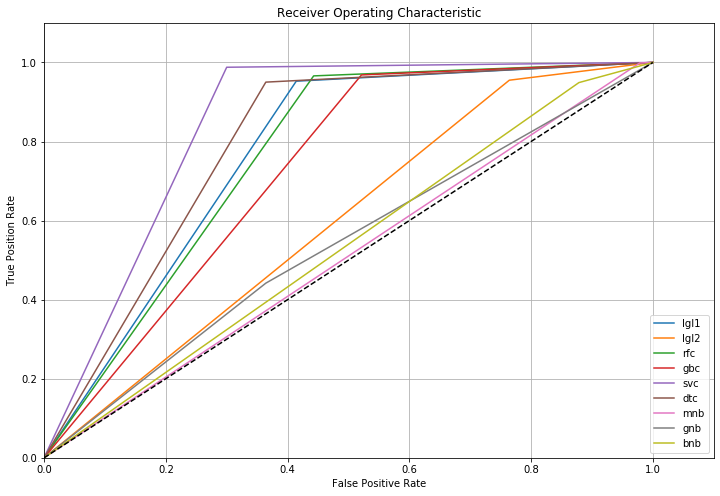

In [123]:
# Calculate ROC curve from y_test and pred
plt.subplots(figsize=(12, 8))
plt.title('Receiver Operating Characteristic')
for key, val in pred.items():
    fpr, tpr, thresholds = roc_curve(y_test, pred[key])
    plt.plot(fpr,tpr, label=key)
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1], 'k--')

# Axes limits and labels
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Position Rate')
plt.xlabel('False Positive Rate')
plt.grid()

### 12.6 Calculate AUROC

In [125]:
for name, model in fitted_models.items():
    fpr, tpr, thresholds = roc_curve(y_test, pred[name])
    print('auc curve of ', name,' is ', auc(fpr, tpr)*100)

auc curve of  lgl1  is  76.91920943134535
auc curve of  lgl2  is  59.54056865464632
auc curve of  rfc  is  76.15811373092927
auc curve of  gbc  is  72.35090152565881
auc curve of  svc  is  84.39320388349515
auc curve of  dtc  is  79.29785020804438
auc curve of  mnb  is  51.010748959778084
auc curve of  gnb  is  53.87309292649098
auc curve of  bnb  is  53.52288488210819


Among 9 algorithms, SVC is given more AUROC score 84.39%

In [126]:
fitted_models['svc'].best_estimator_

SVC(C=3.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.02, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### 13. PROJECT DELIVERY

In [127]:
import pickle

#### 13.1 Save the Model

In [128]:
with open('spam_model1.pkl', 'wb') as f:
    pickle.dump(fitted_models['svc'].best_estimator_, f)

#### 13.2 Open the Saved Model

In [129]:
# Load final_model.pkl as model
with open('spam_model.pkl', 'rb') as f:
    model = pickle.load(f)

C:\Users\PREM KUMAR\Anaconda3\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator SVC from version 0.20.1 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


## END